In [1]:
import numpy as np 
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('Full Dataset (league standings with players stats).csv')
lgStand = pd.read_csv('League Standings.csv')

In [3]:
lgStand.rename(columns = {'Team':'teamname','Season':'season'}, inplace = True)
lgStand

Unnamed: 0 season  Standings               teamname  Played  Wins  Draw  \
0             0  10/11          1       ManchesterUnited      38    23    11   
1             1  10/11          2                Chelsea      38    21     8   
2             2  10/11          3         ManchesterCity      38    21     8   
3             3  10/11          4                Arsenal      38    19    11   
4             4  10/11          5       TottenhamHotspur      38    16    14   
..          ...    ...        ...                    ...     ...   ...   ...   
215         215  20/21         16  BrightonandHoveAlbion      38     9    14   
216         216  20/21         17                Burnley      38    10     9   
217         217  20/21         18                 Fulham      38     5    13   
218         218  20/21         19     WestBromwichAlbion      38     5    11   
219         219  20/21         20        SheffieldUnited      38     7     2   

     Lost  GoalsFor  GoalsAgainst  GoalDifference  Points  
0       4        78            37              41      80  
1       9        69            33              36      71  
2       9        60            33              27      71  
3       8        72            43              29      68  
4       8        55            46               9      62  
..    ...       ...           ...             ...     ...  
215    15        40            46              -6      41  
216    19        33            55             -22      39  
217    20        27            53             -26      28  
218    22        35            76             -41      26  
219    29        20            63             -43      23  

[220 rows x 12 columns]

In [4]:
df = df.drop(df.filter(like = 'Unn'), axis = 1)

In [5]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [6]:
#Keep only data for players who have played in the season
df = df[df['minutes']!=0]
df

id        firstname            lastname   age          nationality  \
1      19153           Gareth               Barry  39.0              England   
2      19203           Ashley                Cole  41.0              England   
4      50978           Justin               Hoyte  36.0  Trinidad and Tobago   
5      77110           Thomas  Løvendahl Sørensen  45.0              Denmark   
6      83026            Peter         Whittingham  34.0              England   
...      ...              ...                 ...   ...                  ...   
10761  50828             Zack             Steffen  27.0                  USA   
10764     17        Christian             Pulisic  24.0                  USA   
10766   2294          Willian     Borges da Silva  34.0               Brazil   
10767  18897  DeAndre Roselle              Yedlin  29.0                  USA   
10768  19549          Antonee            Robinson  25.0                  USA   

       height weight  injured  teamID         teamname  appearences  lineups  \
1      183 cm  78 kg    False      66       AstonVilla          1.0      1.0   
2      176 cm  66 kg    False      42          Arsenal          2.0      2.0   
4      180 cm  68 kg    False      42          Arsenal          1.0      0.0   
5      196 cm  89 kg    False     746       Sunderland          1.0      1.0   
6      178 cm  63 kg    False      66       AstonVilla          2.0      1.0   
...       ...    ...      ...     ...              ...          ...      ...   
10761  191 cm  86 kg    False      50   ManchesterCity          1.0      1.0   
10764  172 cm  69 kg    False      49          Chelsea         27.0     18.0   
10766  175 cm  77 kg    False      42          Arsenal         25.0     16.0   
10767  172 cm  75 kg    False      34  NewcastleUnited          6.0      5.0   
10768  176 cm  70 kg    False      36           Fulham         28.0     24.0   

       minutes    position    rating  captain  subIn  subOut  bench  \
1         90.0  Midfielder       NaN    False    0.0     0.0    0.0   
2        180.0    Defender       NaN    False    0.0     0.0    0.0   
4          1.0    Defender       NaN    False    1.0     0.0    1.0   
5         90.0  Goalkeeper       NaN    False    0.0     0.0    1.0   
6        123.0  Midfielder       NaN    False    1.0     0.0    1.0   
...        ...         ...       ...      ...    ...     ...    ...   
10761     90.0  Goalkeeper  6.300000    False    0.0     0.0   34.0   
10764   1735.0  Midfielder  6.842307    False    9.0     6.0   11.0   
10766   1406.0    Attacker  7.004000    False    9.0    10.0   17.0   
10767    437.0    Defender  6.516666    False    1.0     2.0    4.0   
10768   2161.0    Defender  6.882142    False    4.0     2.0    7.0   

       totalShots  shotsOn  totalGoals  goalsConceded  goalAssists  goalSaves  \
1             NaN      NaN         0.0            NaN          NaN        NaN   
2             NaN      NaN         0.0            NaN          NaN        NaN   
4             NaN      NaN         0.0            NaN          NaN        NaN   
5             NaN      NaN         0.0            NaN          NaN        NaN   
6             NaN      NaN         0.0            NaN          NaN        NaN   
...           ...      ...         ...            ...          ...        ...   
10761         NaN      NaN         0.0            1.0          NaN        1.0   
10764        32.0     16.0         4.0            0.0          2.0        NaN   
10766        13.0      3.0         1.0            0.0          5.0        NaN   
10767         1.0      NaN         0.0            0.0          NaN        NaN   
10768         6.0      4.0         0.0            0.0          NaN        NaN   

       totalPasses  keyPasses  passAccuracy  totalTackles  blocks  \
1              NaN        NaN           NaN           NaN     NaN   
2              NaN        NaN           NaN           NaN     NaN   
4              NaN        NaN           NaN           N

In [7]:
sumOfMetrics = df.groupby(df['season']).sum().reset_index()
avOfPassAcc = df.groupby(df['season']).mean().reset_index()

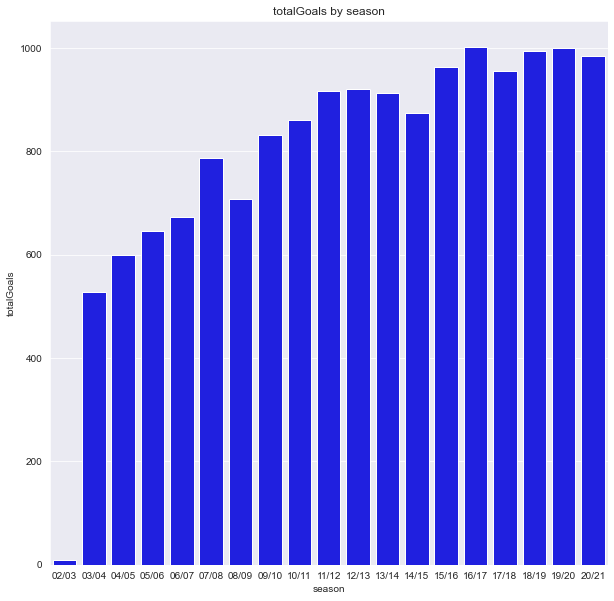

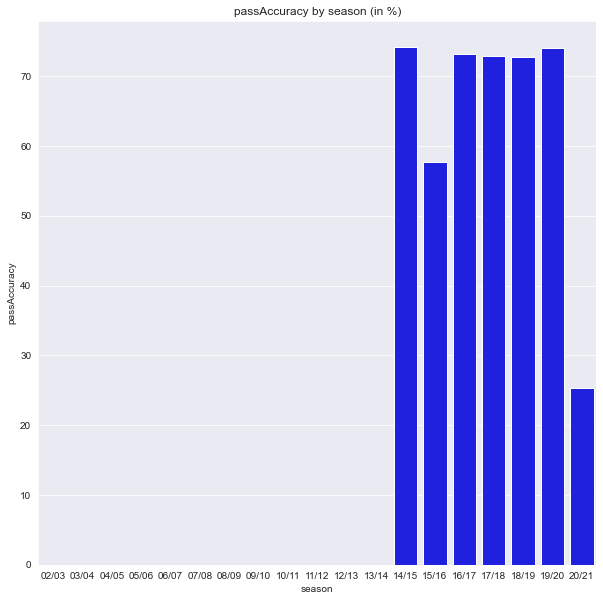

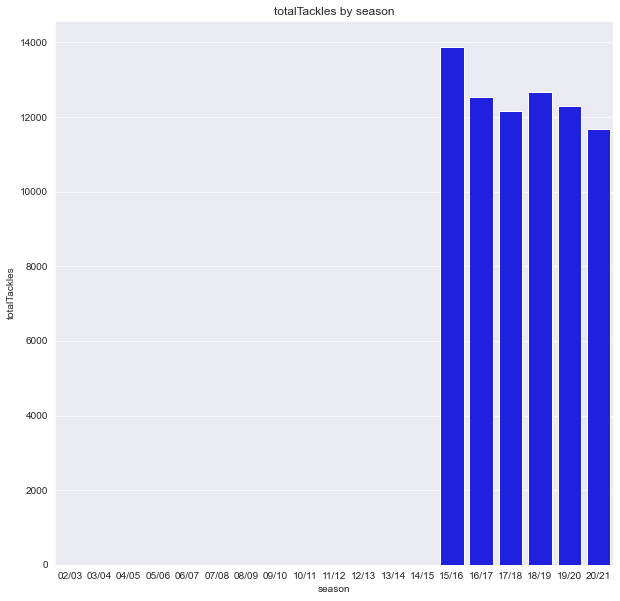

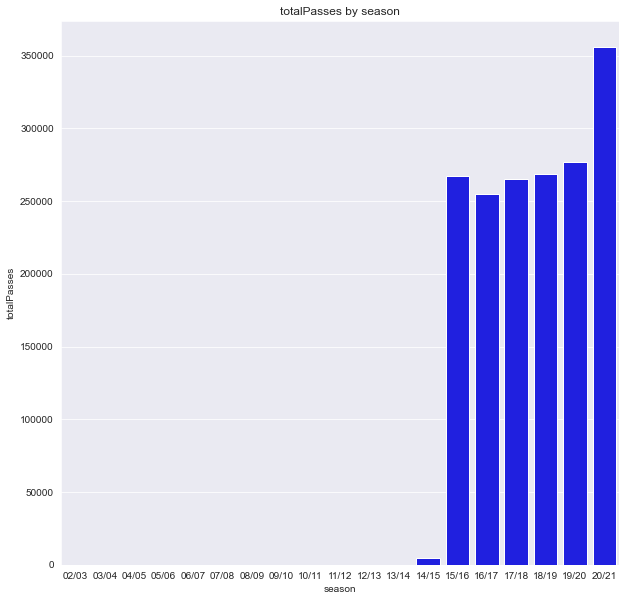

In [8]:
#General statistics throughout seasons
cols = ['totalGoals','passAccuracy','totalTackles','totalPasses']
sns.set_style('darkgrid')
sns.set_palette('Set2')
#ns.set_context("paper", rc={"axes.labelsize":25})
for col in cols: 
    if col == 'passAccuracy': 
        fig, ax = plt.subplots(figsize=(10, 10))    
        sns.barplot(data=avOfPassAcc, \
                    x=avOfPassAcc['season'],\
                    y=avOfPassAcc[col],\
                    color = 'blue',\
                    ax = ax).set_title(str(col) + ' by season (in %)')
    else: 
        fig, ax = plt.subplots(figsize=(10, 10))    
        sns.barplot(data=sumOfMetrics, \
                    x=sumOfMetrics['season'],\
                    y=sumOfMetrics[col],\
                    color = 'blue',\
                    ax = ax).set_title(str(col) + ' by season')

In [9]:
#Plot relationship between league position and number of goals
#Have to group by season and team
totalGoalSznTeam = df.groupby(['teamname','season']).sum().reset_index()
totalGoalSznTeam = totalGoalSznTeam.filter(['teamname', 'season'])

In [10]:
merged = totalGoalSznTeam.merge(lgStand, how = 'left', on = ['season','teamname'])
merged

teamname season  Unnamed: 0  Standings  Played  Wins  Draw  \
0                   Arsenal  02/03         NaN        NaN     NaN   NaN   NaN   
1                   Arsenal  03/04         NaN        NaN     NaN   NaN   NaN   
2                   Arsenal  04/05         NaN        NaN     NaN   NaN   NaN   
3                   Arsenal  05/06         NaN        NaN     NaN   NaN   NaN   
4                   Arsenal  06/07         NaN        NaN     NaN   NaN   NaN   
..                      ...    ...         ...        ...     ...   ...   ...   
376  WolverhamptonWanderers  10/11        16.0       17.0    38.0  11.0   7.0   
377  WolverhamptonWanderers  11/12        39.0       20.0    38.0   5.0  10.0   
378  WolverhamptonWanderers  18/19       166.0        7.0    38.0  16.0   9.0   
379  WolverhamptonWanderers  19/20       186.0        7.0    38.0  15.0  14.0   
380  WolverhamptonWanderers  20/21       212.0       13.0    38.0  12.0   9.0   

     Lost  GoalsFor  GoalsAgainst  GoalDifference  Points  
0     NaN       NaN           NaN             NaN     NaN  
1     NaN       NaN           NaN             NaN     NaN  
2     NaN       NaN           NaN             NaN     NaN  
3     NaN       NaN           NaN             NaN     NaN  
4     NaN       NaN           NaN             NaN     NaN  
..    ...       ...           ...             ...     ...  
376  20.0      46.0          66.0           -20.0    40.0  
377  23.0      40.0          82.0           -42.0    25.0  
378  13.0      47.0          46.0             1.0    57.0  
379   9.0      51.0          40.0            11.0    59.0  
380  17.0      36.0          52.0           -16.0    45.0  

[381 rows x 12 columns]

In [11]:
to_merge = df.groupby(['season','teamname']).sum().reset_index()

In [12]:
forLinearReg = merged.merge(to_merge,how = 'left', on = ['season','teamname'])

In [13]:
forLinearReg = forLinearReg.drop(forLinearReg.filter(like = 'Unn'), axis = 1)

In [14]:
forLinearReg.dropna(inplace=True)

In [15]:
#Remove the data that is 0. We don't need data from 13/14 until the most recent data.
forLinearReg['to_remove'] = forLinearReg['season'].str[:2]
forLinearReg['to_remove'] = forLinearReg['to_remove'].astype(int)
forLinearRegMod = forLinearReg[forLinearReg['to_remove'] > 14]

In [16]:
to_generate = forLinearRegMod.columns
to_generate = to_generate[24:50]

In [17]:
#let's get some metrics aswell
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packag

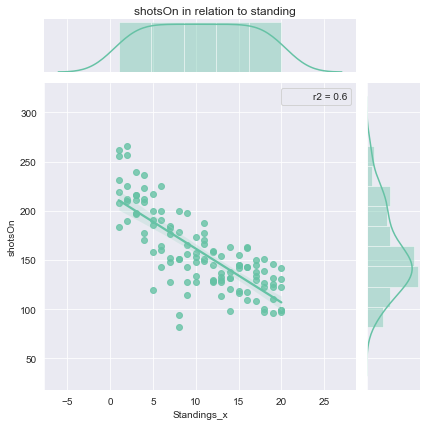

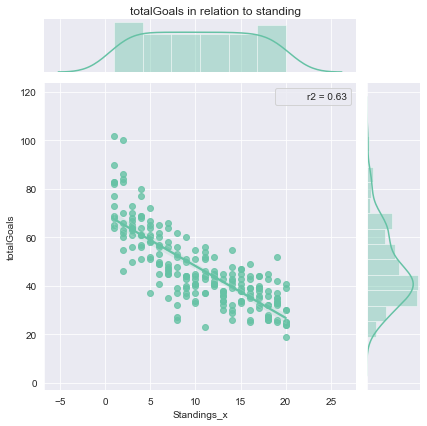

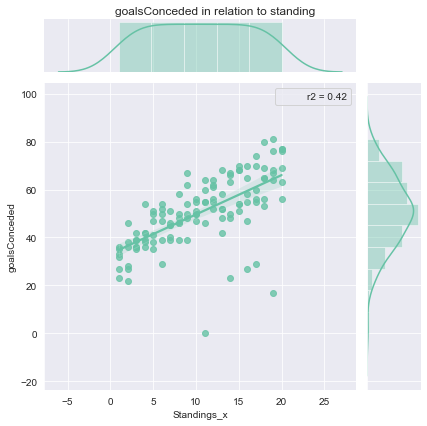

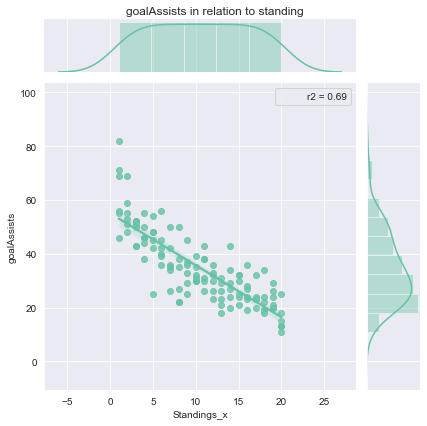

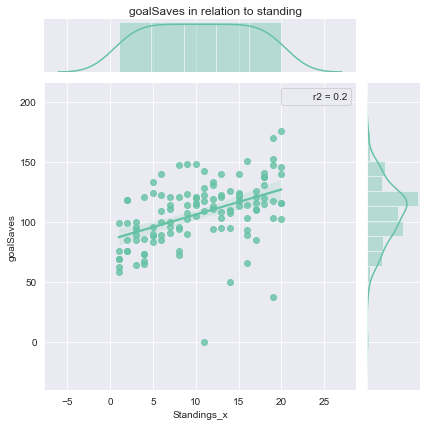

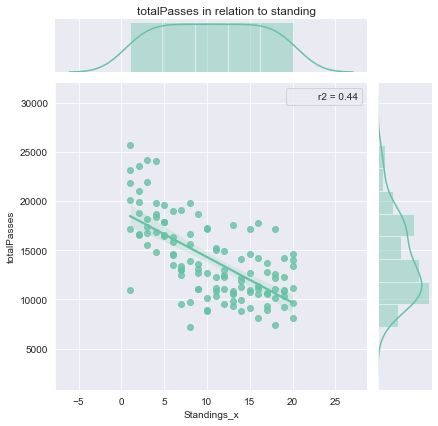

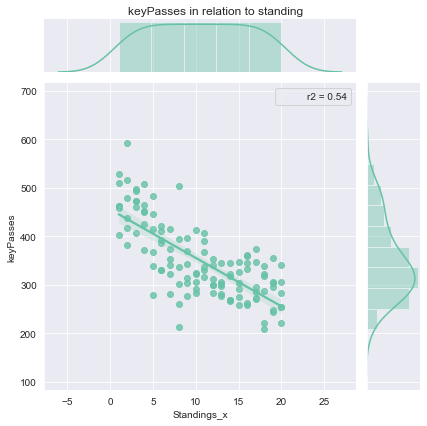

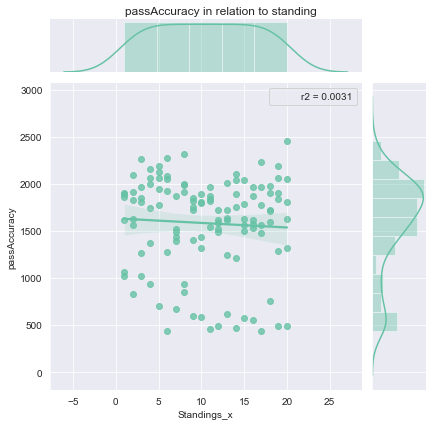

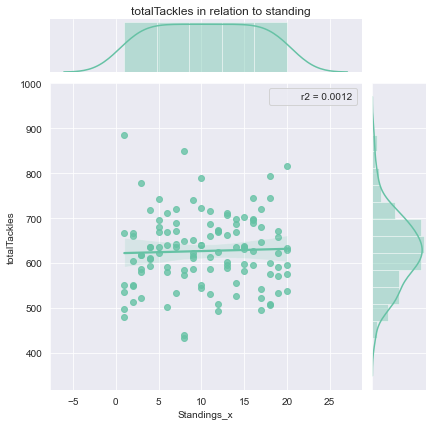

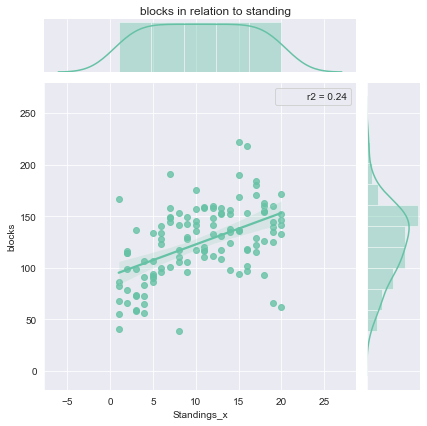

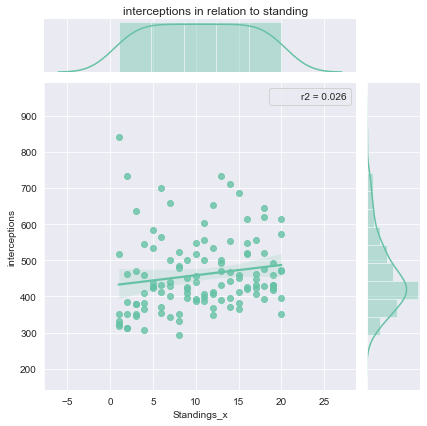

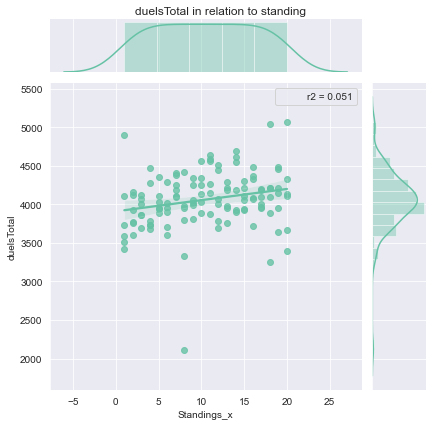

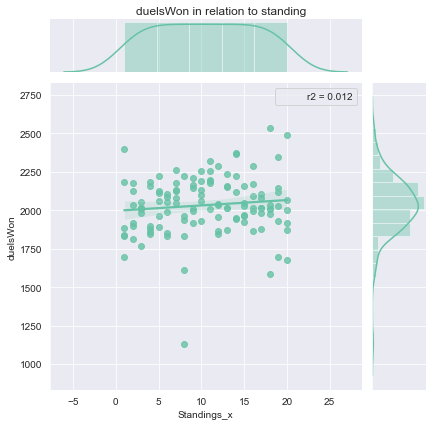

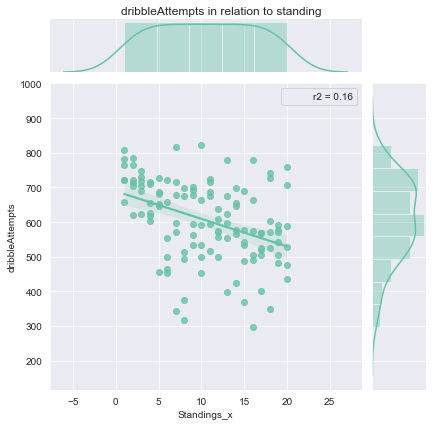

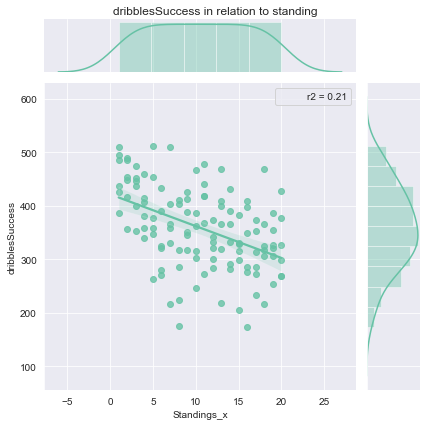

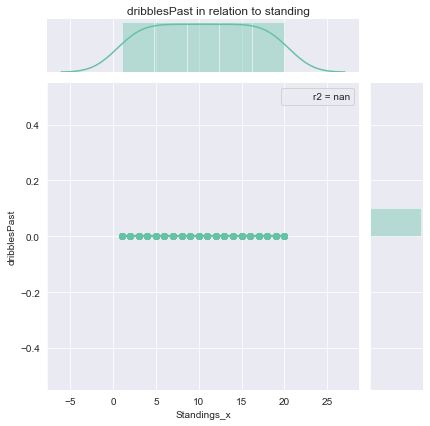

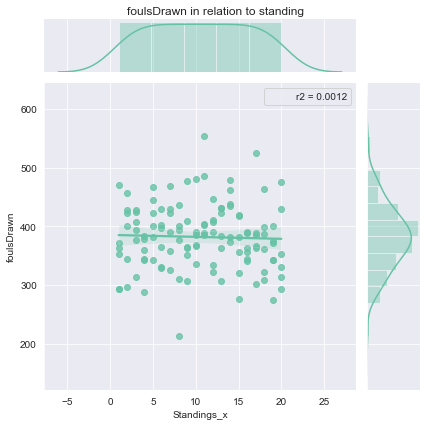

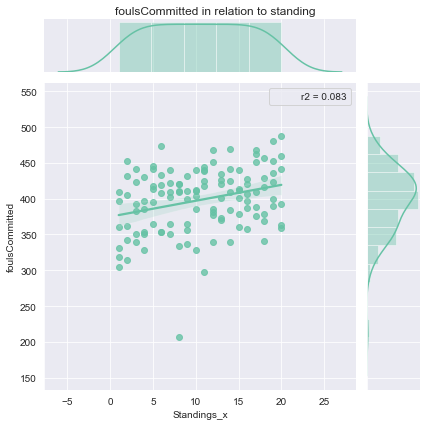

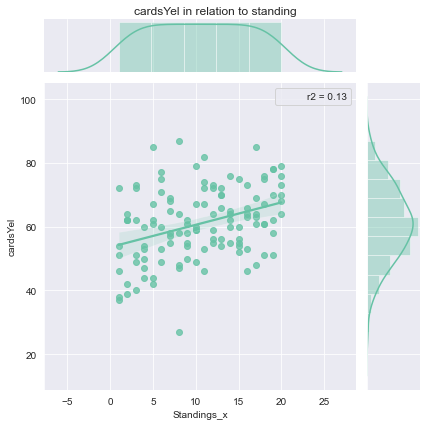

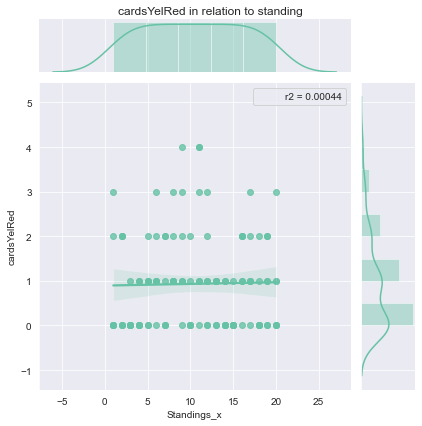

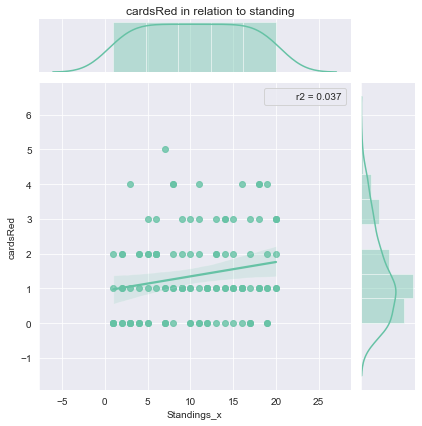

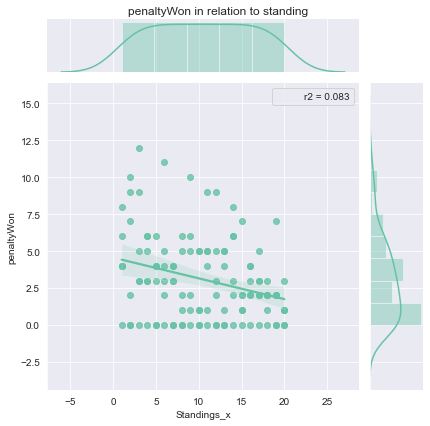

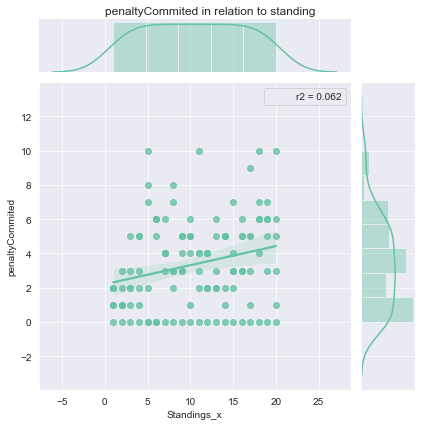

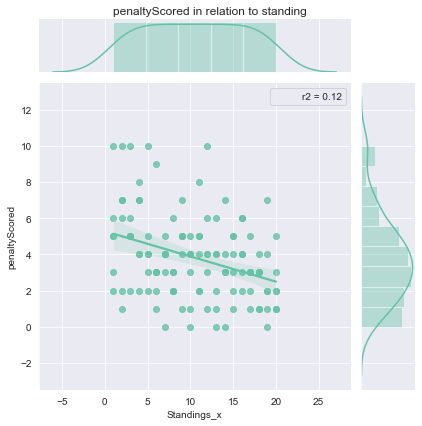

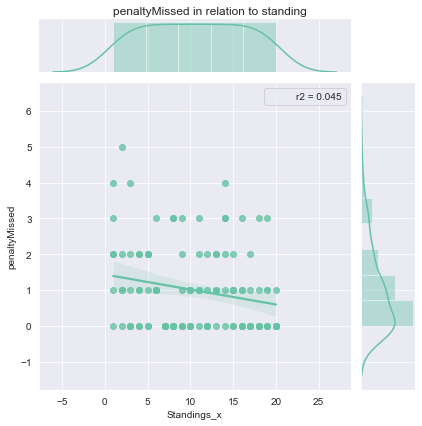

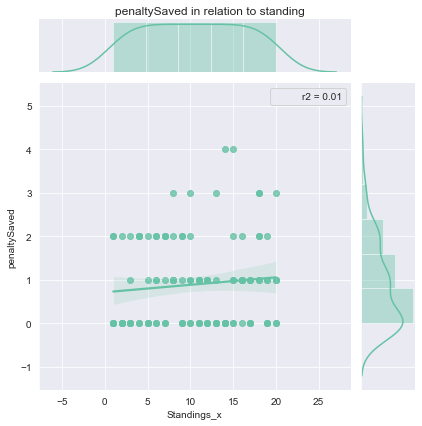

In [18]:
#Plot lin reg 
for col in to_generate:
    if col == 'totalGoals': 
        sns.jointplot(data=forLinearReg, x='Standings_x', y='totalGoals',kind="reg",stat_func=r2)
        plt.suptitle('totalGoals in relation to standing')
        plt.subplots_adjust(top=0.95)
    else: 
        sns.jointplot(data=forLinearRegMod, x='Standings_x', y=col,kind="reg",stat_func=r2)
        plt.suptitle(str(col)+ ' in relation to standing')
        plt.subplots_adjust(top=0.95)

#Intuitively enough, there seems to be a linear relationship with the final position with, the number of goals scored,
#the number of assists, key passes, total passes, shots on target. These attributes have the strongest relationship
#with the position. I expected a better relationship with duelsWon, interceptions, passAccuracy. 

#The r2 scores are not too strong but can still demonstrate some relationship between the variables

In [19]:
df.reset_index(inplace=True)

In [20]:
df['firstname_new'] = df['firstname'].str.split().str[0]

In [21]:
df['fullname_new'] = df['firstname_new'] + ' ' + df['lastname']

In [22]:
#Create a goal contribution column to see the % contributed to team goals
df.fillna(0, inplace=True)
df['Goal contribution'] = (df['totalGoals']+df['goalAssists'])/df['GoalsFor']

In [23]:
df['name'] = df['name'].str.replace(r'\([^)]*\)','', regex=True)
df = df.replace(r'[,\"\']','', regex=True).replace(r'\s*([^\s]+)\s*', r'\1', regex=True)

In [24]:
df

index     id       firstname           lastname   age  \
0         1  19153          Gareth              Barry  39.0   
1         2  19203          Ashley               Cole  41.0   
2         4  50978          Justin              Hoyte  36.0   
3         5  77110          Thomas  LøvendahlSørensen  45.0   
4         6  83026           Peter        Whittingham  34.0   
...     ...    ...             ...                ...   ...   
8286  10761  50828            Zack            Steffen  27.0   
8287  10764     17       Christian            Pulisic  24.0   
8288  10766   2294         Willian      BorgesdaSilva  34.0   
8289  10767  18897  DeAndreRoselle             Yedlin  29.0   
8290  10768  19549         Antonee           Robinson  25.0   

            nationality height weight  injured  teamID         teamname  \
0               England  183cm   78kg    False      66       AstonVilla   
1               England  176cm   66kg    False      42          Arsenal   
2     TrinidadandTobago  180cm   68kg    False      42          Arsenal   
3               Denmark  196cm   89kg    False     746       Sunderland   
4               England  178cm   63kg    False      66       AstonVilla   
...                 ...    ...    ...      ...     ...              ...   
8286                USA  191cm   86kg    False      50   ManchesterCity   
8287                USA  172cm   69kg    False      49          Chelsea   
8288             Brazil  175cm   77kg    False      42          Arsenal   
8289                USA  172cm   75kg    False      34  NewcastleUnited   
8290                USA  176cm   70kg    False      36           Fulham   

      appearences  lineups  minutes    position    rating  captain  subIn  \
0             1.0      1.0     90.0  Midfielder  0.000000    False    0.0   
1             2.0      2.0    180.0    Defender  0.000000    False    0.0   
2             1.0      0.0      1.0    Defender  0.000000    False    1.0   
3             1.0      1.0     90.0  Goalkeeper  0.000000    False    0.0   
4             2.0      1.0    123.0  Midfielder  0.000000    False    1.0   
...           ...      ...      ...         ...       ...      ...    ...   
8286          1.0      1.0     90.0  Goalkeeper  6.300000    False    0.0   
8287         27.0     18.0   1735.0  Midfielder  6.842307    False    9.0   
8288         25.0     16.0   1406.0    Attacker  7.004000    False    9.0   
8289          6.0      5.0    437.0    Defender  6.516666    False    1.0   
8290         28.0     24.0   2161.0    Defender  6.882142    False    4.0   

      subOut  bench  totalShots  shotsOn  totalGoals  goalsConceded  \
0        0.0    0.0         0.0      0.0         0.0            0.0   
1        0.0    0.0         0.0      0.0         0.0            0.0   
2        0.0    1.0         0.0      0.0         0.0            0.0   
3        0.0    1.0         0.0      0.0         0.0            0.0   
4        0.0    1.0         0.0      0.0         0.0            0.0   
...      ...    ...         ...      ...         ...            ...   
8286     0.0   34.0         0.0      0.0         0.0            1.0   
8287     6.0   11.0        32.0     16.0         4.0            0.0   
8288    10.0   17.0        13.0      3.0         1.0            0.0   
8289     2.0    4.0         1.0      0.0         0.0            0.0   
8290     2.0    7.0         6.0      4.0         0.0            0.0   

      goalAssists  goalSaves  totalPasses  keyPasses  passAccuracy  \
0             0.0        0.0          0.0        0.0           0.0   
1             0.0        0.0          0.0        0.0           0.0   
2             0.0        0.0          0.0        0.0           0.0   
3             0.0        0.0          0.0        0.0           0.0   
4             0.0        0.0          0.0        0.0           0.0   
...           ...        ...          ...        ...           ...   
8286          0.0        1.0         26.0        0.0          21.0   
8287      

In [25]:
df['PFA discrim'] = [x[0] in x[1] for x in zip(df['name'], df['fullname_new'])]

In [26]:
df

index     id       firstname           lastname   age  \
0         1  19153          Gareth              Barry  39.0   
1         2  19203          Ashley               Cole  41.0   
2         4  50978          Justin              Hoyte  36.0   
3         5  77110          Thomas  LøvendahlSørensen  45.0   
4         6  83026           Peter        Whittingham  34.0   
...     ...    ...             ...                ...   ...   
8286  10761  50828            Zack            Steffen  27.0   
8287  10764     17       Christian            Pulisic  24.0   
8288  10766   2294         Willian      BorgesdaSilva  34.0   
8289  10767  18897  DeAndreRoselle             Yedlin  29.0   
8290  10768  19549         Antonee           Robinson  25.0   

            nationality height weight  injured  teamID         teamname  \
0               England  183cm   78kg    False      66       AstonVilla   
1               England  176cm   66kg    False      42          Arsenal   
2     TrinidadandTobago  180cm   68kg    False      42          Arsenal   
3               Denmark  196cm   89kg    False     746       Sunderland   
4               England  178cm   63kg    False      66       AstonVilla   
...                 ...    ...    ...      ...     ...              ...   
8286                USA  191cm   86kg    False      50   ManchesterCity   
8287                USA  172cm   69kg    False      49          Chelsea   
8288             Brazil  175cm   77kg    False      42          Arsenal   
8289                USA  172cm   75kg    False      34  NewcastleUnited   
8290                USA  176cm   70kg    False      36           Fulham   

      appearences  lineups  minutes    position    rating  captain  subIn  \
0             1.0      1.0     90.0  Midfielder  0.000000    False    0.0   
1             2.0      2.0    180.0    Defender  0.000000    False    0.0   
2             1.0      0.0      1.0    Defender  0.000000    False    1.0   
3             1.0      1.0     90.0  Goalkeeper  0.000000    False    0.0   
4             2.0      1.0    123.0  Midfielder  0.000000    False    1.0   
...           ...      ...      ...         ...       ...      ...    ...   
8286          1.0      1.0     90.0  Goalkeeper  6.300000    False    0.0   
8287         27.0     18.0   1735.0  Midfielder  6.842307    False    9.0   
8288         25.0     16.0   1406.0    Attacker  7.004000    False    9.0   
8289          6.0      5.0    437.0    Defender  6.516666    False    1.0   
8290         28.0     24.0   2161.0    Defender  6.882142    False    4.0   

      subOut  bench  totalShots  shotsOn  totalGoals  goalsConceded  \
0        0.0    0.0         0.0      0.0         0.0            0.0   
1        0.0    0.0         0.0      0.0         0.0            0.0   
2        0.0    1.0         0.0      0.0         0.0            0.0   
3        0.0    1.0         0.0      0.0         0.0            0.0   
4        0.0    1.0         0.0      0.0         0.0            0.0   
...      ...    ...         ...      ...         ...            ...   
8286     0.0   34.0         0.0      0.0         0.0            1.0   
8287     6.0   11.0        32.0     16.0         4.0            0.0   
8288    10.0   17.0        13.0      3.0         1.0            0.0   
8289     2.0    4.0         1.0      0.0         0.0            0.0   
8290     2.0    7.0         6.0      4.0         0.0            0.0   

      goalAssists  goalSaves  totalPasses  keyPasses  passAccuracy  \
0             0.0        0.0          0.0        0.0           0.0   
1             0.0        0.0          0.0        0.0           0.0   
2             0.0        0.0          0.0        0.0           0.0   
3             0.0        0.0          0.0        0.0           0.0   
4             0.0        0.0          0.0        0.0           0.0   
...           ...        ...          ...        ...           ...   
8286          0.0        1.0         26.0        0.0          21.0   
8287      

In [27]:
PFAdf = df[df['PFA discrim'] == True]

In [28]:
PFAdf = PFAdf.drop(['index','id','firstname','lastname','height','weight','injured','teamID','goalsConceded','goalSaves','name','firstname_new','Played'],axis=1)

In [29]:
PFAdf

age  nationality          teamname  appearences  lineups  minutes  \
89    37.0       France           Arsenal         37.0     37.0   3330.0   
348   41.0      England           Chelsea         36.0     36.0   3240.0   
2004  41.0        Wales  ManchesterUnited         28.0     15.0   1499.0   
3105  33.0        Wales  TottenhamHotspur         30.0     29.0   2452.0   
3195  36.0  Netherlands           Arsenal         38.0     37.0   3334.0   
4111  33.0        Wales  TottenhamHotspur         33.0     33.0   2925.0   
4601  35.0      Uruguay         Liverpool         33.0     33.0   2964.0   
5147  31.0      Belgium           Chelsea         38.0     38.0   3379.0   
5592  31.0      Algeria     LeicesterCity         37.0     36.0   3057.0   
6147  31.0       France           Chelsea         35.0     35.0   3139.0   
6533  30.0        Egypt         Liverpool         36.0     34.0   2922.0   
7009  31.0  Netherlands         Liverpool         38.0     38.0   3385.0   
7402  31.0      Belgium    ManchesterCity         35.0     32.0   2800.0   
7909  31.0      Belgium    ManchesterCity         25.0     23.0   2001.0   

        position    rating  captain  subIn  subOut  bench  totalShots  \
89      Attacker  0.000000    False    0.0     0.0    0.0         0.0   
348     Defender  0.000000    False    0.0     0.0    0.0         0.0   
2004  Midfielder  0.000000    False   13.0     3.0   17.0         0.0   
3105    Attacker  0.000000    False    1.0     4.0    1.0         0.0   
3195    Attacker  0.000000    False    1.0     3.0    1.0         0.0   
4111    Attacker  0.000000    False    0.0     4.0    0.0         0.0   
4601    Attacker  0.000000    False    0.0     3.0    0.0         0.0   
5147    Attacker  6.700000    False    0.0    12.0    0.0         0.0   
5592    Attacker  7.351351    False    1.0    24.0    2.0        76.0   
6147  Midfielder  7.220000    False    0.0     1.0    1.0        27.0   
6533    Attacker  7.588888    False    2.0    17.0    2.0       144.0   
7009    Defender  7.439473    False    0.0     1.0    0.0        31.0   
7402  Midfielder  7.985714    False    3.0    12.0    4.0        99.0   
7909  Midfielder  7.784000    False    2.0     6.0    6.0        53.0   

      shotsOn  totalGoals  goalAssists  totalPasses  keyPasses  passAccuracy  \
89        0.0        30.0          0.0          0.0        0.0           0.0   
348       0.0         3.0          0.0          0.0        0.0           0.0   
2004      0.0         2.0          0.0          0.0        0.0           0.0   
3105      0.0         7.0          0.0          0.0        0.0           0.0   
3195      0.0        30.0          0.0          0.0        0.0           0.0   
4111      0.0        21.0          0.0          0.0        0.0           0.0   
4601      0.0        31.0          0.0          0.0        0.0           0.0   
5147      0.0        14.0          1.0         32.0        1.0          84.0   
5592     39.0        17.0         11.0        843.0       69.0          54.0   
6147      7.0         1.0          1.0       1884.0       23.0          87.0   
6533     67.0        32.0         10.0        726.0       63.0          76.0   
7009      8.0         4.0          2.0       2724.0        7.0          88.0   
7402     31.0        13.0         20.0       1554.0      137.0          81.0   
7909     27.0         6.0         12.0       1263.0       81.0          41.0   

      totalTackles  blocks  interceptions  duelsTotal  duelsWon  \
89             0.0     0.0            0.0         0.0       0.0   
348            0.0     0.0            0.0         0.0       0.0   
2004           0.0     0.0            0.0         0.0       0.0   
3105           0.0     0.0            0.0         0.0       0.0   
3195           0.0     0.0            0.0         0.0       0.0   
4111           0.0     0.0            0.0         0.0       0.0   
4601           0.0     0.0            0.0         0.0       0.0   
5147           0.0     0.0       

In [30]:
#Analysis idea: based on position, see how the player ranks compared to other players in the same position

In [31]:
#Creating bell curves of given attributes to see how the players compares to other players

In [32]:
PFAdf.index

Int64Index([89, 348, 2004, 3105, 3195, 4111, 4601, 5147, 5592, 6147, 6533,
            7009, 7402, 7909],
           dtype='int64')

2.3033409721384634
6.349489511864663


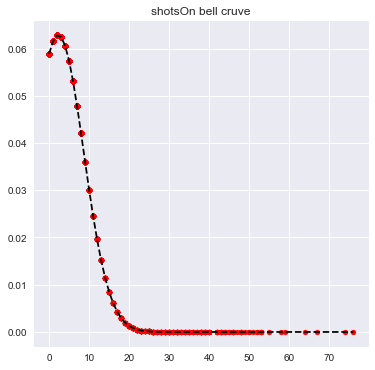

1.8295742371245929
3.3424746915917702


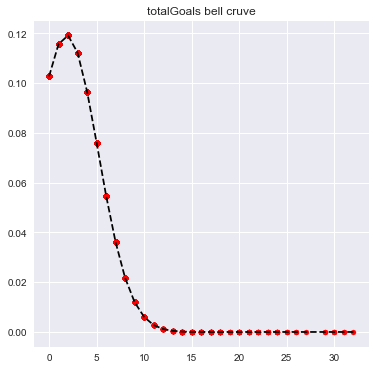

0.7317573272222893
5.427846340514993


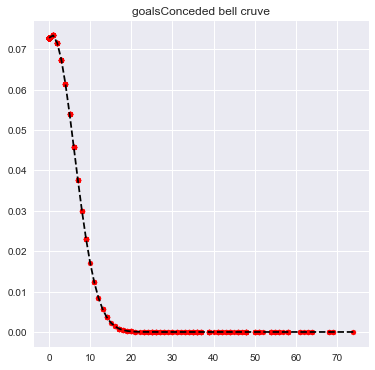

0.5044023640091666
1.4896656553638796


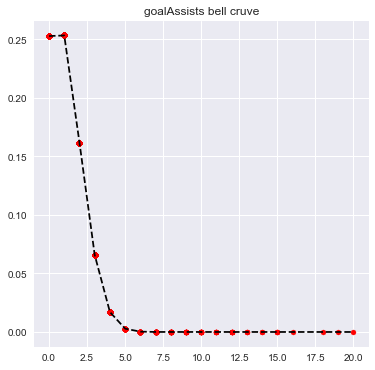

1.5554215414304668
11.730722573861268


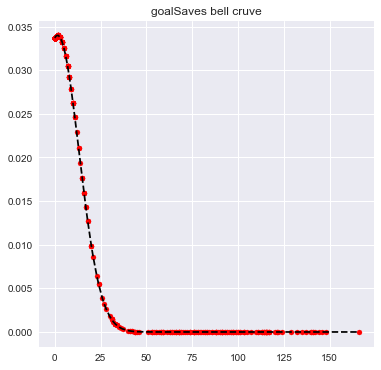

204.18875889518756
410.2489410770557


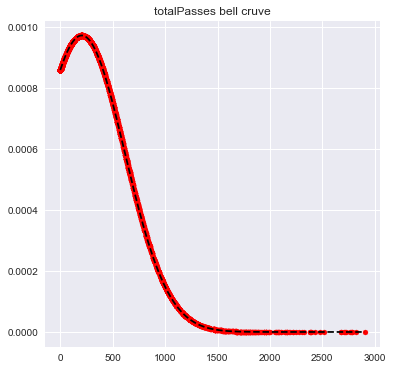

5.088047280183331
12.462742572023735


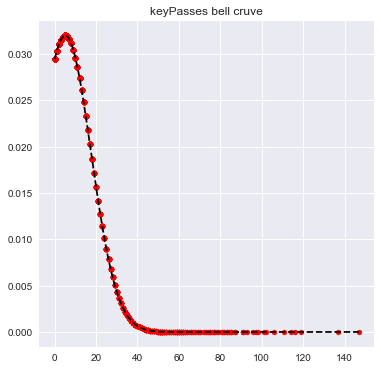

24.06597515378121
33.76718467709219


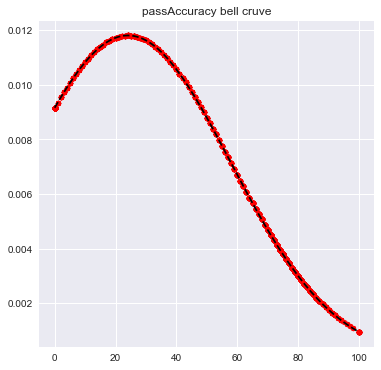

9.072005789410204
19.16051455784282


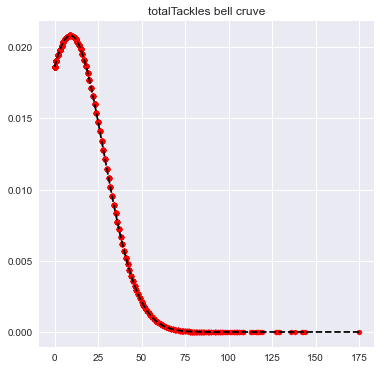

1.7965263538776988
5.142871802543399


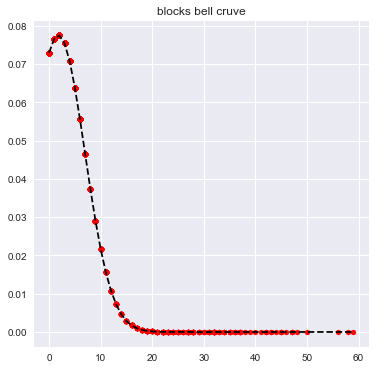

6.679893860812929
15.161767671592386


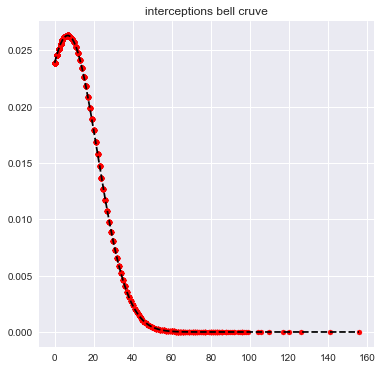

58.97623929562176
113.11070630249122


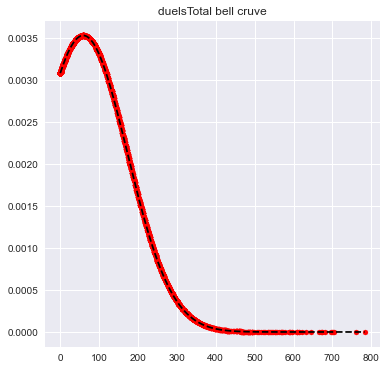

29.507658907248825
56.934299372345855


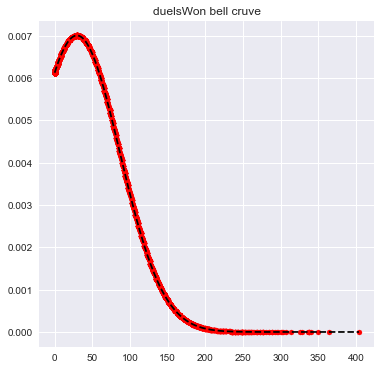

8.786997949583887
22.42544258244572


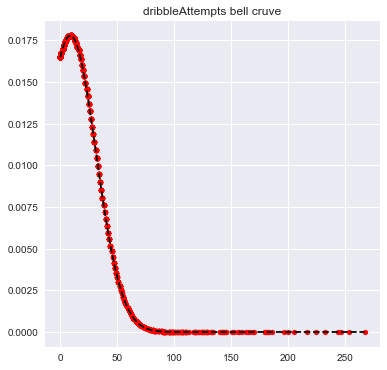

5.210831021589676
13.362961696835471


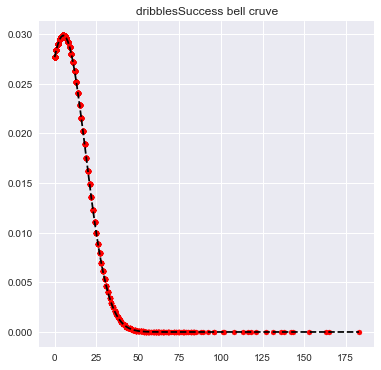

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


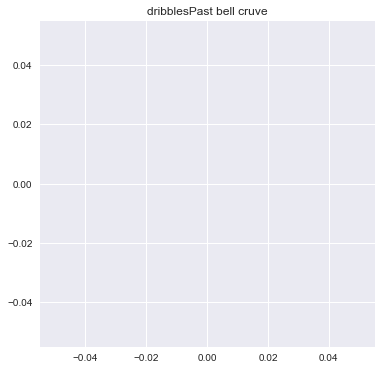

5.5420335303340975
12.164415110157286


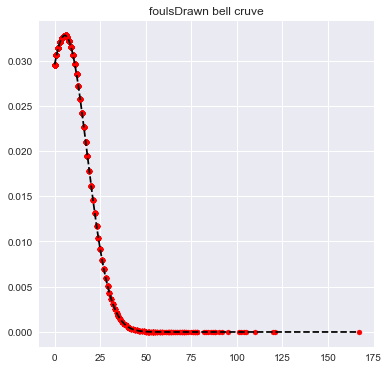

5.781087926667471
11.475289402281222


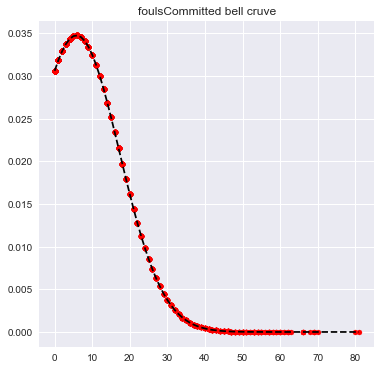

2.232300084428899
2.4590382059843976


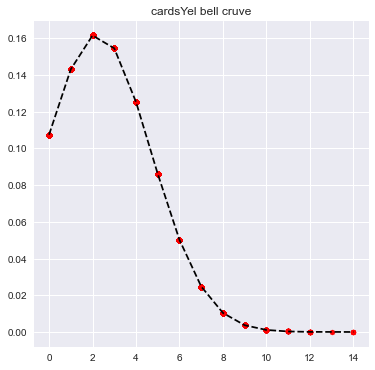

0.03811361717525027
0.19888608413608674


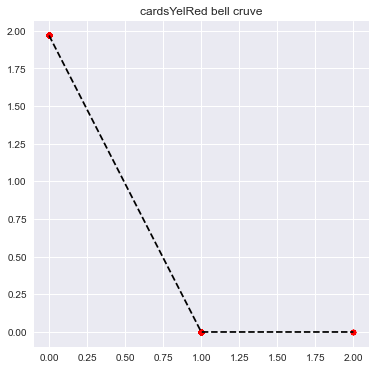

0.05765287661319503
0.244698196172538


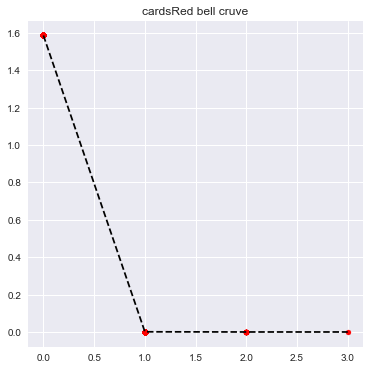

0.044867929079725005
0.282422180554703


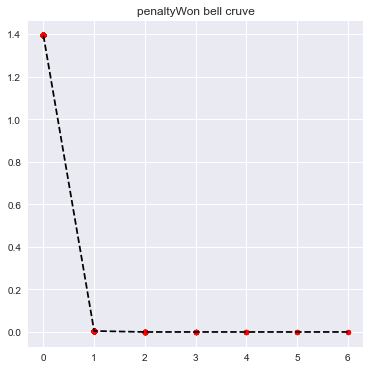

0.04872753588228199
0.2529083216618011


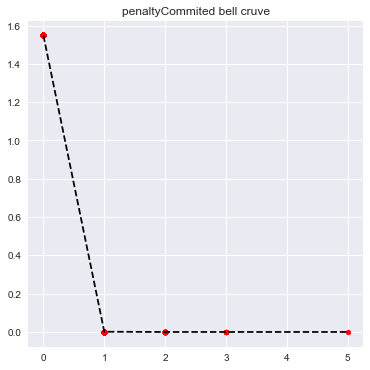

0.05548184778675672
0.42654620577815794


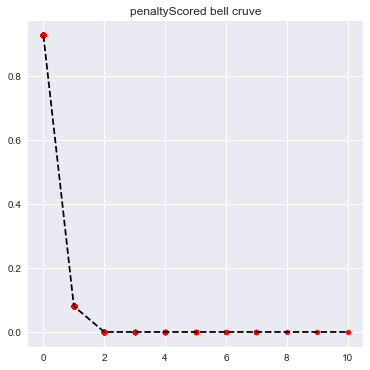

0.014352912797008805
0.13508419196548138


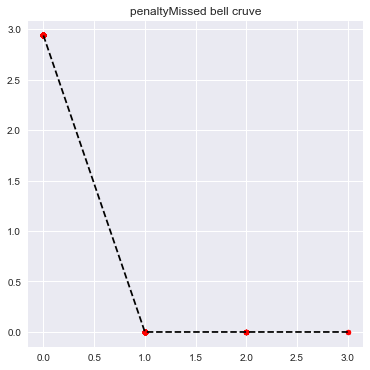

0.012905560246049934
0.14047969280440514


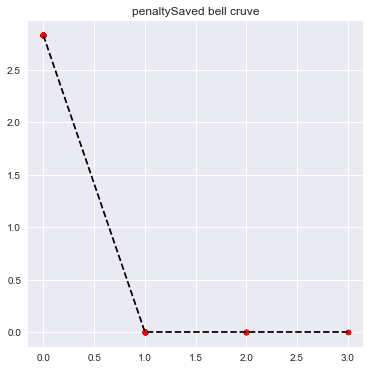

In [33]:
# A custom function to calculate
# probability distribution function
def pdf(x):
    mean = np.mean(x)
    print(mean)
    std = np.std(x)
    print(std)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

for col in to_generate:
    # To generate an array of x-values
    x = df[col].sort_values(ascending = True)

    # To generate an array of
    # y-values using corresponding x-values
    y = pdf(df[col].sort_values(ascending = True))

    # Plotting the bell-shaped curve
    plt.style.use('seaborn')
    plt.figure(figsize = (6, 6))
    plt.plot(x, y, color = 'black',\
            linestyle = 'dashed')
    plt.scatter( x, y, marker = 'o', s = 25, color='red')
    #, ls="", marker="o", label="points")
    plt.title(str(col)+ ' bell cruve')
    plt.show()


In [34]:
df

index     id       firstname           lastname   age  \
0         1  19153          Gareth              Barry  39.0   
1         2  19203          Ashley               Cole  41.0   
2         4  50978          Justin              Hoyte  36.0   
3         5  77110          Thomas  LøvendahlSørensen  45.0   
4         6  83026           Peter        Whittingham  34.0   
...     ...    ...             ...                ...   ...   
8286  10761  50828            Zack            Steffen  27.0   
8287  10764     17       Christian            Pulisic  24.0   
8288  10766   2294         Willian      BorgesdaSilva  34.0   
8289  10767  18897  DeAndreRoselle             Yedlin  29.0   
8290  10768  19549         Antonee           Robinson  25.0   

            nationality height weight  injured  teamID         teamname  \
0               England  183cm   78kg    False      66       AstonVilla   
1               England  176cm   66kg    False      42          Arsenal   
2     TrinidadandTobago  180cm   68kg    False      42          Arsenal   
3               Denmark  196cm   89kg    False     746       Sunderland   
4               England  178cm   63kg    False      66       AstonVilla   
...                 ...    ...    ...      ...     ...              ...   
8286                USA  191cm   86kg    False      50   ManchesterCity   
8287                USA  172cm   69kg    False      49          Chelsea   
8288             Brazil  175cm   77kg    False      42          Arsenal   
8289                USA  172cm   75kg    False      34  NewcastleUnited   
8290                USA  176cm   70kg    False      36           Fulham   

      appearences  lineups  minutes    position    rating  captain  subIn  \
0             1.0      1.0     90.0  Midfielder  0.000000    False    0.0   
1             2.0      2.0    180.0    Defender  0.000000    False    0.0   
2             1.0      0.0      1.0    Defender  0.000000    False    1.0   
3             1.0      1.0     90.0  Goalkeeper  0.000000    False    0.0   
4             2.0      1.0    123.0  Midfielder  0.000000    False    1.0   
...           ...      ...      ...         ...       ...      ...    ...   
8286          1.0      1.0     90.0  Goalkeeper  6.300000    False    0.0   
8287         27.0     18.0   1735.0  Midfielder  6.842307    False    9.0   
8288         25.0     16.0   1406.0    Attacker  7.004000    False    9.0   
8289          6.0      5.0    437.0    Defender  6.516666    False    1.0   
8290         28.0     24.0   2161.0    Defender  6.882142    False    4.0   

      subOut  bench  totalShots  shotsOn  totalGoals  goalsConceded  \
0        0.0    0.0         0.0      0.0         0.0            0.0   
1        0.0    0.0         0.0      0.0         0.0            0.0   
2        0.0    1.0         0.0      0.0         0.0            0.0   
3        0.0    1.0         0.0      0.0         0.0            0.0   
4        0.0    1.0         0.0      0.0         0.0            0.0   
...      ...    ...         ...      ...         ...            ...   
8286     0.0   34.0         0.0      0.0         0.0            1.0   
8287     6.0   11.0        32.0     16.0         4.0            0.0   
8288    10.0   17.0        13.0      3.0         1.0            0.0   
8289     2.0    4.0         1.0      0.0         0.0            0.0   
8290     2.0    7.0         6.0      4.0         0.0            0.0   

      goalAssists  goalSaves  totalPasses  keyPasses  passAccuracy  \
0             0.0        0.0          0.0        0.0           0.0   
1             0.0        0.0          0.0        0.0           0.0   
2             0.0        0.0          0.0        0.0           0.0   
3             0.0        0.0          0.0        0.0           0.0   
4             0.0        0.0          0.0        0.0           0.0   
...           ...        ...          ...        ...           ...   
8286          0.0        1.0         26.0        0.0          21.0   
8287      

In [35]:
#The bell curve is not very standerdized. To compare how our players of the year did in comparison to the group,
#we should create the same visuals but for a specific position.

In [59]:
dfAttacker = df[df['position']=='Attacker']
dfMidfielder = df[df['position']=='Midfielder']
dfDefender = df[df['position']=='Defender']

In [61]:
dfDefender[dfDefender['season']=='03/04']

index      id      firstname      lastname   age  nationality height  \
85     103   19203         Ashley          Cole  41.0      England  176cm   
88     107  114808        William        Gallas  37.0       France  183cm   
90     109  114896          Danny  Higginbotham  43.0    Gibraltar  185cm   
91     110  115062         Mikaël     Silvestre  38.0       France  180cm   
95     114  115958        Stephen       Crainey  40.0     Scotland  175cm   
..     ...     ...            ...           ...   ...          ...    ...   
298    353  117522          David          Weir  43.0     Scotland  191cm   
307    366   49840    GaëlDimitri        Clichy  37.0       France  176cm   
314    374  113823   CarlosManuel     Bocanegra  35.0          USA  183cm   
318    378  118126          Mario      Melchiot  37.0  Netherlands  187cm   
323    383   17681  NicholasBrett          Hunt  39.0      England  185cm   

    weight  injured  teamID          teamname  appearences  lineups  minutes  \
85    66kg    False      42           Arsenal         32.0     32.0   2825.0   
88    72kg    False      49           Chelsea         29.0     23.0   2091.0   
90    77kg    False      41       Southampton         27.0     24.0   2286.0   
91    83kg    False      33  ManchesterUnited         34.0     33.0   2849.0   
95    60kg    False      41       Southampton          5.0      5.0    440.0   
..     ...      ...     ...               ...          ...      ...      ...   
298   85kg    False      45           Everton          5.0      5.0    393.0   
307   65kg    False      42           Arsenal         12.0      7.0    656.0   
314   78kg    False      36            Fulham         15.0     15.0   1322.0   
318   74kg    False      49           Chelsea         23.0     20.0   1838.0   
323   86kg    False      68   BoltonWanderers         29.0     26.0   2386.0   

     position  rating  captain  subIn  subOut  bench  totalShots  shotsOn  \
85   Defender     0.0    False    0.0     2.0    0.0         0.0      0.0   
88   Defender     0.0    False    6.0     1.0   11.0         0.0      0.0   
90   Defender     0.0    False    3.0     0.0   12.0         0.0      0.0   
91   Defender     0.0    False    1.0     3.0    1.0         0.0      0.0   
95   Defender     0.0    False    0.0     1.0    2.0         0.0      0.0   
..        ...     ...      ...    ...     ...    ...         ...      ...   
298  Defender     0.0    False    0.0     2.0    6.0         0.0      0.0   
307  Defender     0.0    False    5.0     1.0   10.0         0.0      0.0   
314  Defender     0.0    False    0.0     1.0    0.0         0.0      0.0   
318  Defender     0.0    False    3.0     2.0    7.0         0.0      0.0   
323  Defender     0.0    False    3.0     4.0    6.0         0.0      0.0   

     totalGoals  goalsConceded  goalAssists  goalSaves  totalPasses  \
85          0.0            0.0          0.0        0.0          0.0   
88          0.0            0.0          0.0        0.0          0.0   
90          0.0            0.0          0.0        0.0          0.0   
91          0.0            0.0          0.0        0.0          0.0   
95          0.0            0.0          0.0        0.0          0.0   
..          ...            ...          ...        ...          ...   
298         0.0            0.0          0.0        0.0          0.0   
307         0.0            0.0          0.0        0.0          0.0   
314         0.0            0.0          0.0        0.0          0.0   
318         2.0            0.0          0.0        0.0          0.0   
323         1.0            0.0          0.0        0.0          0.0   

     keyPasses  passAccuracy  totalTackles  blocks  interceptions  duelsTotal  \
85         0.0           0.0           0.0     0.0            0.0         0.0   
88         0.0           0.0           0.0     0.0            0.0         0.0   
90         0.0           0.0           0.0     0.0            0.0         0.0   
91         0.0   

In [58]:
for index, row in PFAdf.iterrows(): 
    print(row['season'])
    print(dfDefender[dfDefender['season']==row['season']])

03/04
Empty DataFrame
Columns: [index, id, firstname, lastname, age, nationality, height, weight, injured, teamID, teamname, appearences, lineups, minutes, position, rating, captain, subIn, subOut, bench, totalShots, shotsOn, totalGoals, goalsConceded, goalAssists, goalSaves, totalPasses, keyPasses, passAccuracy, totalTackles, blocks, interceptions, duelsTotal, duelsWon, dribbleAttempts, dribblesSuccess, dribblesPast, foulsDrawn, foulsCommitted, cardsYel, cardsYelRed, cardsRed, penaltyWon, penaltyCommited, penaltyScored, penaltyMissed, penaltySaved, season, name, Standings, Played, Wins, Draw, Lost, GoalsFor, GoalsAgainst, GoalDifference, Points, firstname_new, fullname_new, Goal contribution, PFA discrim]
Index: []
04/05
Empty DataFrame
Columns: [index, id, firstname, lastname, age, nationality, height, weight, injured, teamID, teamname, appearences, lineups, minutes, position, rating, captain, subIn, subOut, bench, totalShots, shotsOn, totalGoals, goalsConceded, goalAssists, goalSave

ThierryHenry
82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: shotsOn, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


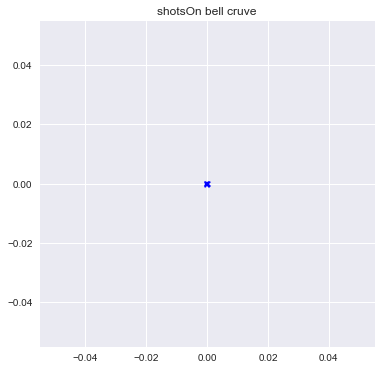

199     0.0
183     0.0
186     0.0
131     0.0
191     0.0
       ... 
121    16.0
166    16.0
116    16.0
264    20.0
89     30.0
Name: totalGoals, Length: 65, dtype: float64
5.3076923076923075
5.94571099953074


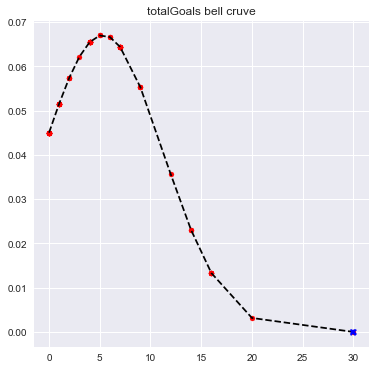

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: goalsConceded, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


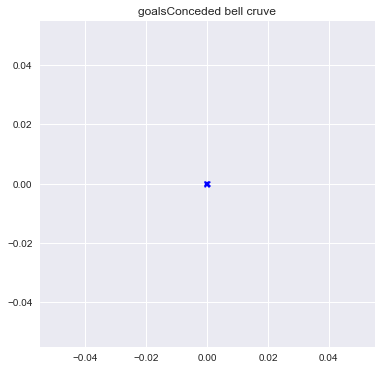

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: goalAssists, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


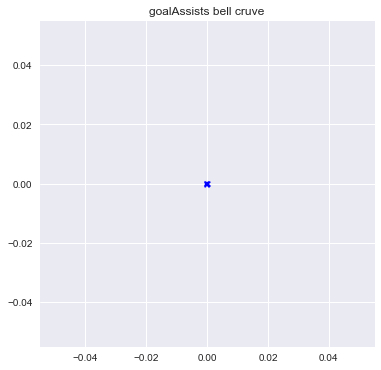

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: goalSaves, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


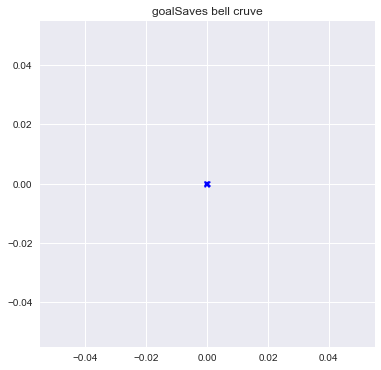

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: totalPasses, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


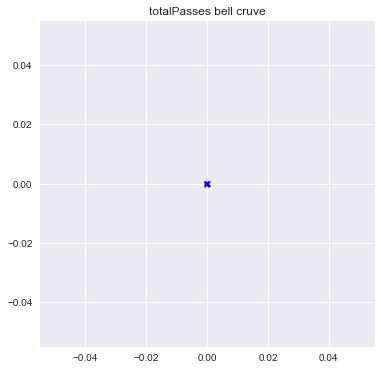

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: keyPasses, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


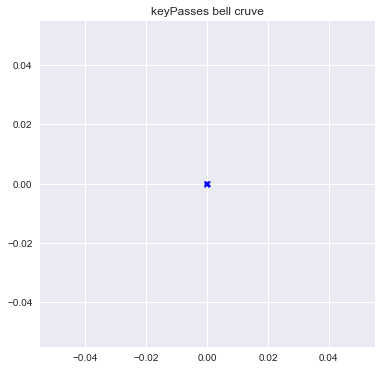

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: passAccuracy, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


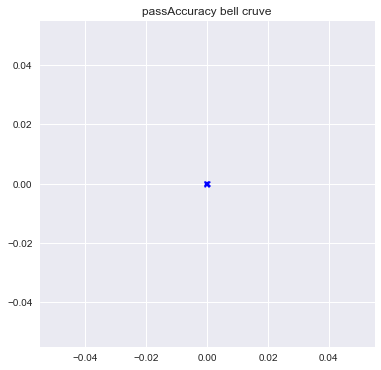

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: totalTackles, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


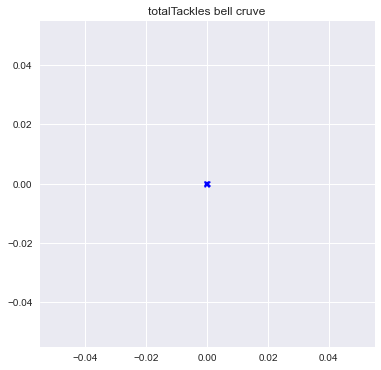

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: blocks, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


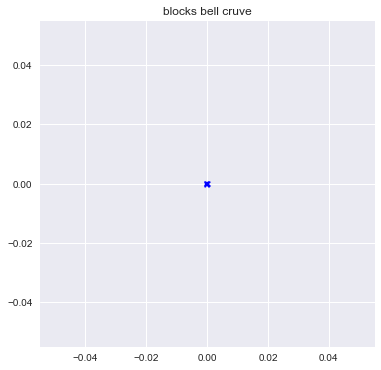

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: interceptions, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


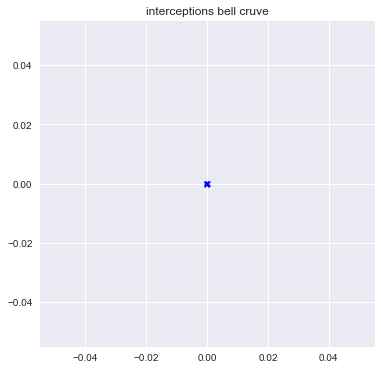

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: duelsTotal, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


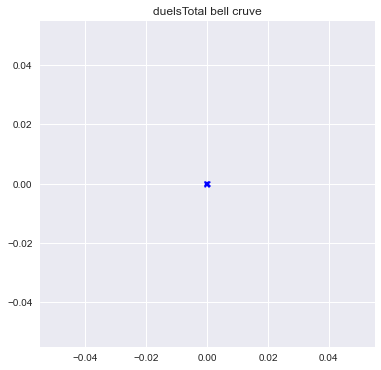

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: duelsWon, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


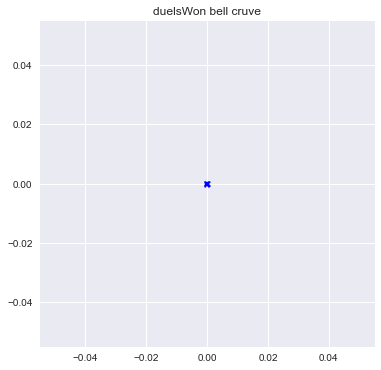

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: dribbleAttempts, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


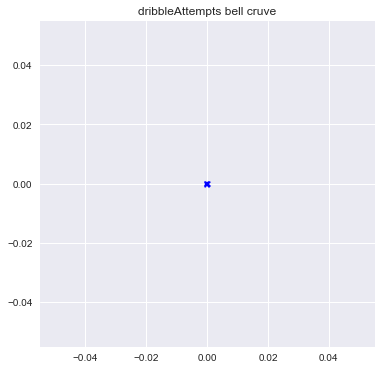

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: dribblesSuccess, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


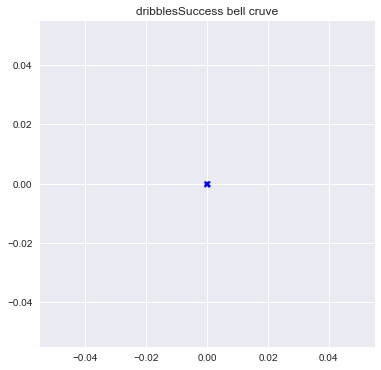

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: dribblesPast, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


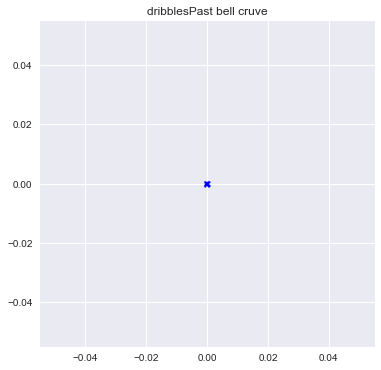

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: foulsDrawn, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


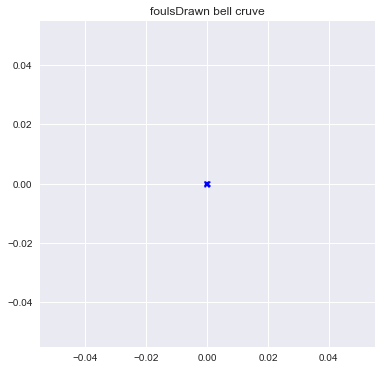

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: foulsCommitted, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


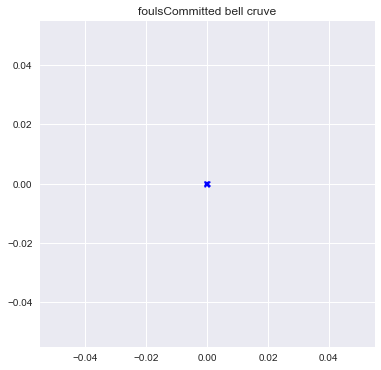

82      0.0
169     0.0
177     0.0
183     0.0
186     0.0
       ... 
321     4.0
290     5.0
240     6.0
239     6.0
294    10.0
Name: cardsYel, Length: 65, dtype: float64
1.4153846153846155
1.838831633170348


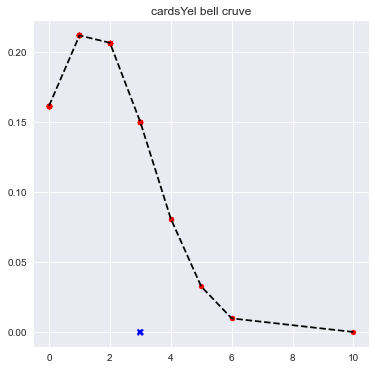

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
154    0.0
152    0.0
169    0.0
327    0.0
321    1.0
Name: cardsYelRed, Length: 65, dtype: float64
0.015384615384615385
0.12307692307692308


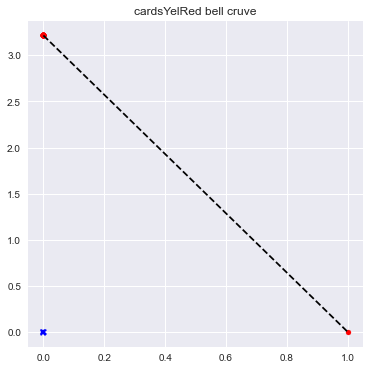

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
191    0.0
144    0.0
327    0.0
162    1.0
123    1.0
Name: cardsRed, Length: 65, dtype: float64
0.03076923076923077
0.1726918793895665


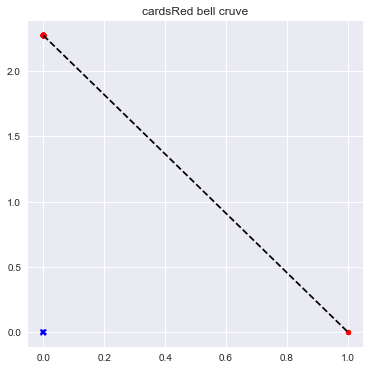

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: penaltyWon, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


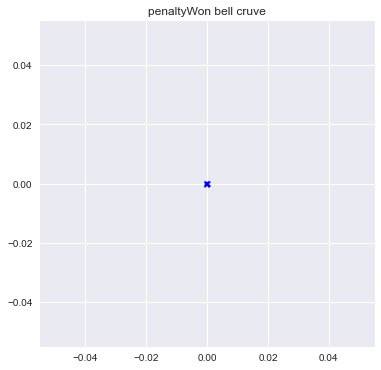

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: penaltyCommited, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


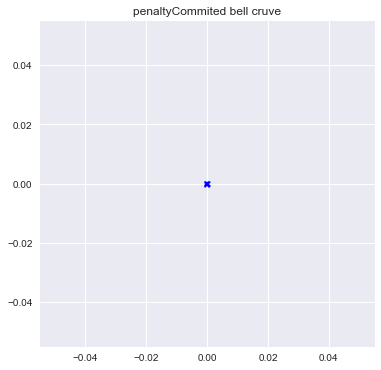

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: penaltyScored, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


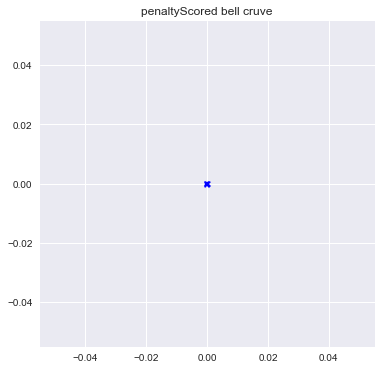

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: penaltyMissed, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


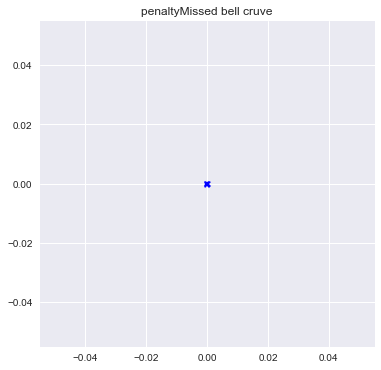

82     0.0
228    0.0
232    0.0
236    0.0
239    0.0
      ... 
183    0.0
186    0.0
191    0.0
196    0.0
327    0.0
Name: penaltySaved, Length: 65, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


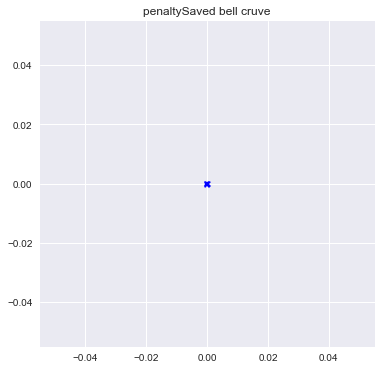

JohnTerry
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


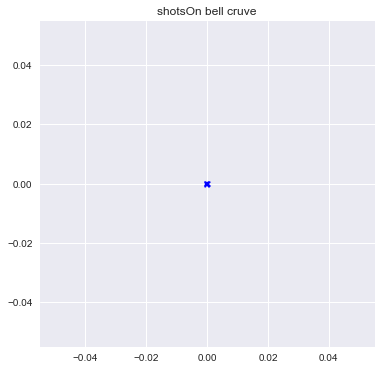

0.7415730337078652
1.1069554347640727


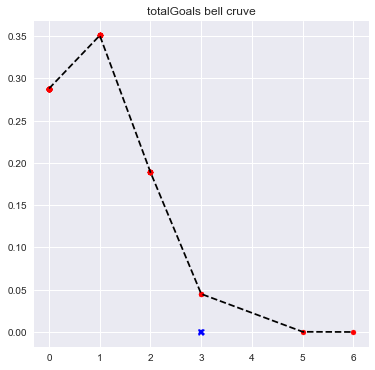

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


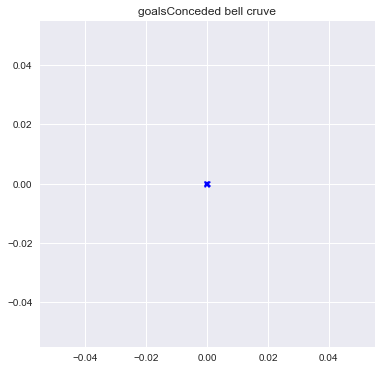

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


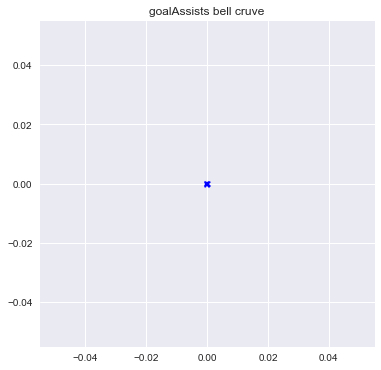

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


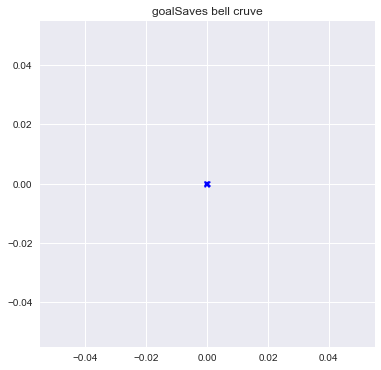

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


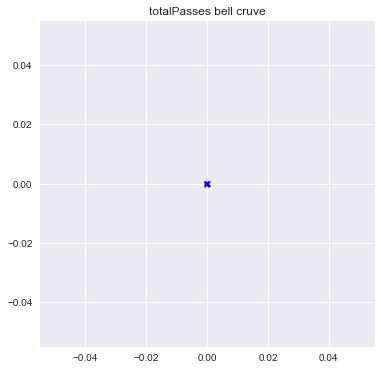

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


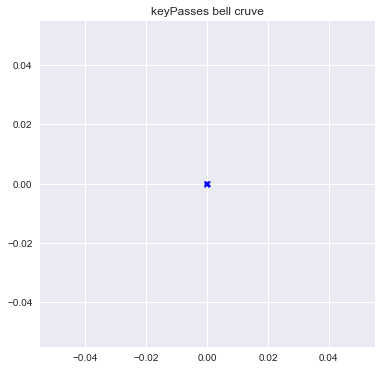

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


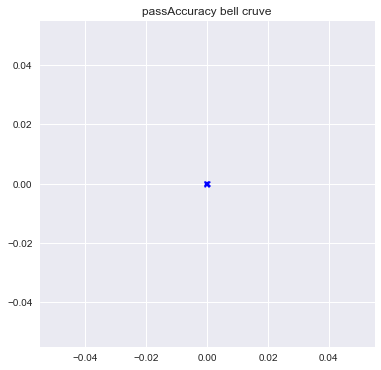

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


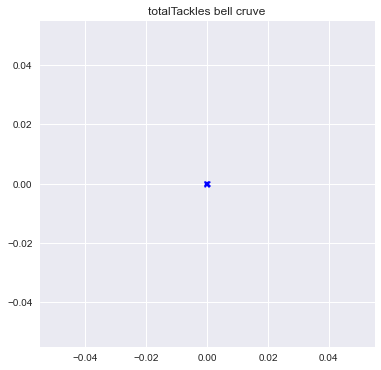

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


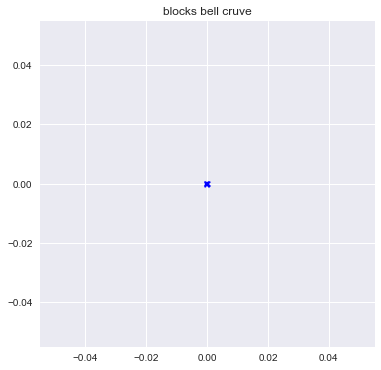

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


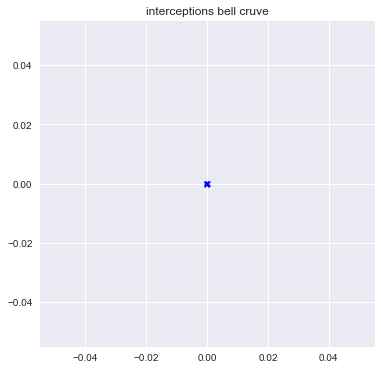

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


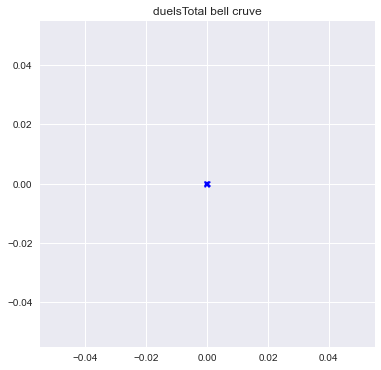

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


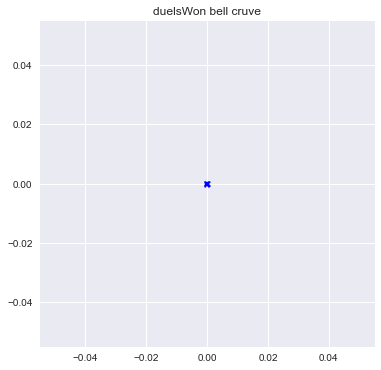

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


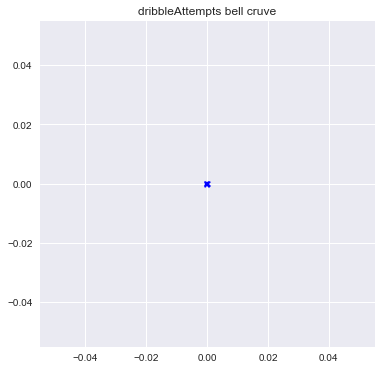

<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


0.0
0.0


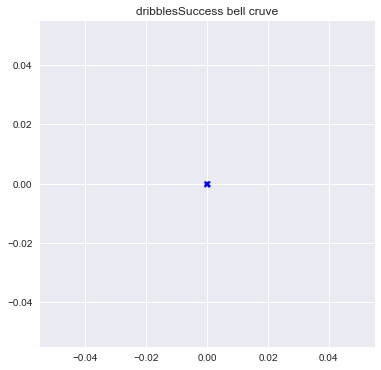

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


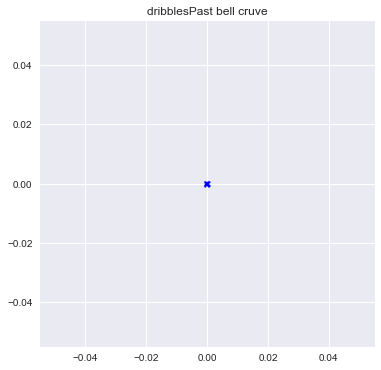

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


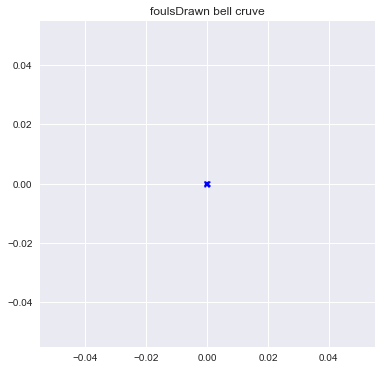

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


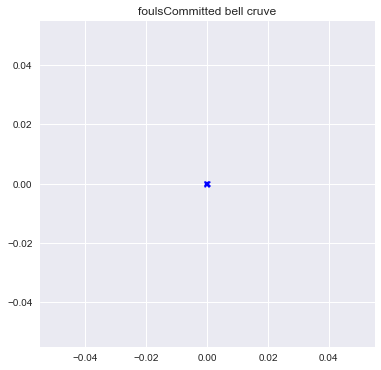

2.2134831460674156
2.0797142744134565


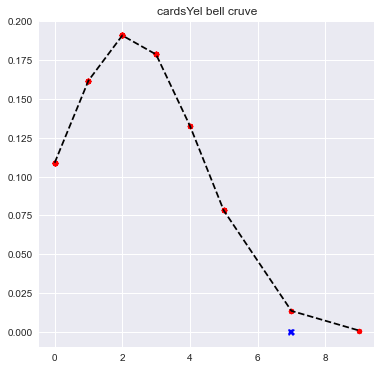

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


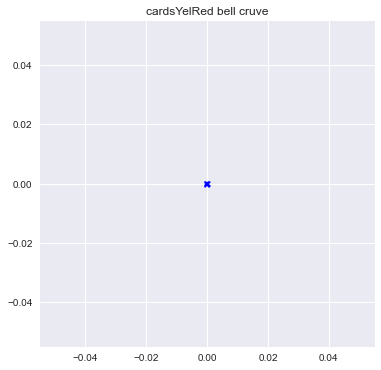

0.06741573033707865
0.29213483146067415


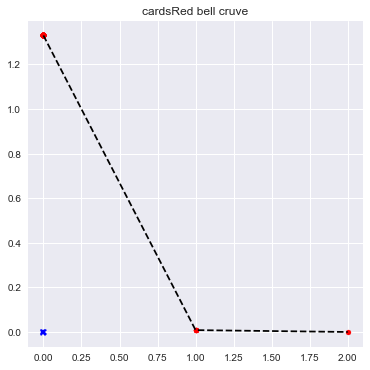

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


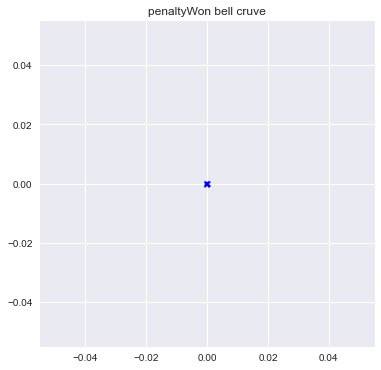

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


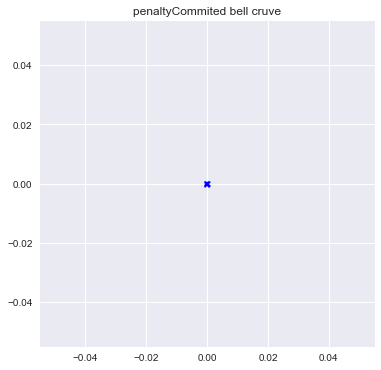

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


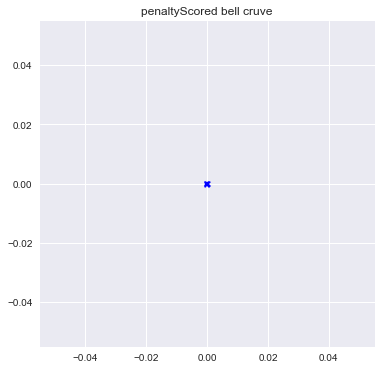

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


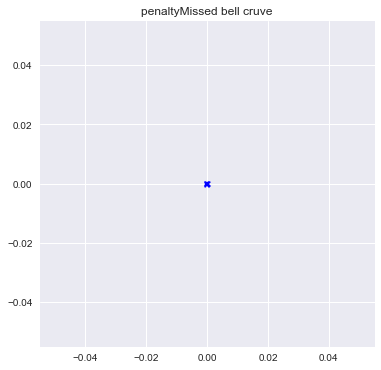

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


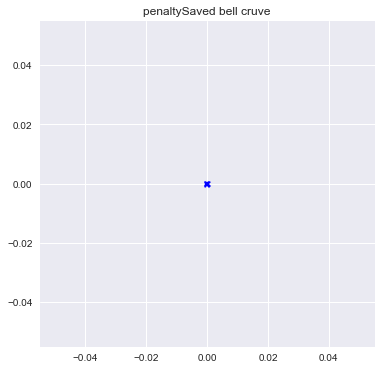

RyanGiggs
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


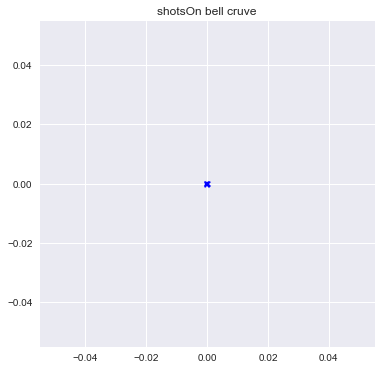

1.3333333333333333
2.0394433408313204


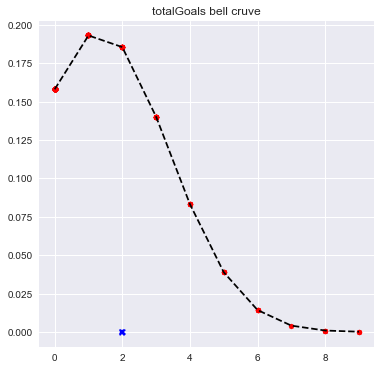

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


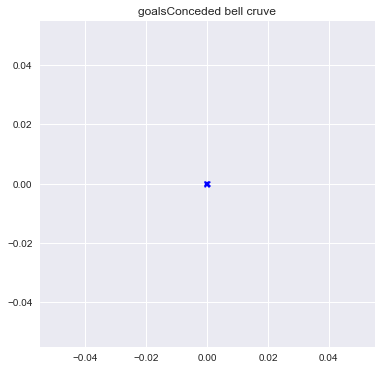

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


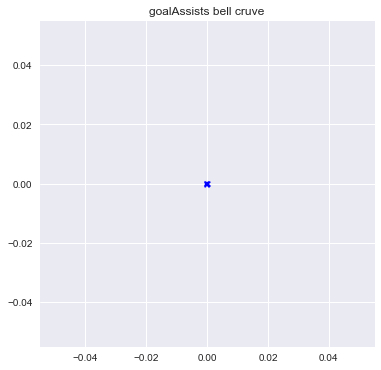

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


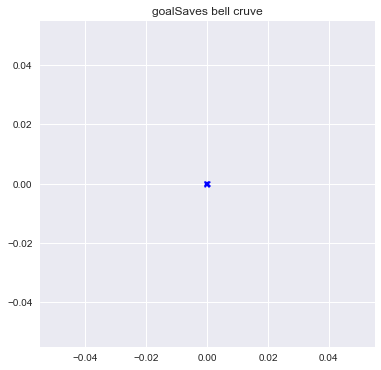

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


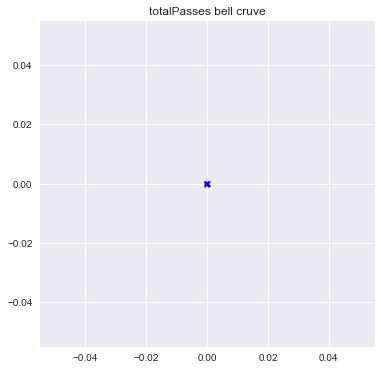

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


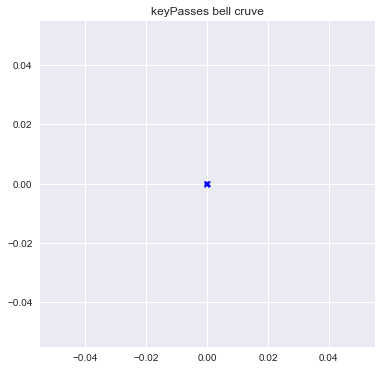

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


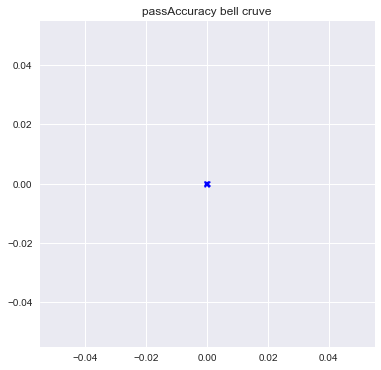

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


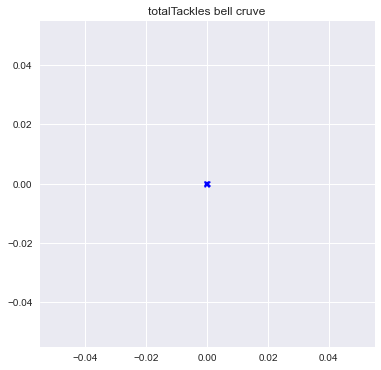

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


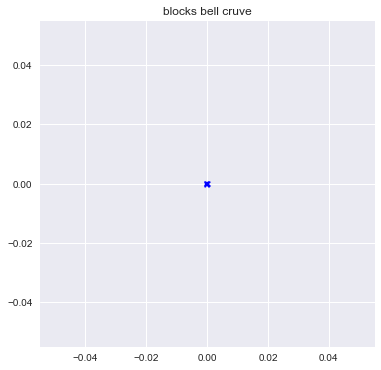

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


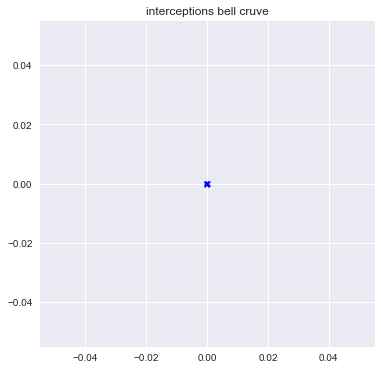

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


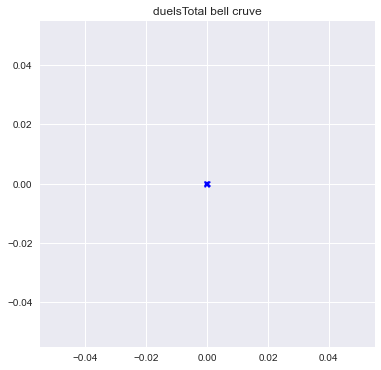

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


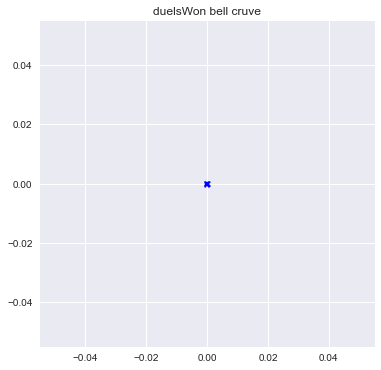

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


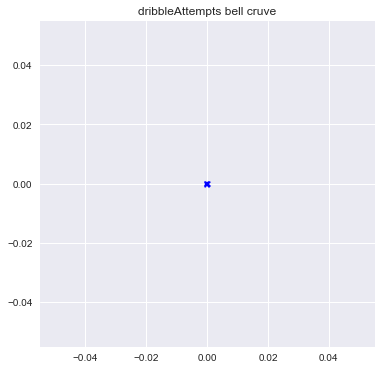

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


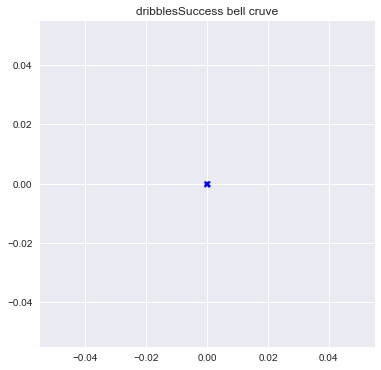

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


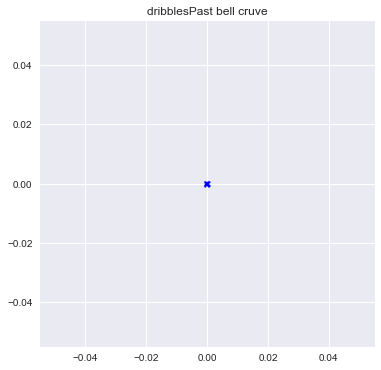

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


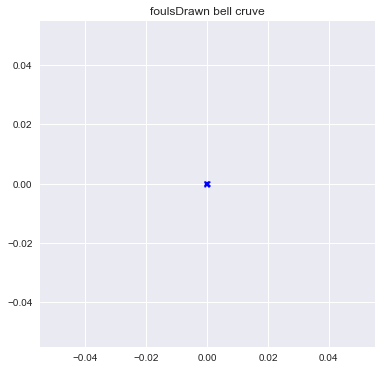

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


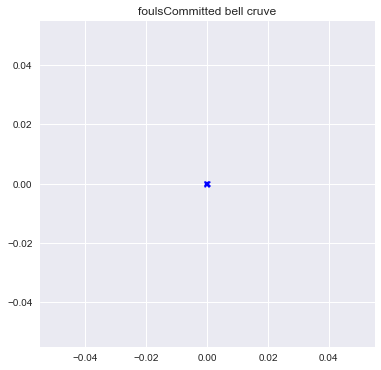

2.5345911949685536
2.6153390636367027


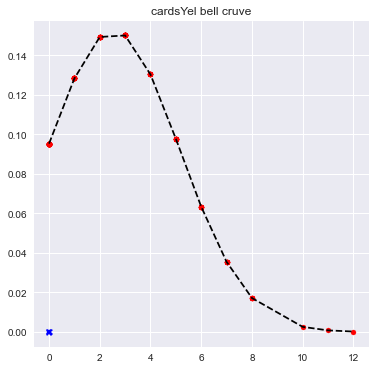

0.050314465408805034
0.2185930465029279


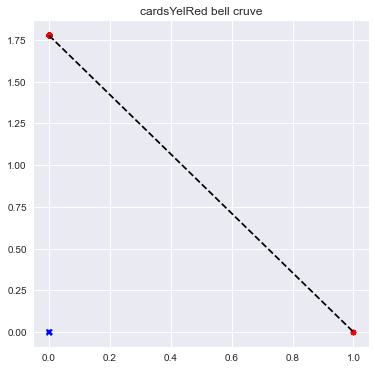

0.0440251572327044
0.2051510242805043


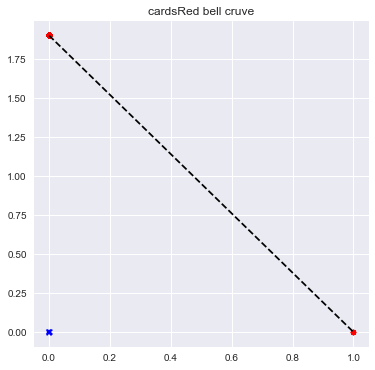

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


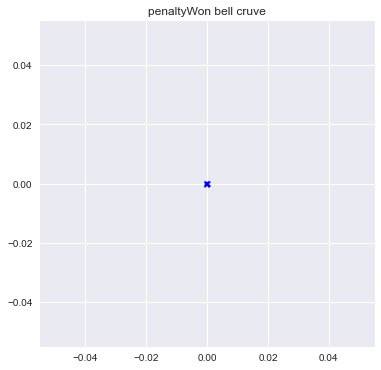

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


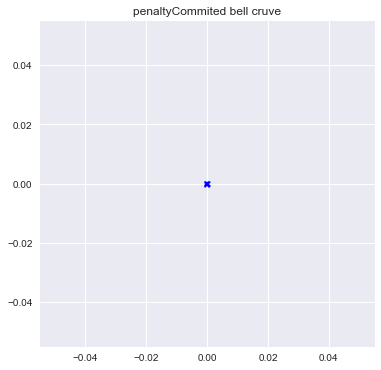

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


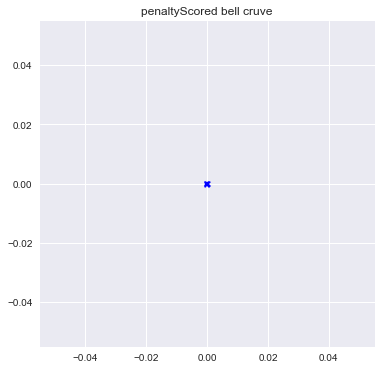

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


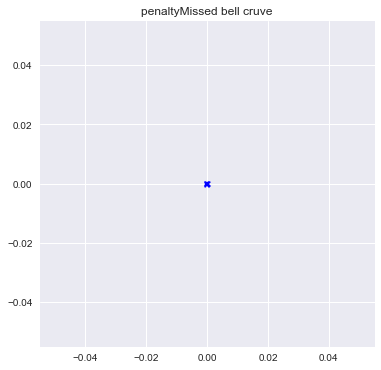

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


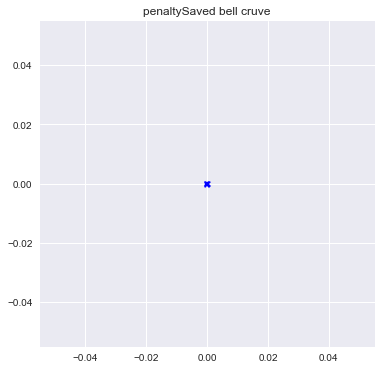

GarethBale
2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: shotsOn, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


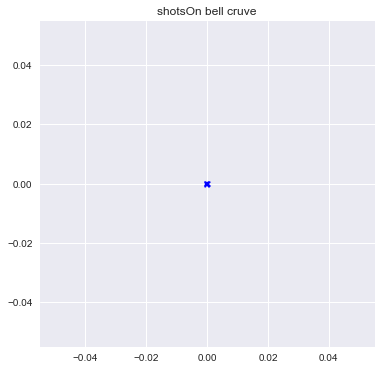

2927     0.0
2824     0.0
2825     0.0
2850     0.0
2853     0.0
        ... 
2752    13.0
2867    13.0
2699    18.0
2974    20.0
2687    20.0
Name: totalGoals, Length: 114, dtype: float64
3.6666666666666665
4.416211495910063


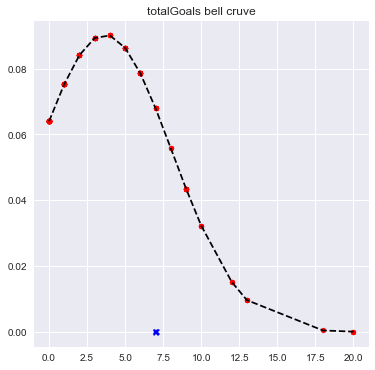

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: goalsConceded, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


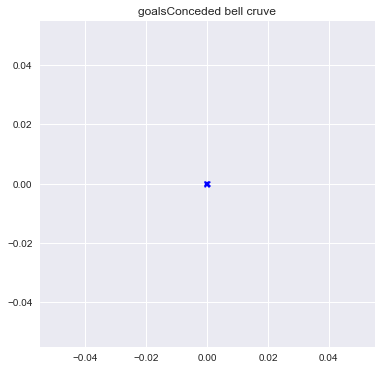

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: goalAssists, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


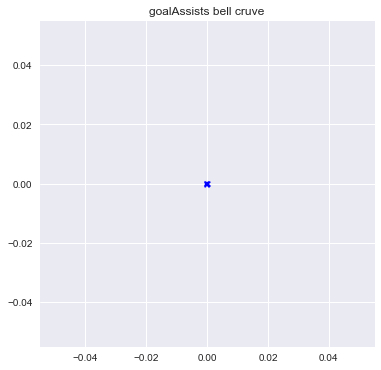

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: goalSaves, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


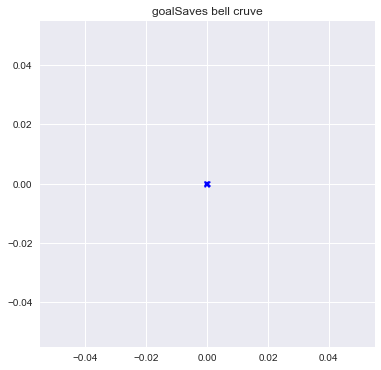

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: totalPasses, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


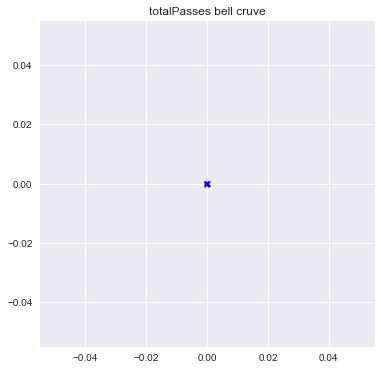

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: keyPasses, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


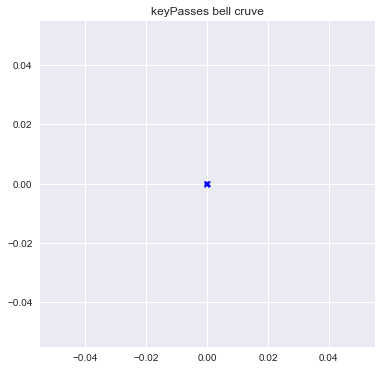

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: passAccuracy, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


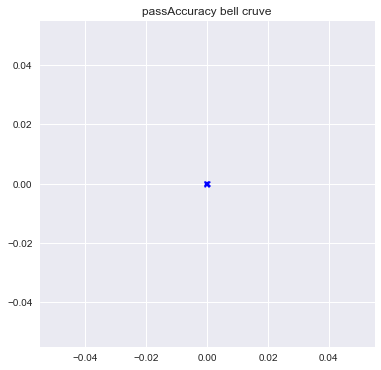

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: totalTackles, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


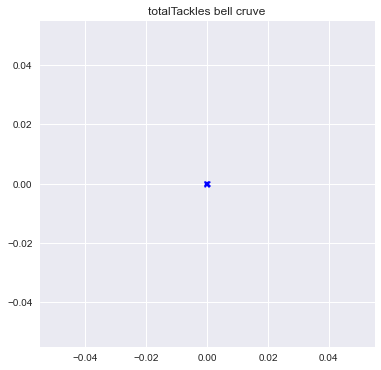

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: blocks, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


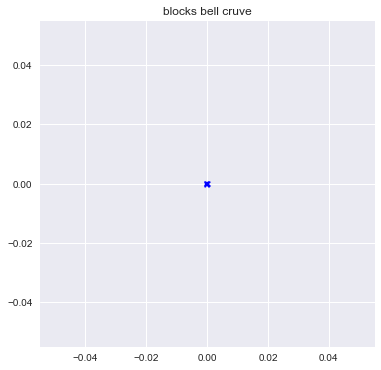

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: interceptions, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


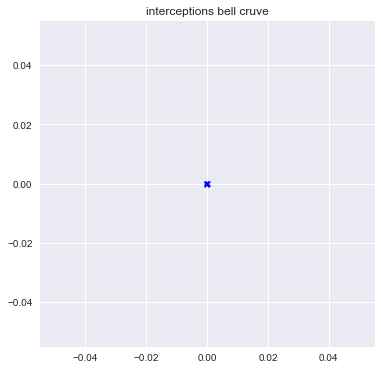

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: duelsTotal, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


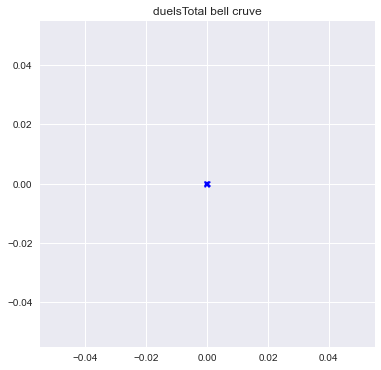

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: duelsWon, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


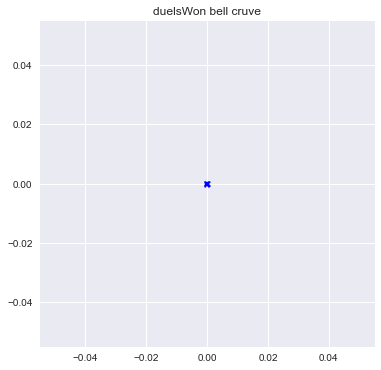

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: dribbleAttempts, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


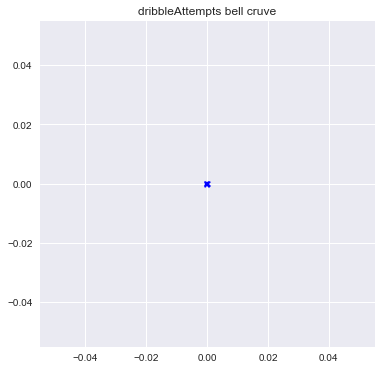

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: dribblesSuccess, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


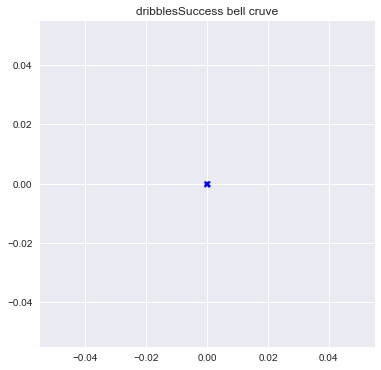

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: dribblesPast, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


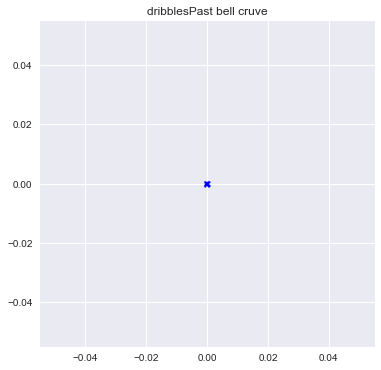

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: foulsDrawn, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


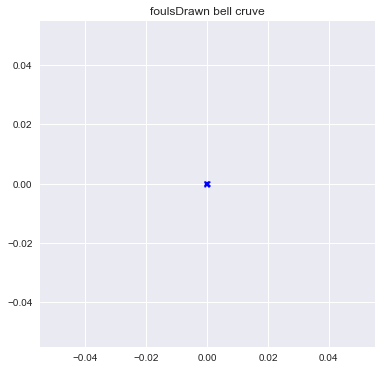

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: foulsCommitted, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


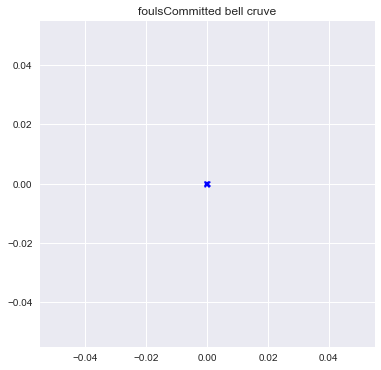

3175    0.0
2820    0.0
3072    0.0
2824    0.0
2825    0.0
       ... 
2958    5.0
3109    5.0
2831    6.0
3075    6.0
2687    6.0
Name: cardsYel, Length: 114, dtype: float64
1.1666666666666667
1.5944897807194354


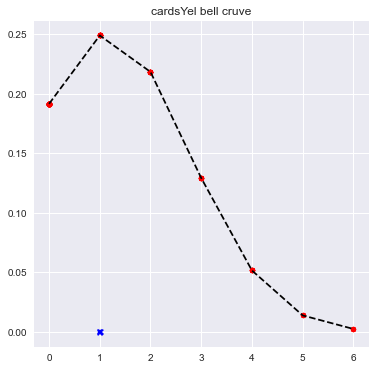

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2809    0.0
2849    0.0
2979    1.0
3075    1.0
2850    1.0
Name: cardsYelRed, Length: 114, dtype: float64
0.02631578947368421
0.16007269816574263


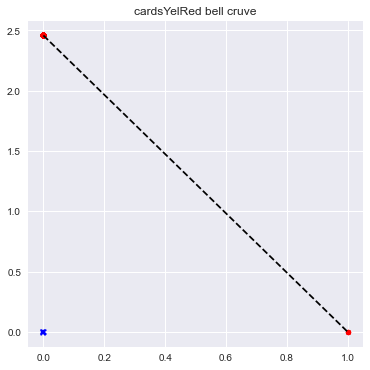

2687    0.0
3037    0.0
3033    0.0
3028    0.0
3022    0.0
       ... 
3117    1.0
2730    1.0
2752    1.0
3149    1.0
3045    1.0
Name: cardsRed, Length: 114, dtype: float64
0.06140350877192982
0.24006898567375454


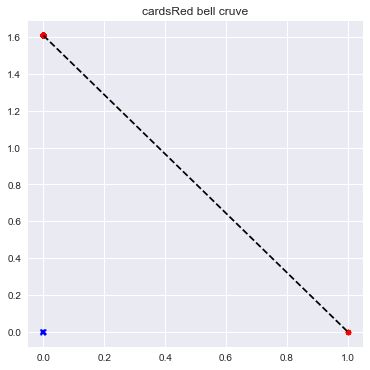

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: penaltyWon, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


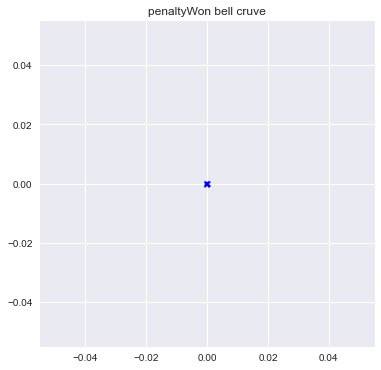

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: penaltyCommited, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


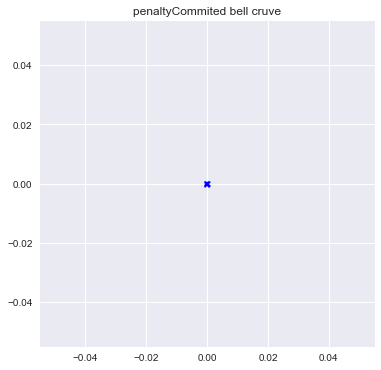

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: penaltyScored, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


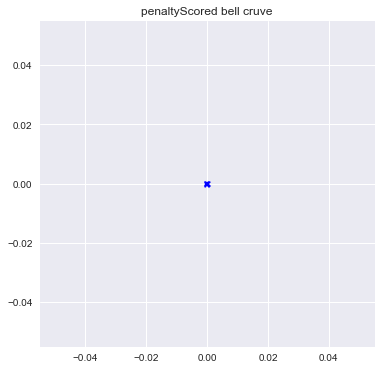

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: penaltyMissed, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


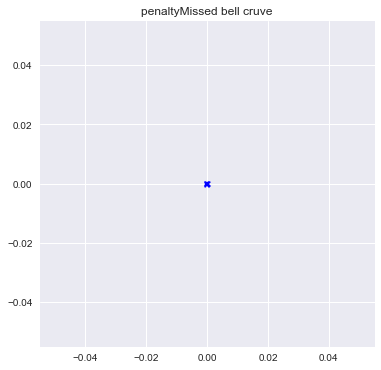

2687    0.0
3050    0.0
3048    0.0
3045    0.0
3037    0.0
       ... 
2815    0.0
2813    0.0
2809    0.0
2807    0.0
3175    0.0
Name: penaltySaved, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


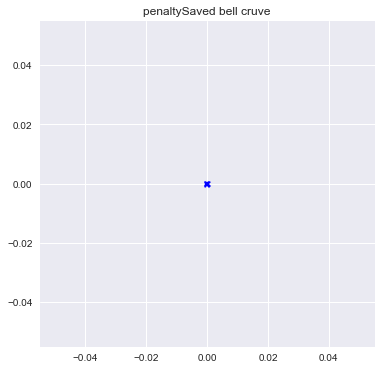

RobinvanPersie
3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: shotsOn, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


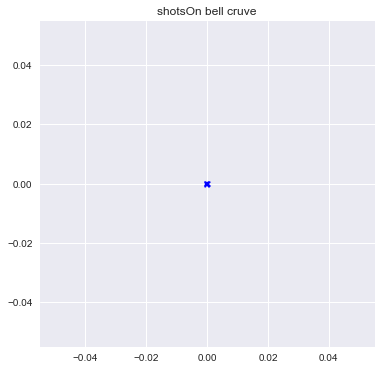

3425     0.0
3305     0.0
3307     0.0
3332     0.0
3343     0.0
        ... 
3345    17.0
3460    17.0
3262    17.0
3407    23.0
3195    30.0
Name: totalGoals, Length: 114, dtype: float64
4.271929824561403
5.4840839688622145


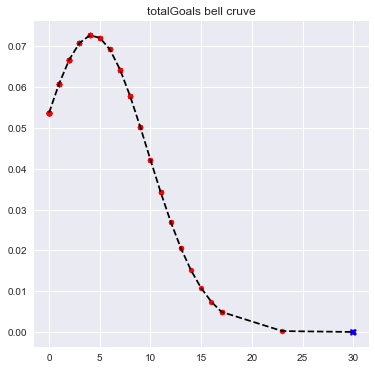

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: goalsConceded, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


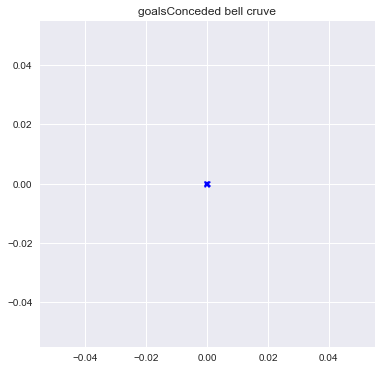

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: goalAssists, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


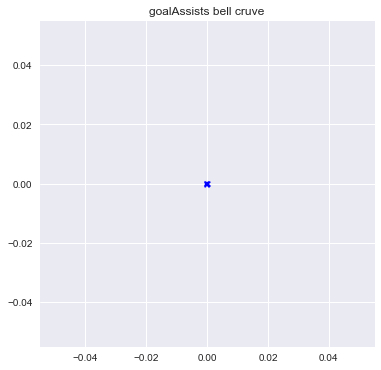

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: goalSaves, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


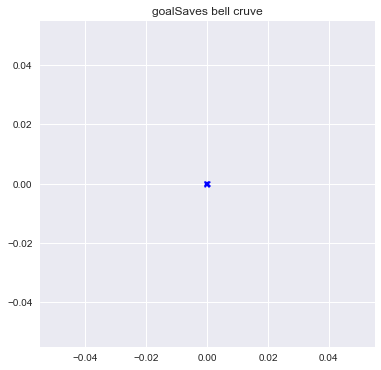

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: totalPasses, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


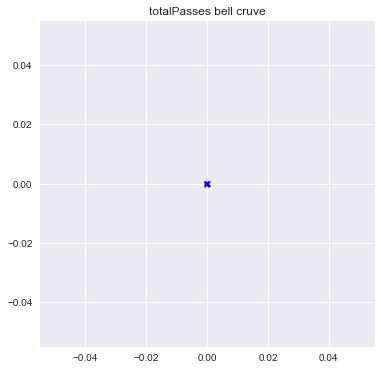

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: keyPasses, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


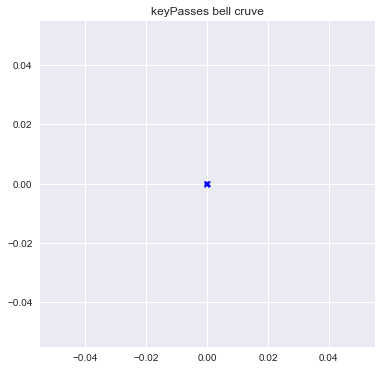

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: passAccuracy, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


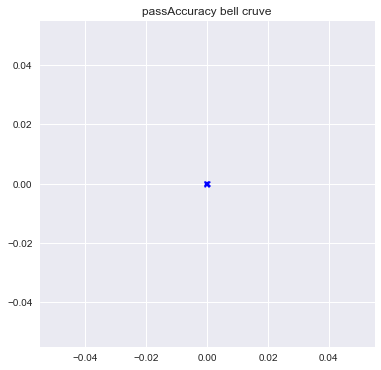

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: totalTackles, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


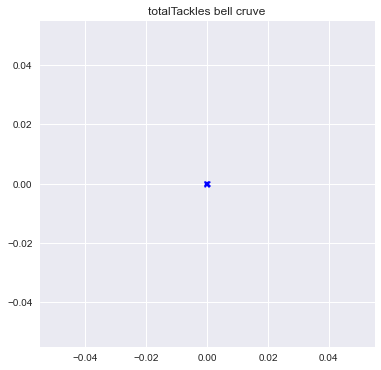

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: blocks, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


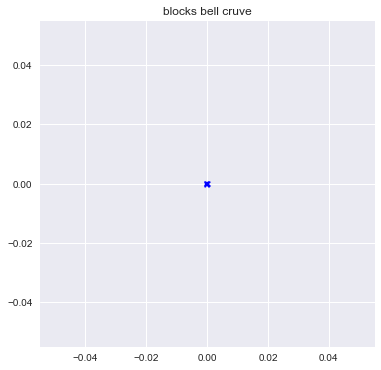

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: interceptions, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


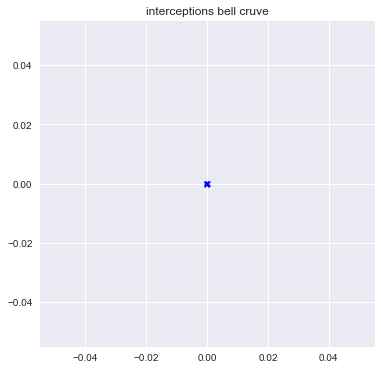

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: duelsTotal, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


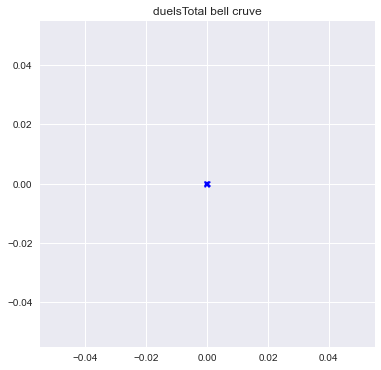

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: duelsWon, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


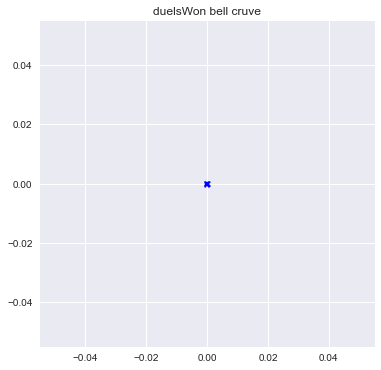

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: dribbleAttempts, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


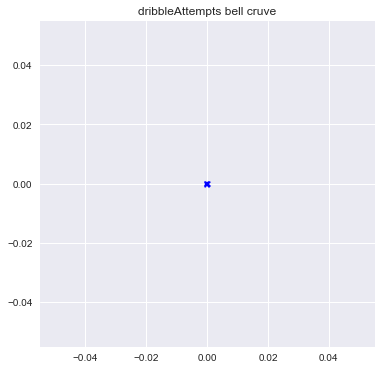

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: dribblesSuccess, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


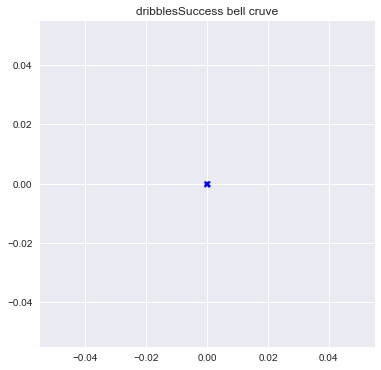

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: dribblesPast, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


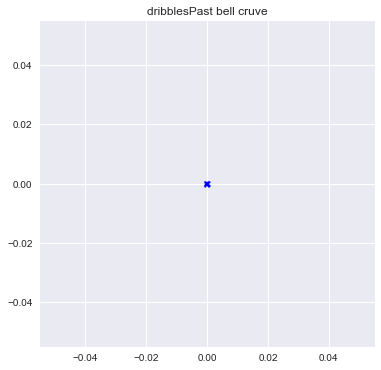

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: foulsDrawn, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


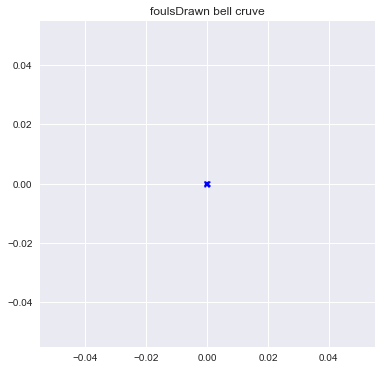

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: foulsCommitted, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


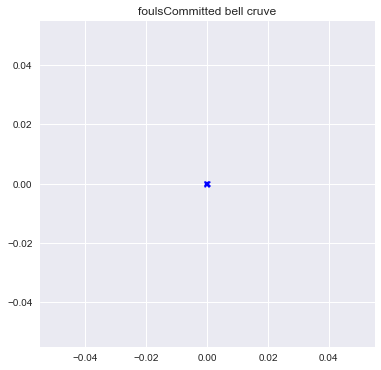

3179    0.0
3305    0.0
3307    0.0
3337    0.0
3344    0.0
       ... 
3575    6.0
3232    6.0
3257    6.0
3286    7.0
3195    8.0
Name: cardsYel, Length: 114, dtype: float64
1.3859649122807018
1.7142783860078747


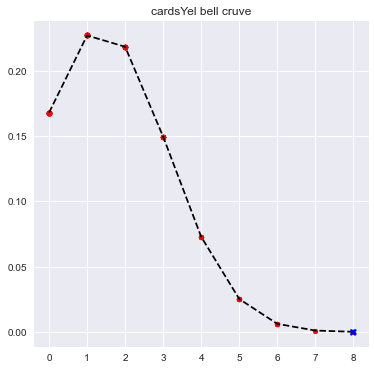

3179    0.0
3533    0.0
3519    0.0
3512    0.0
3508    0.0
       ... 
3287    0.0
3317    0.0
3677    0.0
3286    1.0
3575    2.0
Name: cardsYelRed, Length: 114, dtype: float64
0.02631578947368421
0.20776700495310546


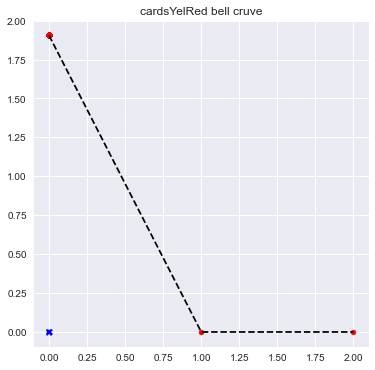

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3262    1.0
3265    1.0
3458    1.0
3626    1.0
3492    1.0
Name: cardsRed, Length: 114, dtype: float64
0.07017543859649122
0.25544245225545675


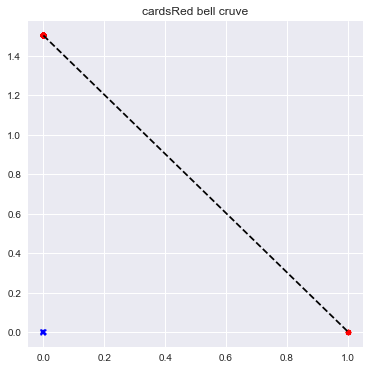

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: penaltyWon, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


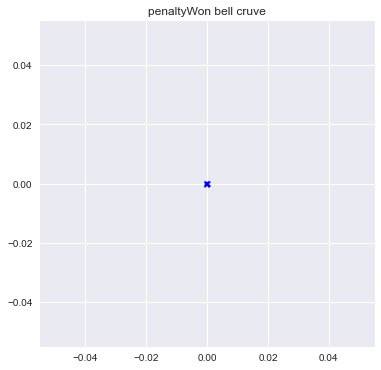

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: penaltyCommited, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


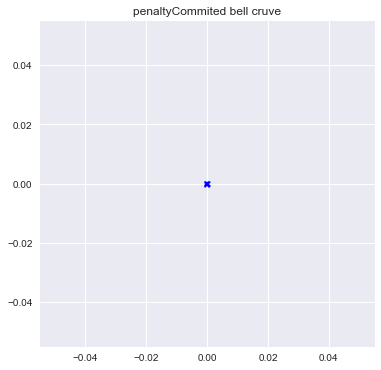

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: penaltyScored, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


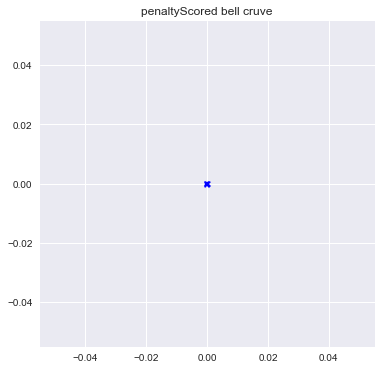

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: penaltyMissed, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


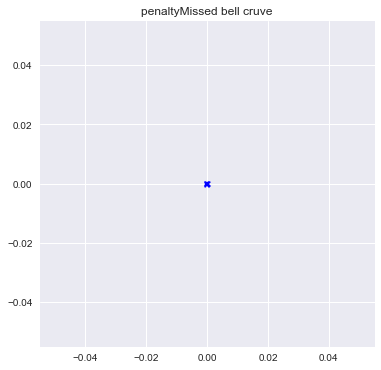

3179    0.0
3534    0.0
3533    0.0
3519    0.0
3512    0.0
       ... 
3290    0.0
3288    0.0
3287    0.0
3280    0.0
3677    0.0
Name: penaltySaved, Length: 114, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


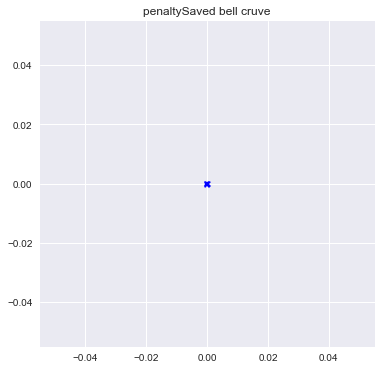

GarethBale
3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: shotsOn, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


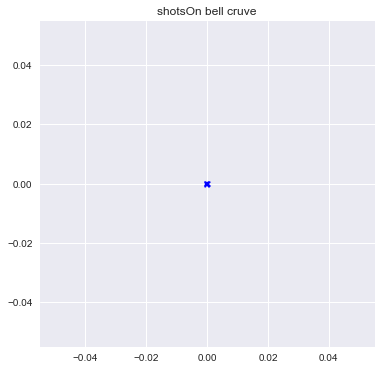

4168     0.0
3859     0.0
3908     0.0
3832     0.0
3829     0.0
        ... 
3827    18.0
4012    19.0
4111    21.0
4108    23.0
3698    26.0
Name: totalGoals, Length: 100, dtype: float64
4.96
5.817078304441157


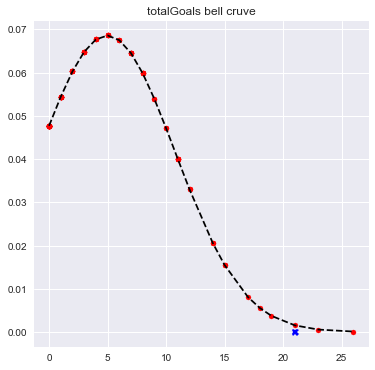

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: goalsConceded, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


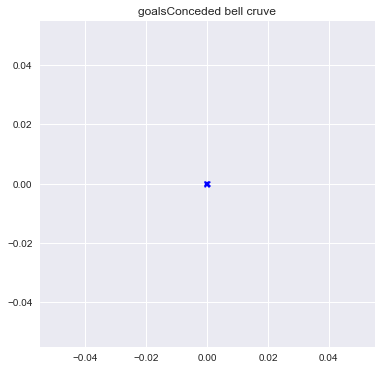

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: goalAssists, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


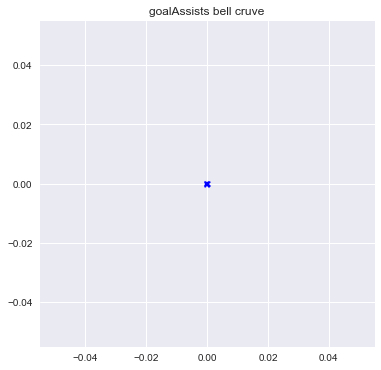

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: goalSaves, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


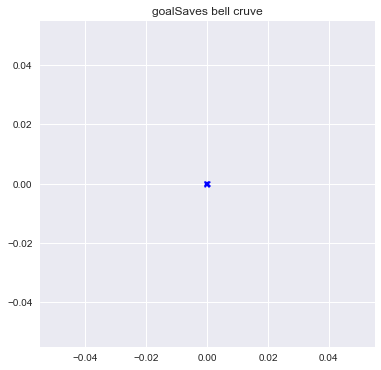

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: totalPasses, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


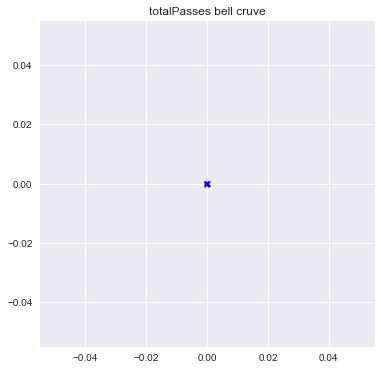

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: keyPasses, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


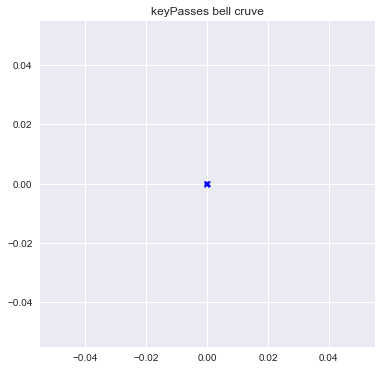

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: passAccuracy, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


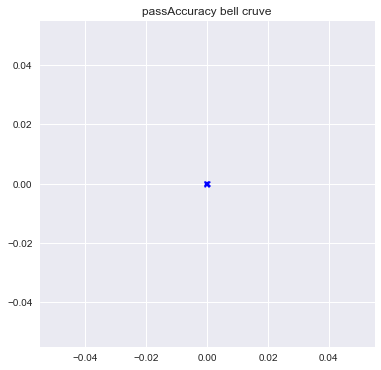

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: totalTackles, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


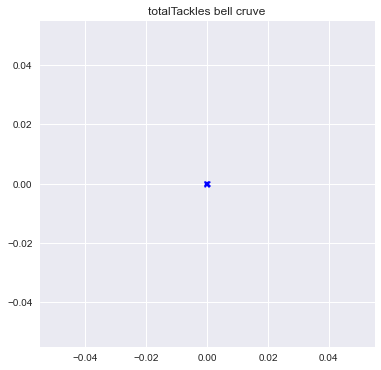

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: blocks, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


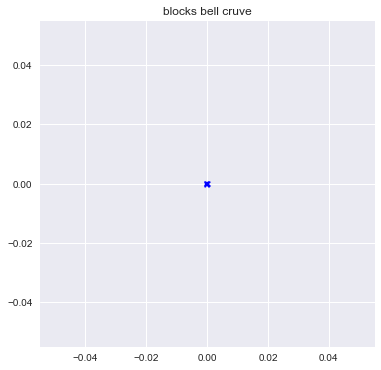

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: interceptions, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


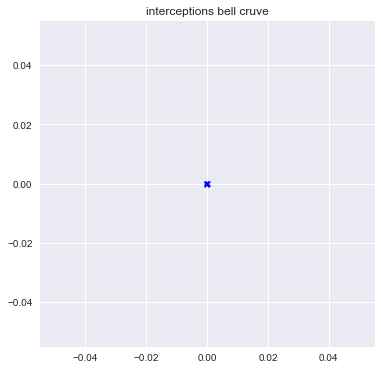

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: duelsTotal, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


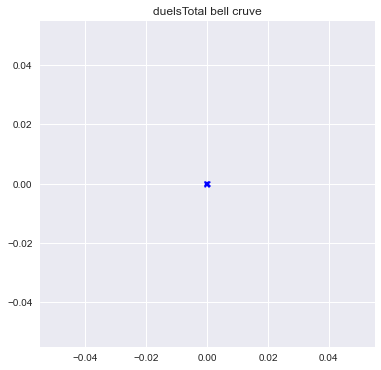

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: duelsWon, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


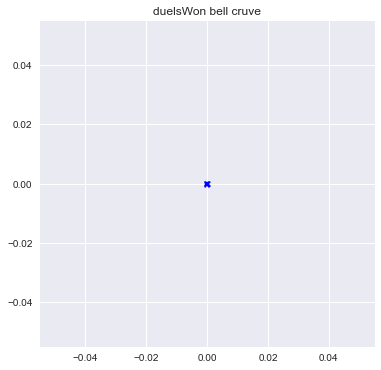

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: dribbleAttempts, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


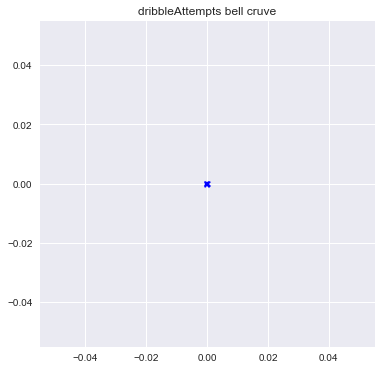

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: dribblesSuccess, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


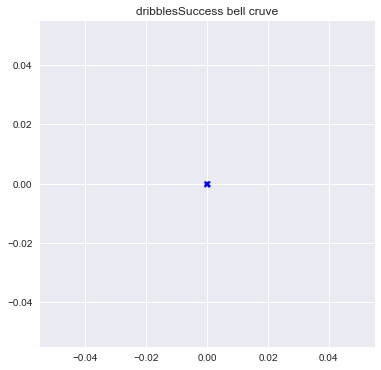

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: dribblesPast, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


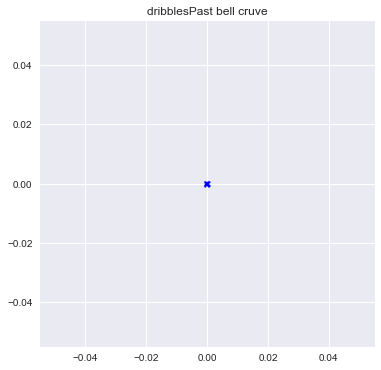

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: foulsDrawn, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


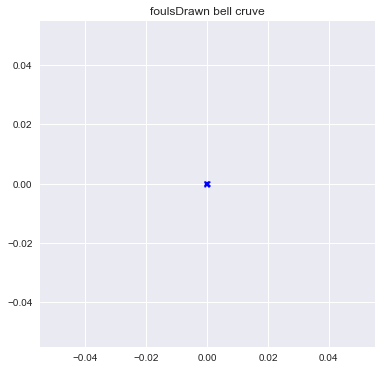

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: foulsCommitted, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


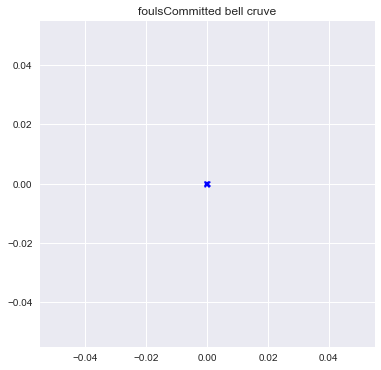

4168     0.0
3799     0.0
4058     0.0
3810     0.0
4051     0.0
        ... 
3698     6.0
4111     6.0
4012     8.0
3747     8.0
4108    10.0
Name: cardsYel, Length: 100, dtype: float64
1.84
2.105801510114379


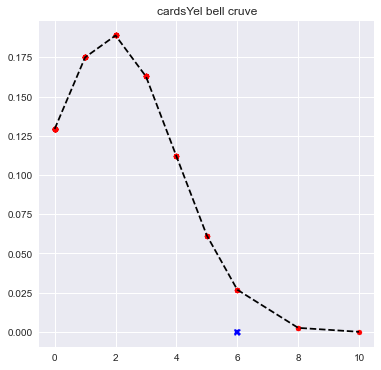

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
4168    0.0
3771    1.0
4012    1.0
Name: cardsYelRed, Length: 100, dtype: float64
0.02
0.13999999999999999


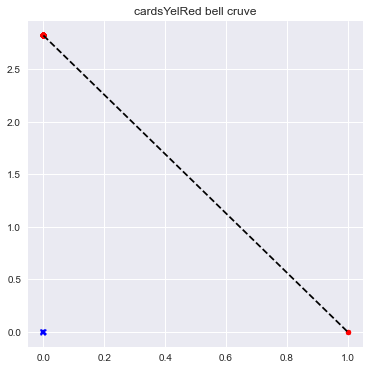

3683    0.0
4064    0.0
4063    0.0
4061    0.0
4058    0.0
       ... 
3744    1.0
3766    1.0
3842    1.0
3960    1.0
3931    1.0
Name: cardsRed, Length: 100, dtype: float64
0.06
0.23748684174075832


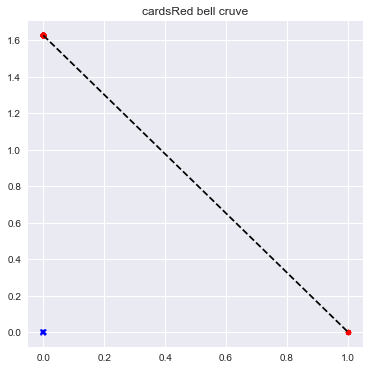

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: penaltyWon, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


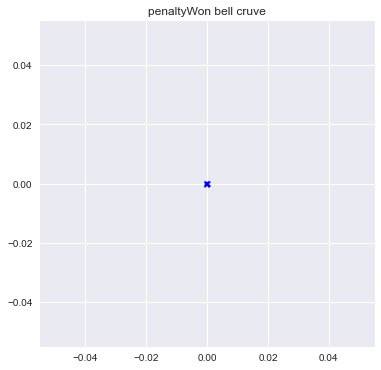

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: penaltyCommited, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


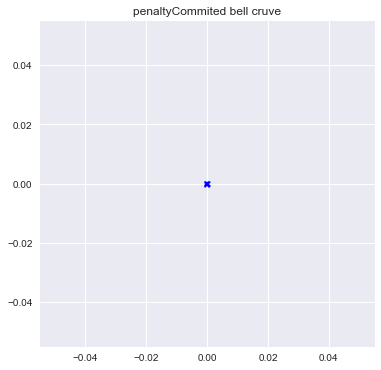

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: penaltyScored, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


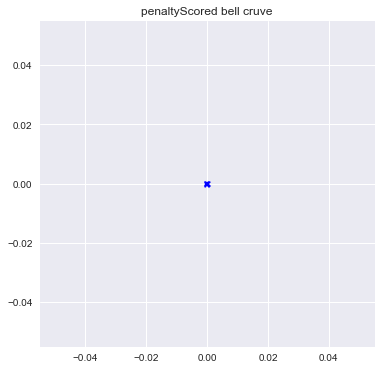

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: penaltyMissed, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


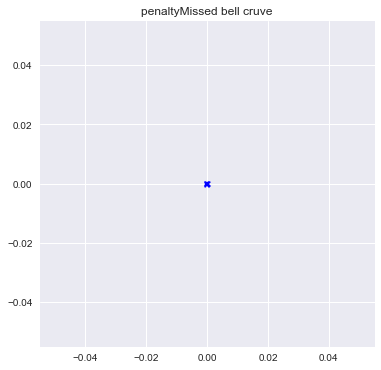

3683    0.0
4072    0.0
4064    0.0
4063    0.0
4061    0.0
       ... 
3827    0.0
3810    0.0
3802    0.0
3874    0.0
4168    0.0
Name: penaltySaved, Length: 100, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


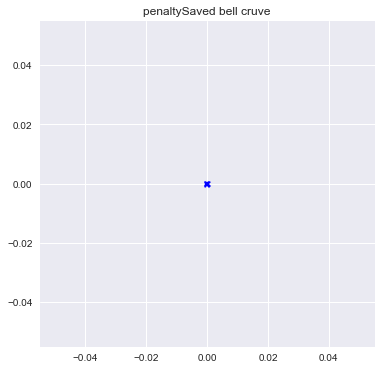

LuisSuárezDíaz
4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: shotsOn, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


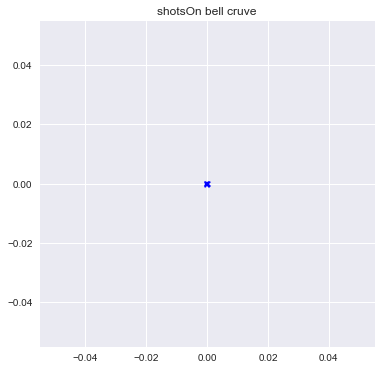

4454     0.0
4296     0.0
4300     0.0
4522     0.0
4508     0.0
        ... 
4612    16.0
4445    17.0
4319    17.0
4665    21.0
4601    31.0
Name: totalGoals, Length: 121, dtype: float64
3.760330578512397
5.241324659686567


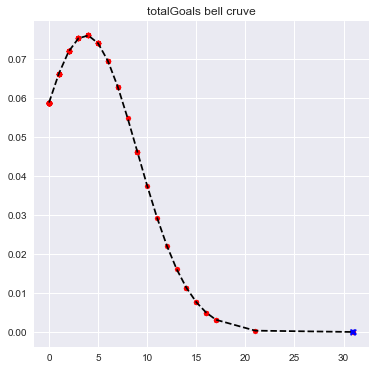

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: goalsConceded, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


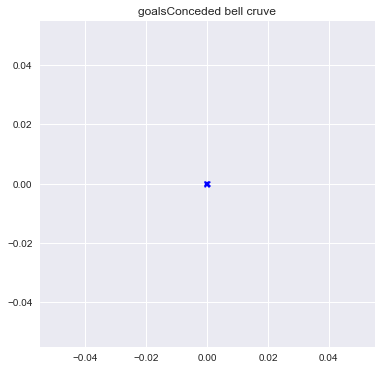

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: goalAssists, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


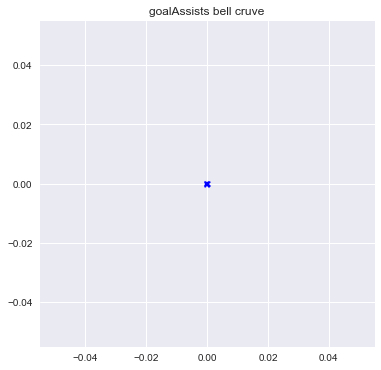

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: goalSaves, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


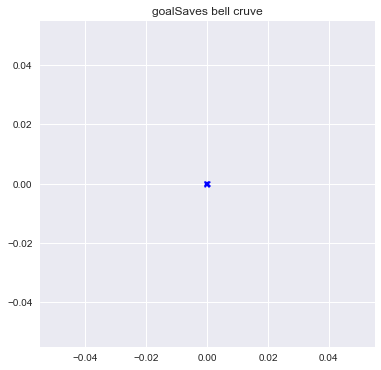

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: totalPasses, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


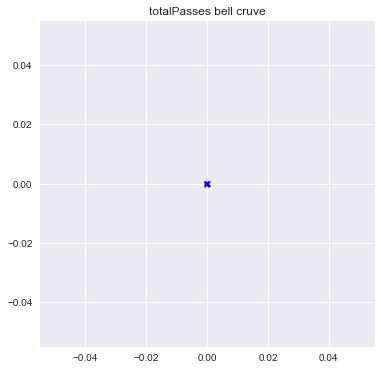

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: keyPasses, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


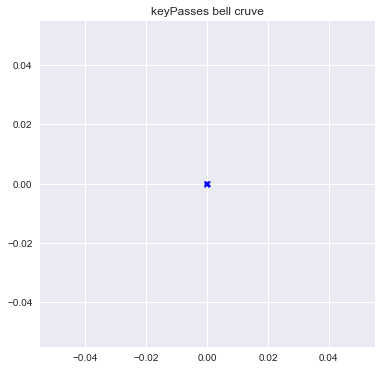

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: passAccuracy, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


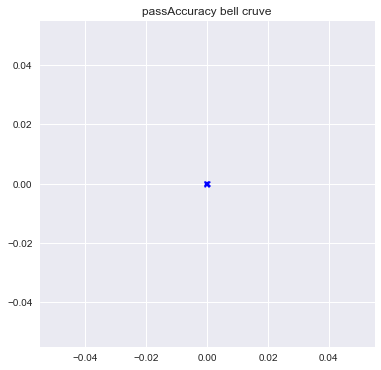

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: totalTackles, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


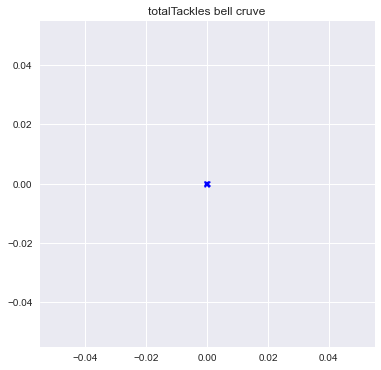

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: blocks, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


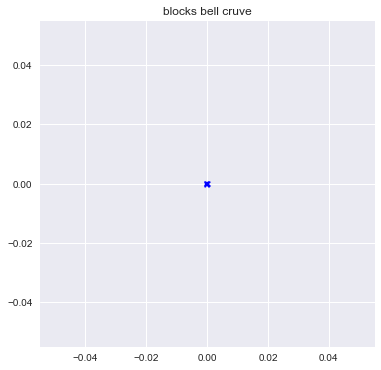

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: interceptions, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


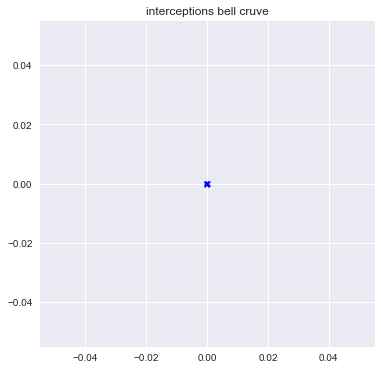

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: duelsTotal, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


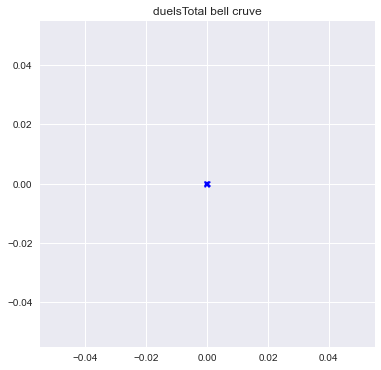

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: duelsWon, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


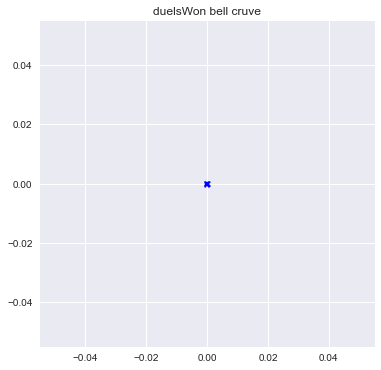

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: dribbleAttempts, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


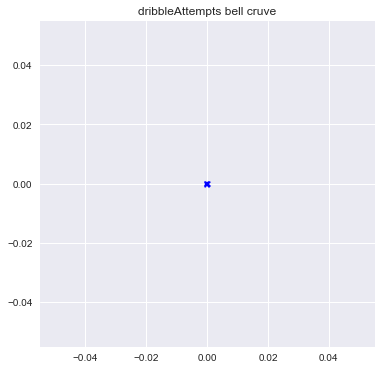

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: dribblesSuccess, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


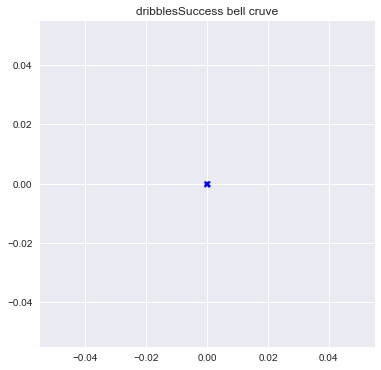

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: dribblesPast, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


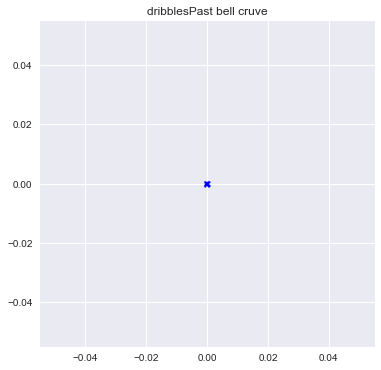

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: foulsDrawn, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


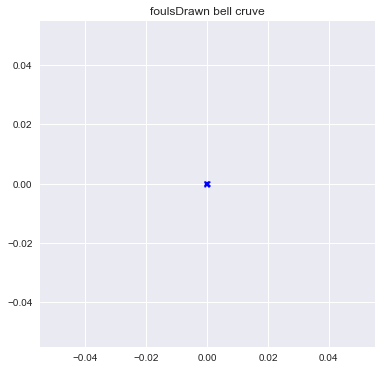

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: foulsCommitted, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


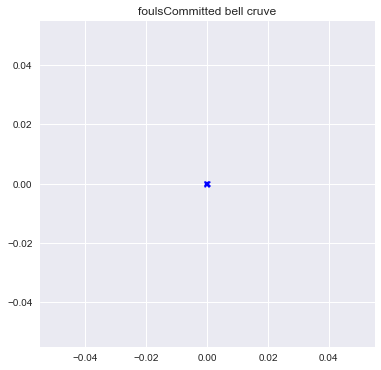

4454    0.0
4499    0.0
4487    0.0
4482    0.0
4472    0.0
       ... 
4462    6.0
4601    6.0
4189    7.0
4198    7.0
4240    8.0
Name: cardsYel, Length: 121, dtype: float64
1.2644628099173554
1.7710649317341676


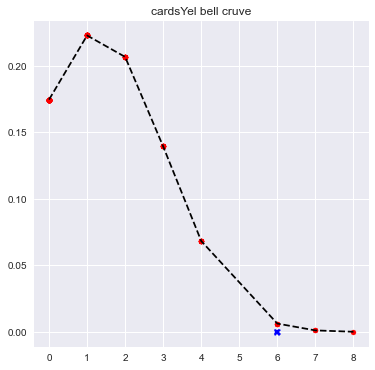

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4388    0.0
4363    0.0
4653    1.0
4223    1.0
4238    1.0
Name: cardsYelRed, Length: 121, dtype: float64
0.024793388429752067
0.15549493985311388


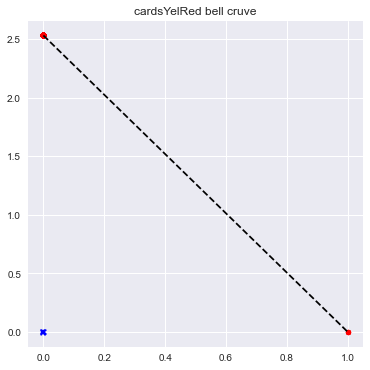

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4240    1.0
4500    1.0
4367    1.0
4468    1.0
4557    1.0
Name: cardsRed, Length: 121, dtype: float64
0.04132231404958678
0.19903462113706277


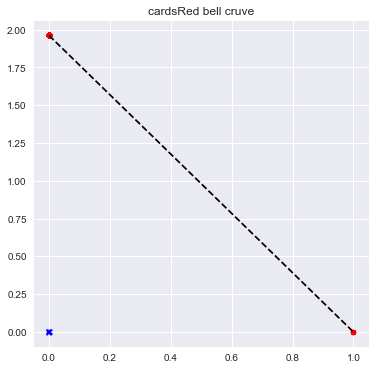

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: penaltyWon, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


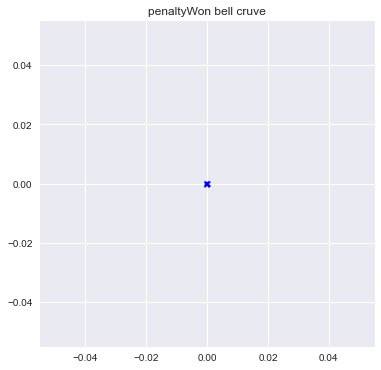

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: penaltyCommited, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


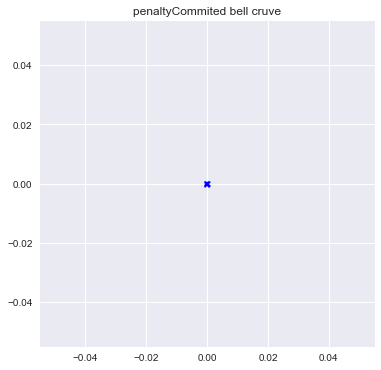

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: penaltyScored, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


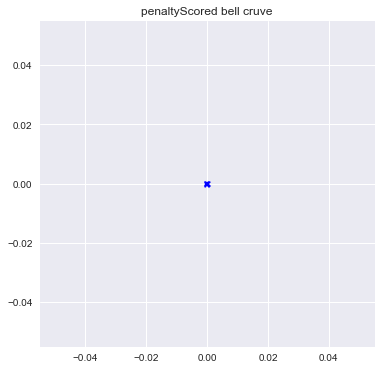

4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: penaltyMissed, Length: 121, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


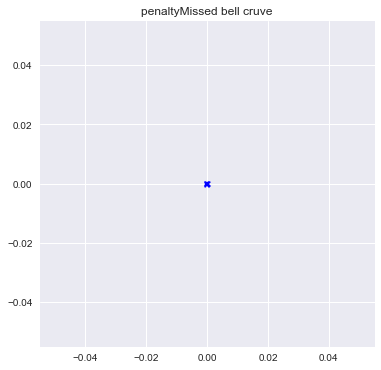

<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


4170    0.0
4540    0.0
4538    0.0
4535    0.0
4531    0.0
       ... 
4319    0.0
4316    0.0
4312    0.0
4451    0.0
4681    0.0
Name: penaltySaved, Length: 121, dtype: float64
0.0
0.0


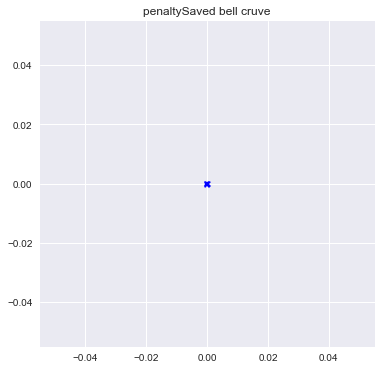

EdenHazard
4952    0.0
5040    0.0
5039    0.0
5034    0.0
5012    0.0
       ... 
4686    1.0
4962    2.0
4933    2.0
4959    2.0
4800    5.0
Name: shotsOn, Length: 111, dtype: float64
0.18018018018018017
0.6180206445456755


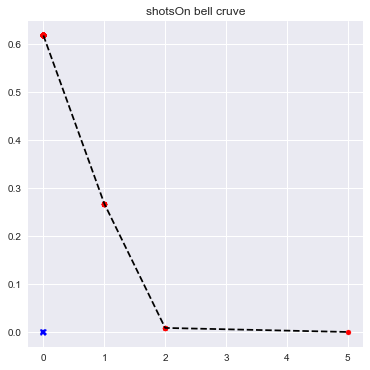

4838     0.0
4978     0.0
4988     0.0
4902     0.0
5119     0.0
        ... 
5161    16.0
5069    18.0
4814    20.0
4999    21.0
4800    26.0
Name: totalGoals, Length: 111, dtype: float64
4.261261261261262
5.1354828395006455


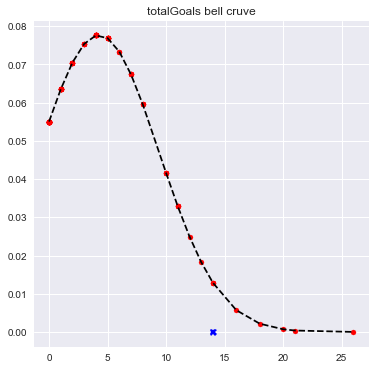

4686    0.0
5040    0.0
5039    0.0
5034    0.0
5020    0.0
       ... 
4838    0.0
4834    0.0
4819    0.0
4863    0.0
5174    0.0
Name: goalsConceded, Length: 111, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


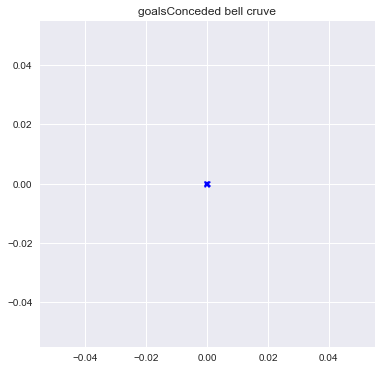

4952    0.0
5039    0.0
5034    0.0
5020    0.0
5017    0.0
       ... 
4996    1.0
4800    1.0
5146    1.0
5147    1.0
4686    1.0
Name: goalAssists, Length: 111, dtype: float64
0.04504504504504504
0.2074029627607448


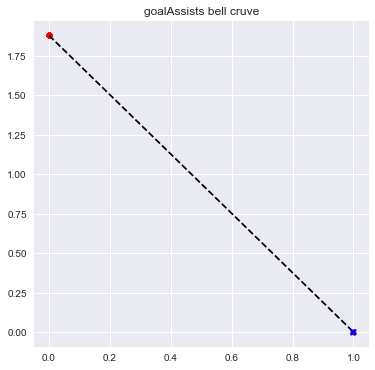

4686    0.0
5040    0.0
5039    0.0
5034    0.0
5020    0.0
       ... 
4838    0.0
4834    0.0
4819    0.0
4863    0.0
5174    0.0
Name: goalSaves, Length: 111, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


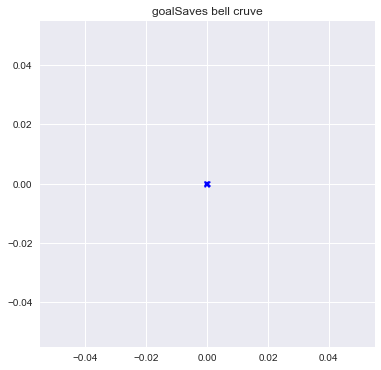

4952     0.0
5039     0.0
5012     0.0
4999     0.0
4988     0.0
        ... 
5034    30.0
5147    32.0
5125    41.0
4990    44.0
4800    77.0
Name: totalPasses, Length: 111, dtype: float64
4.5225225225225225
11.529708470757791


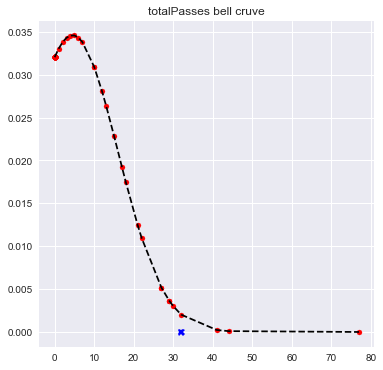

4952    0.0
5020    0.0
5012    0.0
4999    0.0
4988    0.0
       ... 
5110    3.0
4885    3.0
4800    3.0
4933    3.0
5125    4.0
Name: keyPasses, Length: 111, dtype: float64
0.2702702702702703
0.7586848025739569


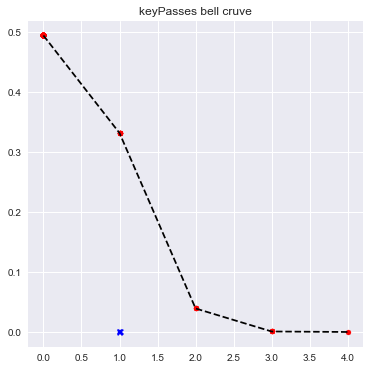

4952      0.0
5039      0.0
5012      0.0
4999      0.0
4988      0.0
        ...  
5110     98.0
4800     98.0
4963    100.0
4996    100.0
4959    100.0
Name: passAccuracy, Length: 111, dtype: float64
16.603603603603602
31.957257287200786


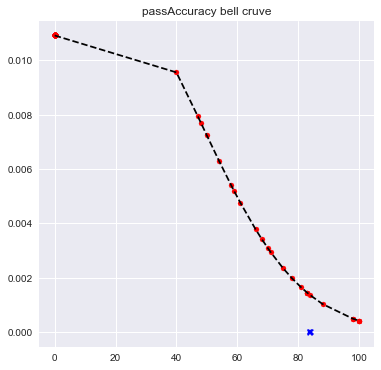

4686    0.0
5040    0.0
5039    0.0
5034    0.0
5020    0.0
       ... 
4838    0.0
4834    0.0
4819    0.0
4863    0.0
5174    0.0
Name: totalTackles, Length: 111, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


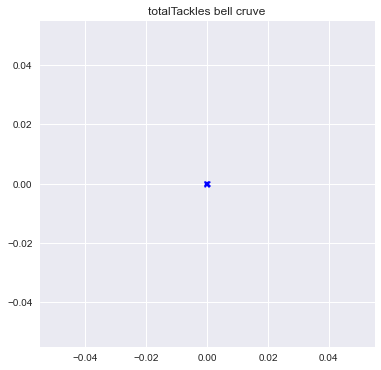

4686    0.0
5040    0.0
5039    0.0
5034    0.0
5020    0.0
       ... 
4838    0.0
4834    0.0
4819    0.0
4863    0.0
5174    0.0
Name: blocks, Length: 111, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


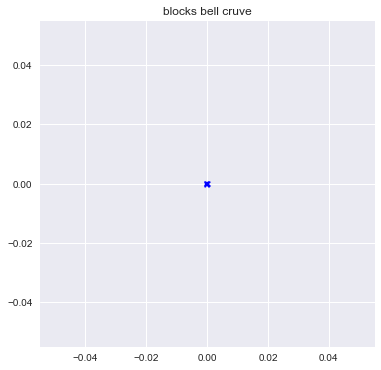

4686    0.0
5039    0.0
5034    0.0
5017    0.0
5012    0.0
       ... 
4964    1.0
5003    1.0
5020    1.0
4933    2.0
5147    2.0
Name: interceptions, Length: 111, dtype: float64
0.10810810810810811
0.36394612390493974


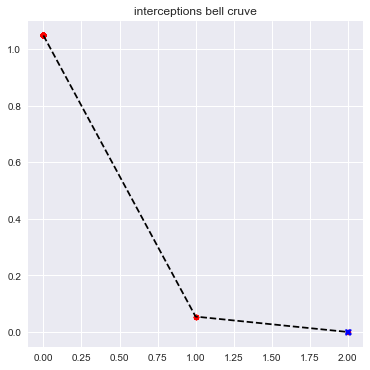

4952     0.0
5012     0.0
4999     0.0
4988     0.0
4985     0.0
        ... 
4800    21.0
4964    22.0
5017    24.0
4885    25.0
4990    39.0
Name: duelsTotal, Length: 111, dtype: float64
2.891891891891892
6.80004153584473


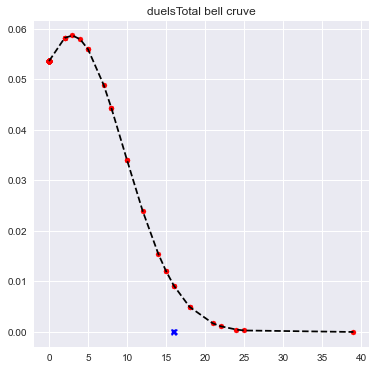

4952     0.0
5039     0.0
5012     0.0
4999     0.0
4988     0.0
        ... 
5146    10.0
5125    11.0
4686    11.0
4702    12.0
4990    15.0
Name: duelsWon, Length: 111, dtype: float64
1.3873873873873874
3.142762803509072


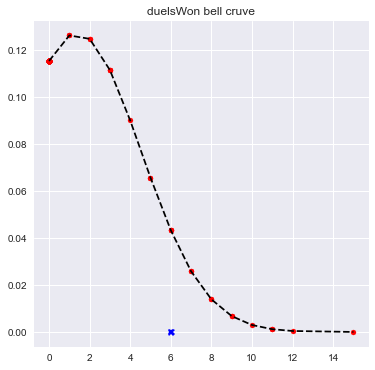

4686    0.0
5040    0.0
5039    0.0
5012    0.0
4999    0.0
       ... 
5125    5.0
4964    5.0
5017    6.0
4800    7.0
5003    8.0
Name: dribbleAttempts, Length: 111, dtype: float64
0.5405405405405406
1.493431768295647


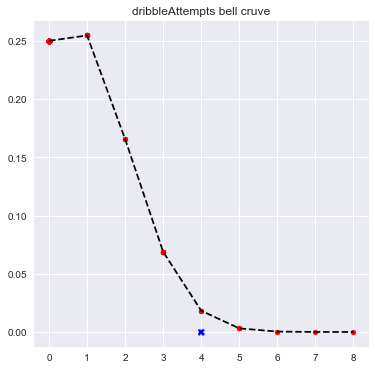

4686    0.0
5040    0.0
5039    0.0
5012    0.0
4999    0.0
       ... 
5009    3.0
4933    3.0
4800    4.0
5017    4.0
5003    6.0
Name: dribblesSuccess, Length: 111, dtype: float64
0.32432432432432434
0.969463138905557


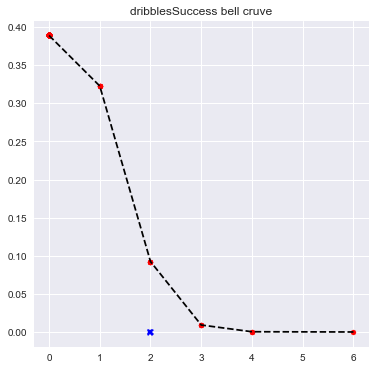

4686    0.0
5040    0.0
5039    0.0
5034    0.0
5020    0.0
       ... 
4838    0.0
4834    0.0
4819    0.0
4863    0.0
5174    0.0
Name: dribblesPast, Length: 111, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


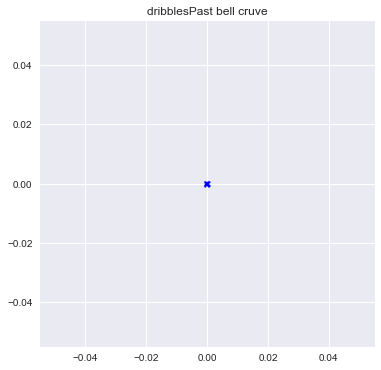

4686    0.0
5039    0.0
5012    0.0
5003    0.0
4999    0.0
       ... 
5146    2.0
5017    2.0
5147    3.0
5020    3.0
5125    5.0
Name: foulsDrawn, Length: 111, dtype: float64
0.26126126126126126
0.7558982689514606


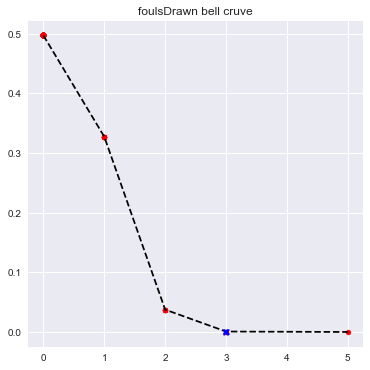

4952    0.0
5040    0.0
5039    0.0
5034    0.0
5012    0.0
       ... 
5125    3.0
4964    3.0
4962    3.0
4885    4.0
4990    6.0
Name: foulsCommitted, Length: 111, dtype: float64
0.3063063063063063
0.9083476017670252


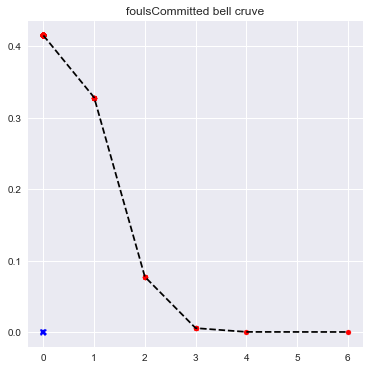

4838    0.0
5053    0.0
4834    0.0
4963    0.0
5044    0.0
       ... 
4710    7.0
4962    7.0
5049    8.0
4814    8.0
4839    8.0
Name: cardsYel, Length: 111, dtype: float64
2.009009009009009
2.1117240106643047


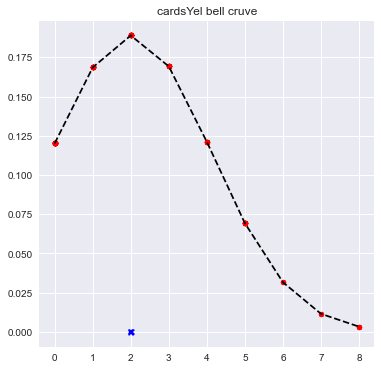

4952    0.0
5039    0.0
5034    0.0
5020    0.0
5017    0.0
       ... 
4862    0.0
5069    1.0
4919    1.0
4957    1.0
4686    1.0
Name: cardsYelRed, Length: 111, dtype: float64
0.036036036036036036
0.18637982761781263


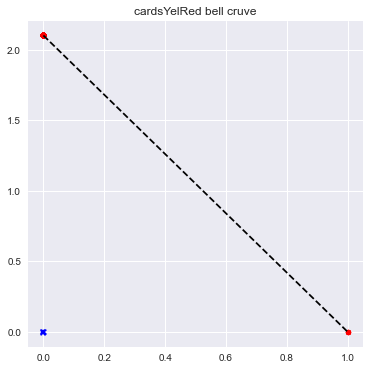

4686    0.0
5039    0.0
5034    0.0
5020    0.0
5017    0.0
       ... 
4862    0.0
5174    0.0
4990    1.0
4710    1.0
5146    1.0
Name: cardsRed, Length: 111, dtype: float64
0.02702702702702703
0.16216216216216217


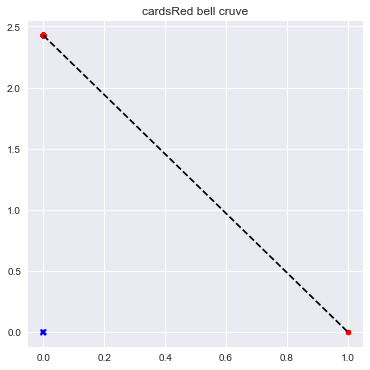

4686    0.0
5040    0.0
5039    0.0
5034    0.0
5020    0.0
       ... 
4819    0.0
4862    0.0
5174    0.0
5017    1.0
4959    1.0
Name: penaltyWon, Length: 111, dtype: float64
0.018018018018018018
0.13301642396606667


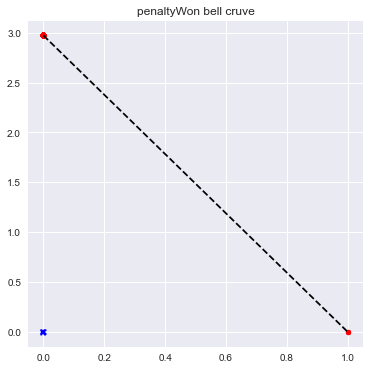

4686    0.0
5040    0.0
5039    0.0
5034    0.0
5020    0.0
       ... 
4838    0.0
4834    0.0
4819    0.0
4863    0.0
5174    0.0
Name: penaltyCommited, Length: 111, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


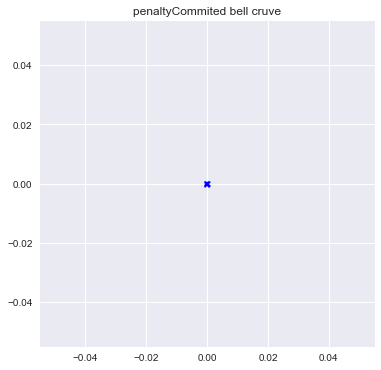

4952    0.0
5040    0.0
5039    0.0
5034    0.0
5020    0.0
       ... 
4838    0.0
4834    0.0
4819    0.0
4863    0.0
4686    1.0
Name: penaltyScored, Length: 111, dtype: float64
0.009009009009009009
0.09448728361893258


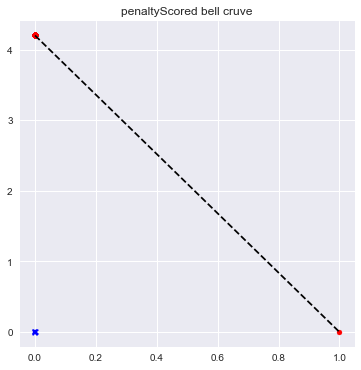

4686    0.0
5040    0.0
5039    0.0
5034    0.0
5020    0.0
       ... 
4838    0.0
4834    0.0
4819    0.0
4863    0.0
5174    0.0
Name: penaltyMissed, Length: 111, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


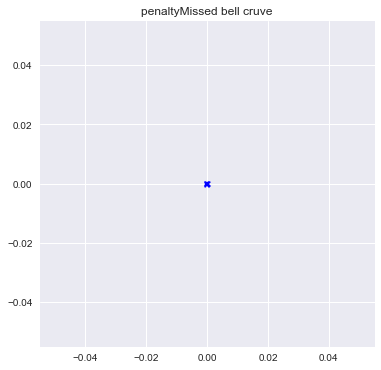

4686    0.0
5040    0.0
5039    0.0
5034    0.0
5020    0.0
       ... 
4838    0.0
4834    0.0
4819    0.0
4863    0.0
5174    0.0
Name: penaltySaved, Length: 111, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


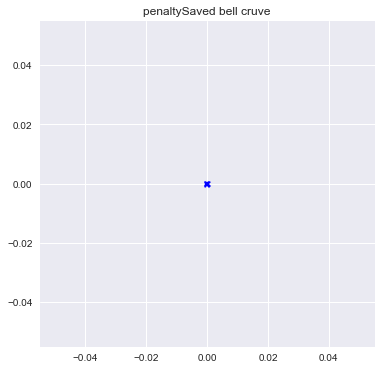

RiyadMahrez
5308     0.0
5440     0.0
5661     0.0
5449     0.0
5355     0.0
        ... 
5615    48.0
5352    48.0
5284    52.0
5464    53.0
5574    74.0
Name: shotsOn, Length: 125, dtype: float64
12.248
13.547933274119712


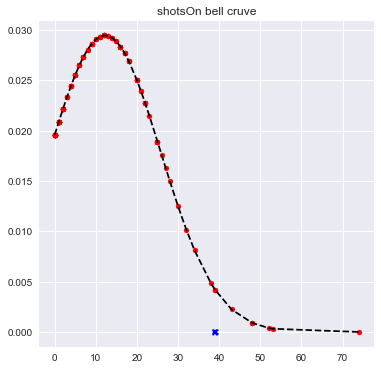

5733     0.0
5341     0.0
5662     0.0
5356     0.0
5359     0.0
        ... 
5592    17.0
5352    18.0
5464    24.0
5284    24.0
5574    25.0
Name: totalGoals, Length: 125, dtype: float64
4.36
5.3312662660947625


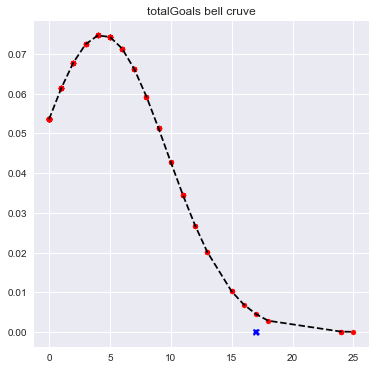

5201    0.0
5610    0.0
5606    0.0
5599    0.0
5595    0.0
       ... 
5369    0.0
5359    0.0
5356    0.0
5428    0.0
5733    0.0
Name: goalsConceded, Length: 125, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


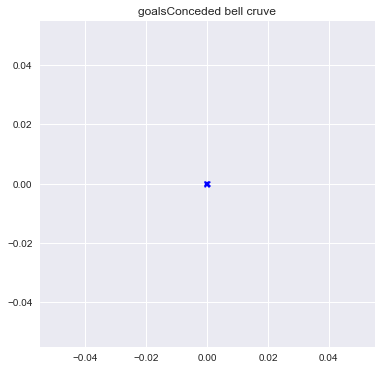

5201     0.0
5427     0.0
5438     0.0
5440     0.0
5441     0.0
        ... 
5712     7.0
5389     7.0
5428     8.0
5592    11.0
5541    12.0
Name: goalAssists, Length: 125, dtype: float64
1.648
2.2777392300261243


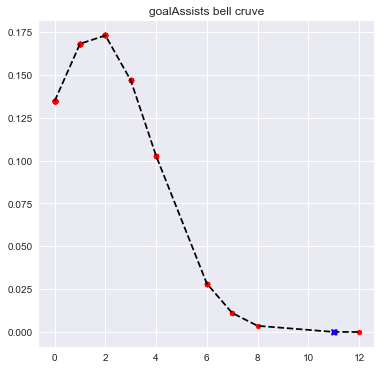

5201    0.0
5610    0.0
5606    0.0
5599    0.0
5595    0.0
       ... 
5369    0.0
5359    0.0
5356    0.0
5428    0.0
5733    0.0
Name: goalSaves, Length: 125, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


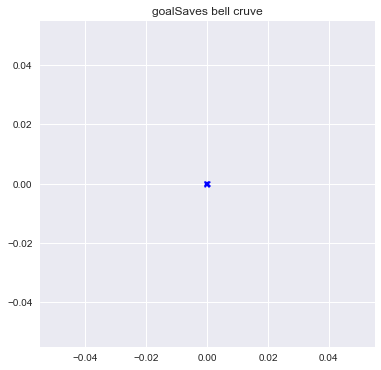

5249       0.0
5661       0.0
5221       0.0
5236       0.0
5440       2.0
         ...  
5560     952.0
5712     958.0
5426    1246.0
5595    1293.0
5528    1304.0
Name: totalPasses, Length: 125, dtype: float64
301.432
305.1963914858758


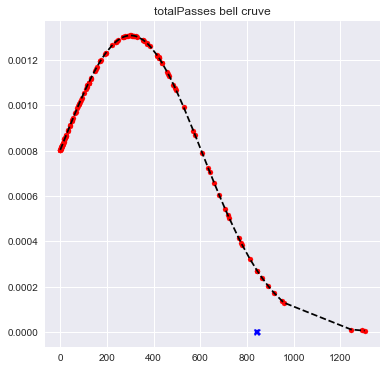

5334     0.0
5551     0.0
5355     0.0
5343     0.0
5632     0.0
        ... 
5426    64.0
5528    67.0
5592    69.0
5541    75.0
5595    83.0
Name: keyPasses, Length: 125, dtype: float64
16.208
18.081281370522387


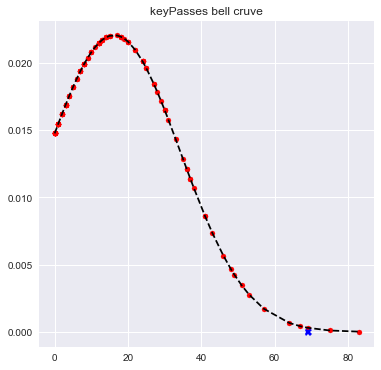

5661     0.0
5221     0.0
5236     0.0
5249     0.0
5720     3.0
        ... 
5697    89.0
5294    91.0
5662    92.0
5529    92.0
5341    97.0
Name: passAccuracy, Length: 125, dtype: float64
50.872
21.048126187383048


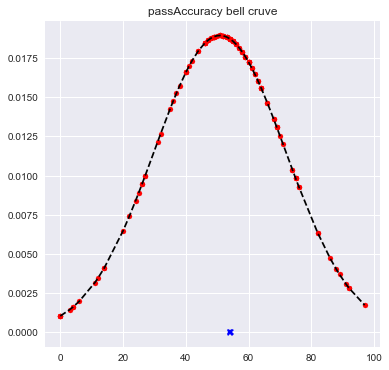

5334     0.0
5517     0.0
5544     0.0
5355     0.0
5729     0.0
        ... 
5599    53.0
5621    54.0
5560    55.0
5468    56.0
5389    67.0
Name: totalTackles, Length: 125, dtype: float64
14.28
15.222404540676221


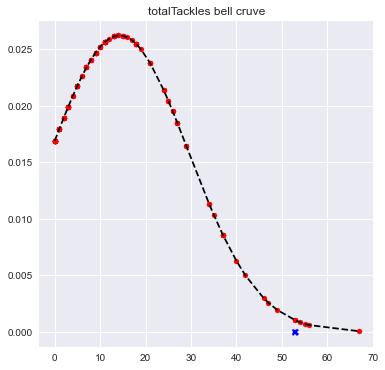

5733    0.0
5530    0.0
5650    0.0
5399    0.0
5639    0.0
       ... 
5246    6.0
5666    6.0
5624    6.0
5702    7.0
5574    9.0
Name: blocks, Length: 125, dtype: float64
1.192
1.7236983494799771


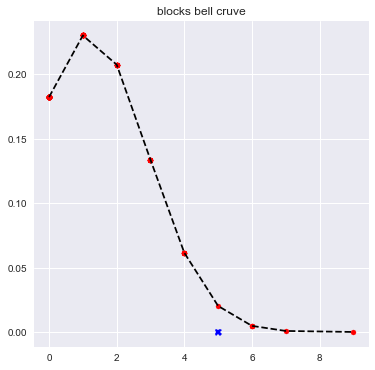

5489     0.0
5356     0.0
5566     0.0
5343     0.0
5341     0.0
        ... 
5599    28.0
5468    28.0
5621    35.0
5592    38.0
5478    57.0
Name: interceptions, Length: 125, dtype: float64
7.336
9.301134554450874


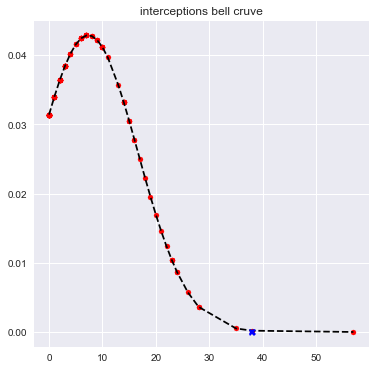

5249      0.0
5221      0.0
5236      0.0
5661      0.0
5632      1.0
        ...  
5574    537.0
5612    543.0
5525    553.0
5592    644.0
5712    698.0
Name: duelsTotal, Length: 125, dtype: float64
184.672
170.90950943701174


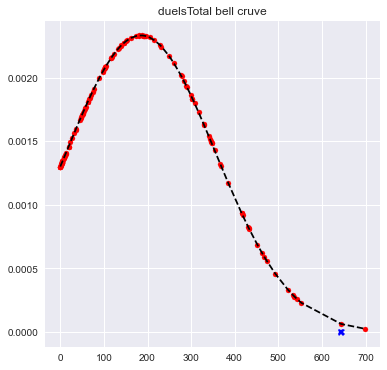

5661      0.0
5221      0.0
5236      0.0
5440      0.0
5249      0.0
        ...  
5426    235.0
5648    239.0
5612    272.0
5592    302.0
5712    338.0
Name: duelsWon, Length: 125, dtype: float64
77.944
75.80177348848774


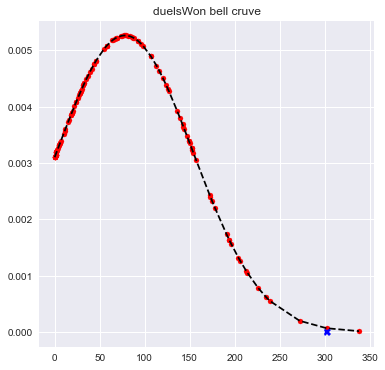

5632      0.0
5720      0.0
5334      0.0
5440      0.0
5221      0.0
        ...  
5426    165.0
5629    170.0
5525    182.0
5592    232.0
5612    244.0
Name: dribbleAttempts, Length: 125, dtype: float64
38.632
48.861360766970044


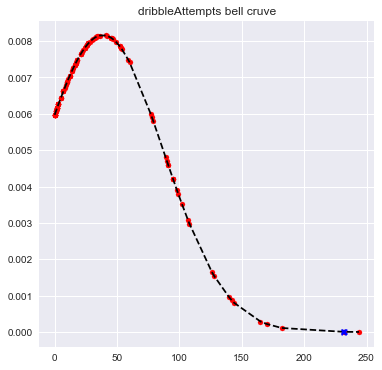

5440      0.0
5632      0.0
5308      0.0
5355      0.0
5661      0.0
        ...  
5525     84.0
5528     89.0
5426    101.0
5612    127.0
5592    131.0
Name: dribblesSuccess, Length: 125, dtype: float64
19.768
26.237419385297777


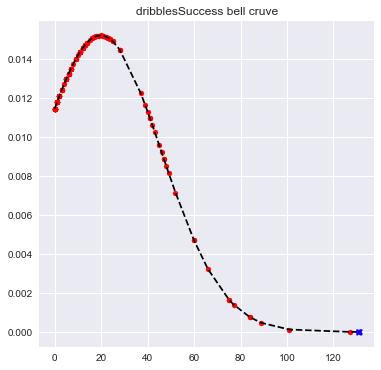

5201    0.0
5610    0.0
5606    0.0
5599    0.0
5595    0.0
       ... 
5369    0.0
5359    0.0
5356    0.0
5428    0.0
5733    0.0
Name: dribblesPast, Length: 125, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


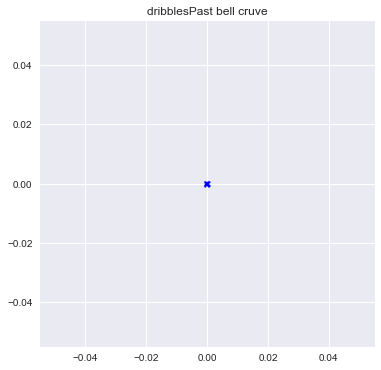

5661     0.0
5440     0.0
5729     0.0
5399     0.0
5558     0.0
        ... 
5621    69.0
5528    70.0
5560    78.0
5592    83.0
5612    90.0
Name: foulsDrawn, Length: 125, dtype: float64
19.488
20.458588807637735


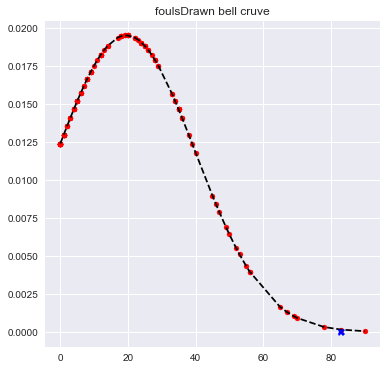

5661     0.0
5729     0.0
5502     0.0
5355     0.0
5479     0.0
        ... 
5615    47.0
5629    48.0
5599    49.0
5666    50.0
5712    50.0
Name: foulsCommitted, Length: 125, dtype: float64
15.584
14.446693185639406


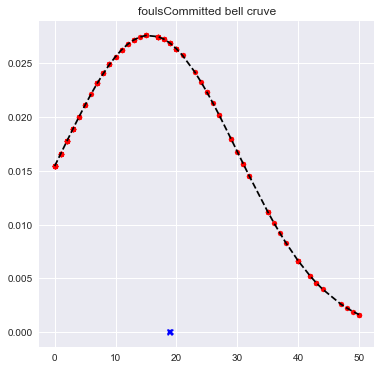

5355    0.0
5639    0.0
5729    0.0
5356    0.0
5632    0.0
       ... 
5464    6.0
5629    6.0
5492    6.0
5712    6.0
5283    8.0
Name: cardsYel, Length: 125, dtype: float64
1.352
1.717002038437928


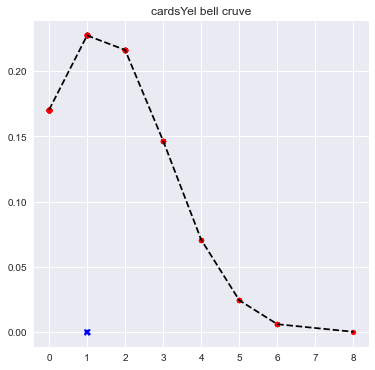

5201    0.0
5610    0.0
5606    0.0
5599    0.0
5595    0.0
       ... 
5492    0.0
5497    0.0
5438    1.0
5464    1.0
5621    1.0
Name: cardsYelRed, Length: 125, dtype: float64
0.024
0.15304901175767194


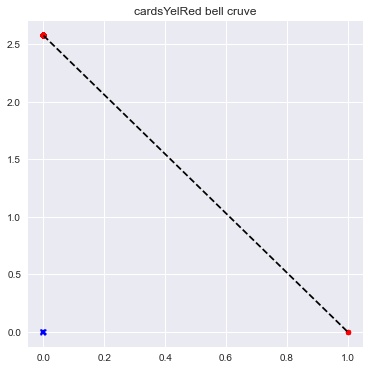

5201    0.0
5599    0.0
5595    0.0
5592    0.0
5590    0.0
       ... 
5733    0.0
5371    1.0
5629    1.0
5621    1.0
5666    2.0
Name: cardsRed, Length: 125, dtype: float64
0.04
0.233238075793812


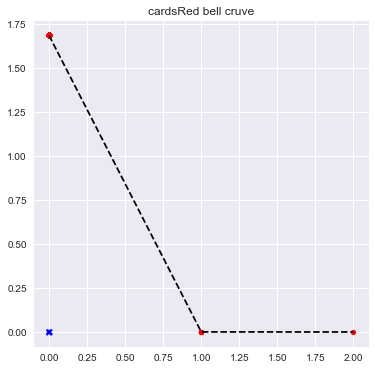

5201    0.0
5581    0.0
5580    0.0
5564    0.0
5558    0.0
       ... 
5599    1.0
5615    2.0
5610    2.0
5464    3.0
5560    3.0
Name: penaltyWon, Length: 125, dtype: float64
0.248
0.5607994293863003


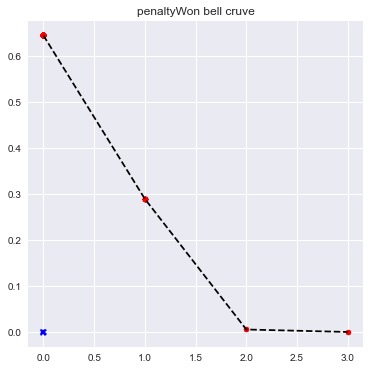

5201    0.0
5606    0.0
5599    0.0
5595    0.0
5592    0.0
       ... 
5733    0.0
5478    1.0
5702    1.0
5673    1.0
5580    1.0
Name: penaltyCommited, Length: 125, dtype: float64
0.032
0.176


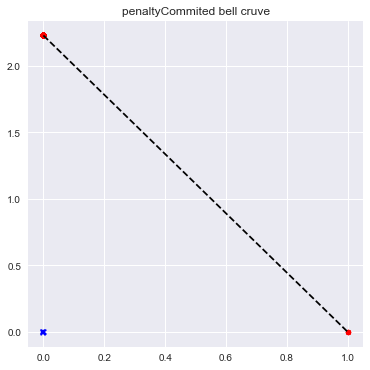

5201    0.0
5590    0.0
5581    0.0
5580    0.0
5560    0.0
       ... 
5284    4.0
5592    4.0
5574    5.0
5464    5.0
5712    6.0
Name: penaltyScored, Length: 125, dtype: float64
0.352
1.0296096347645547


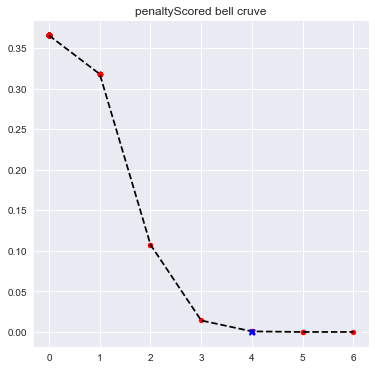

5505    0.0
5599    0.0
5595    0.0
5590    0.0
5581    0.0
       ... 
5621    1.0
5352    1.0
5201    1.0
5655    2.0
5592    2.0
Name: penaltyMissed, Length: 125, dtype: float64
0.088
0.33504626546195077


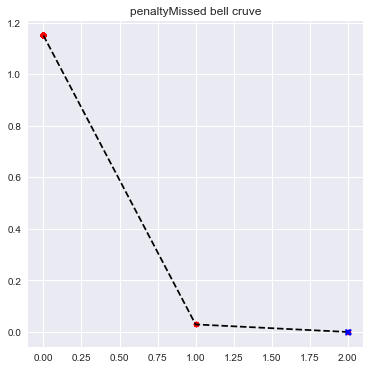

5201    0.0
5610    0.0
5606    0.0
5599    0.0
5595    0.0
       ... 
5369    0.0
5359    0.0
5356    0.0
5428    0.0
5733    0.0
Name: penaltySaved, Length: 125, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


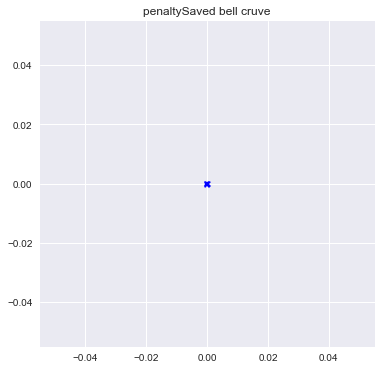

NGoloKanté
6.711229946524064
8.671178647043478


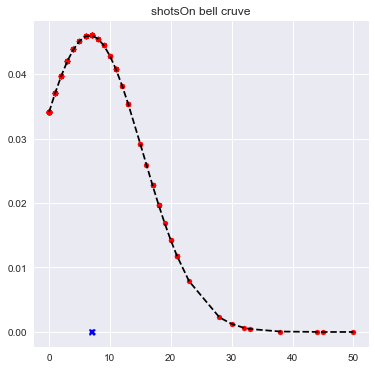

1.732620320855615
2.6974250110185363


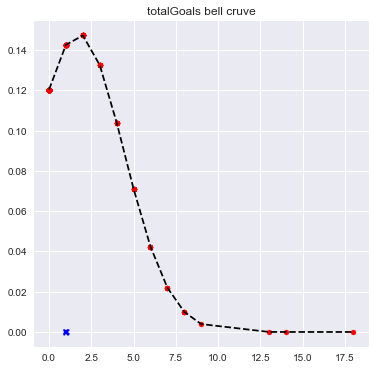

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


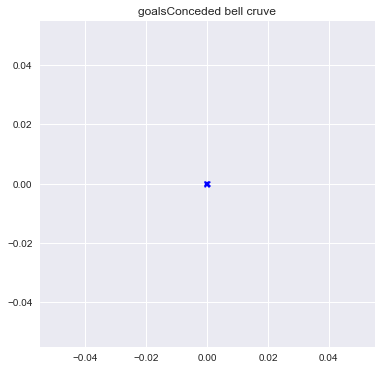

1.8770053475935828
2.807715804244538


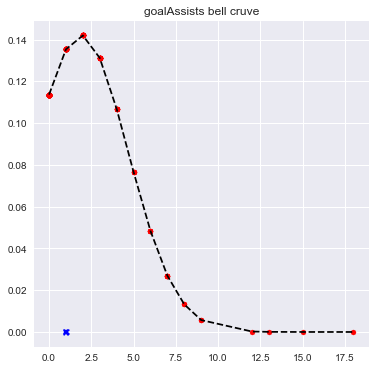

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


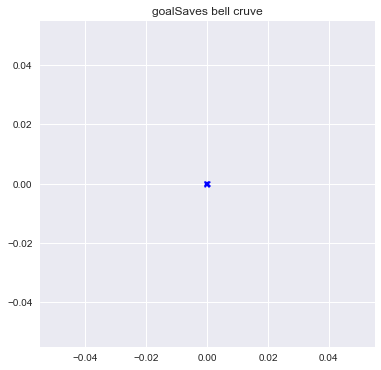

611.3048128342245
535.4152250719704


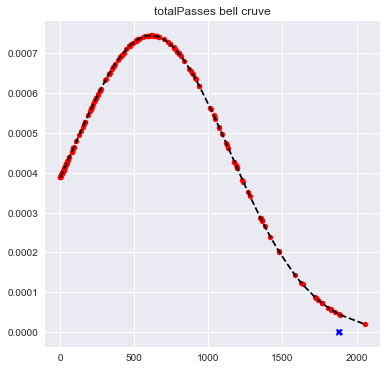

19.834224598930483
21.522760115941885


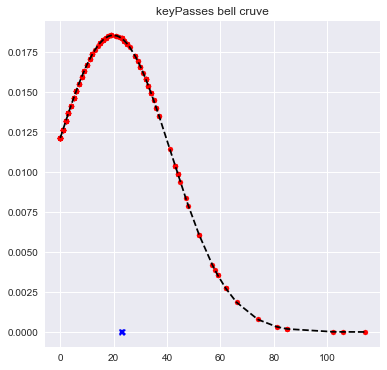

76.04812834224599
14.807962673135794


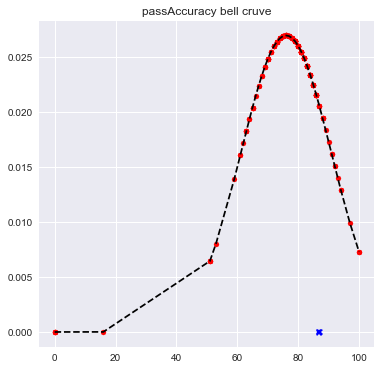

30.946524064171122
28.499128914414857


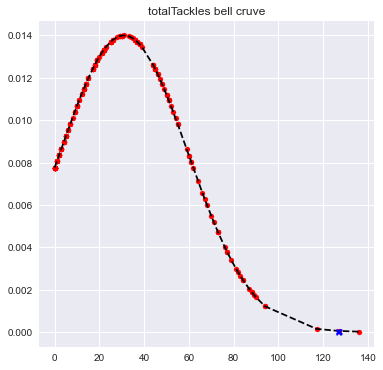

3.518716577540107
4.35379513099392


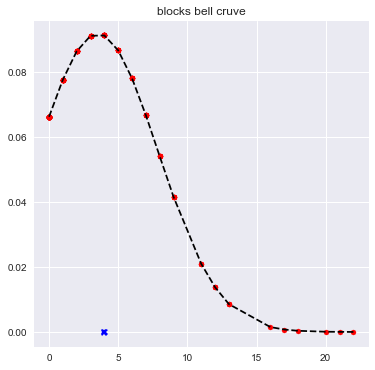

20.60427807486631
19.50685010321791


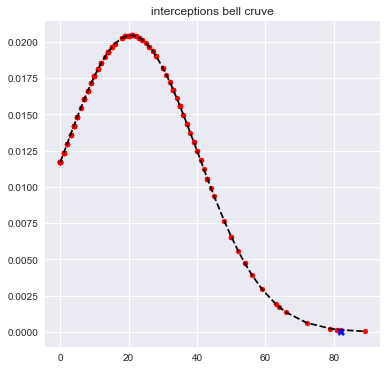

170.8342245989305
130.17104874080528


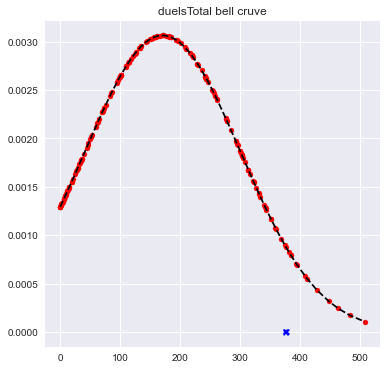

82.29411764705883
65.51657436252341


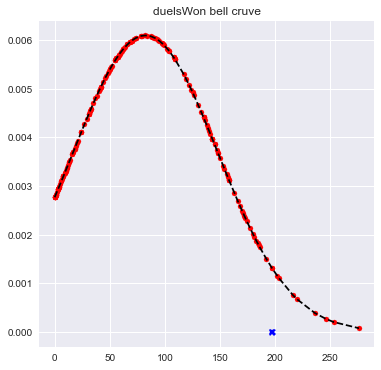

28.36898395721925
30.796515195156708


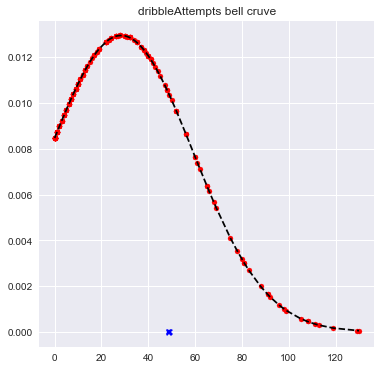

17.90909090909091
19.073100937903554


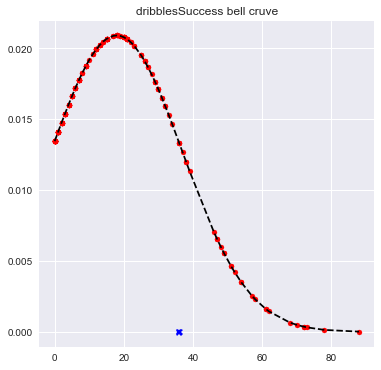

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


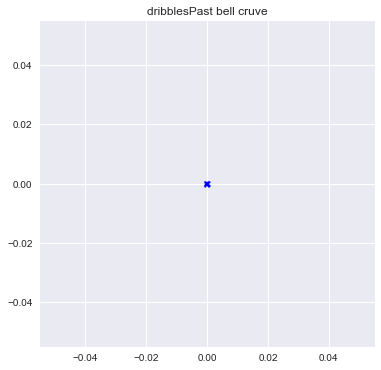

17.919786096256683
15.610533395608925


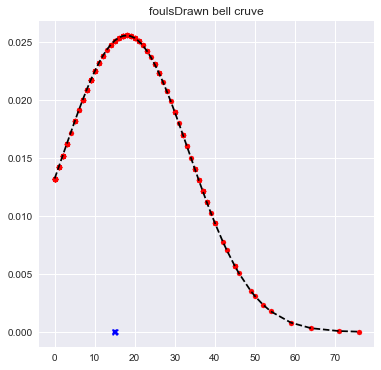

19.13368983957219
16.667182162903064


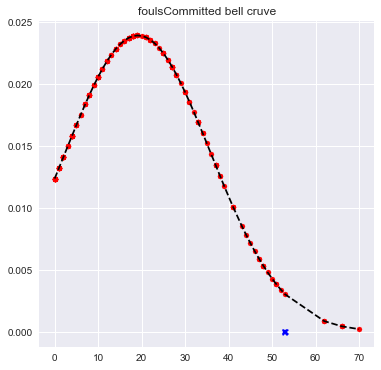

3.122994652406417
2.9160913725429722


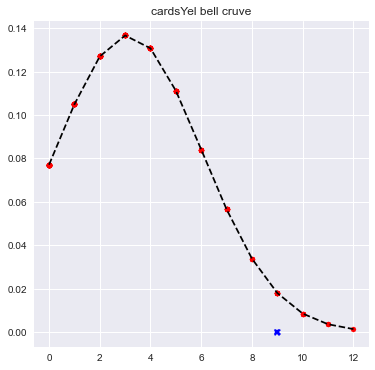

0.03208556149732621
0.17622734816346614


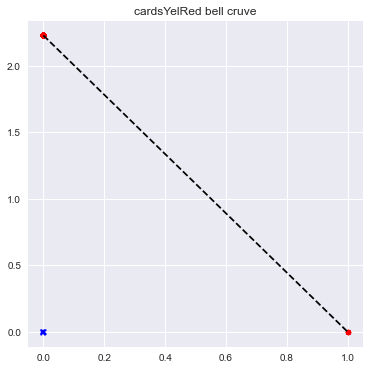

0.06951871657754011
0.2933875235154054


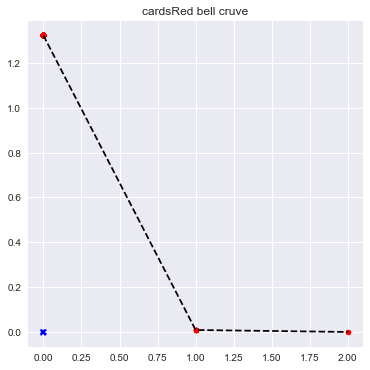

0.16042780748663102
0.581291047773313


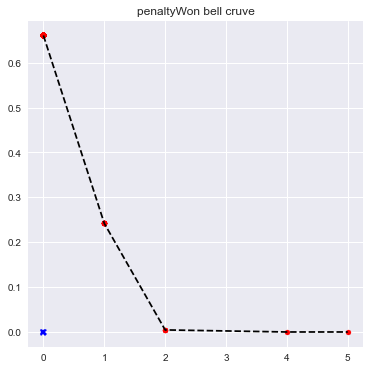

0.1497326203208556
0.4375887175503484


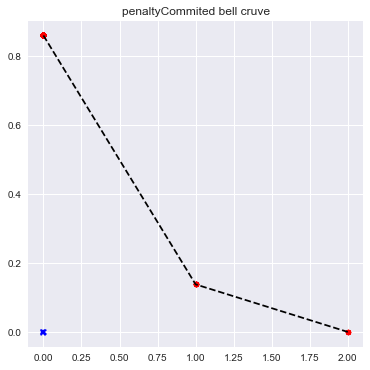

0.13368983957219252
0.6526693605301543


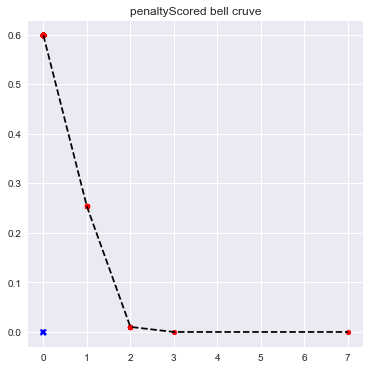

0.03208556149732621
0.17622734816346614


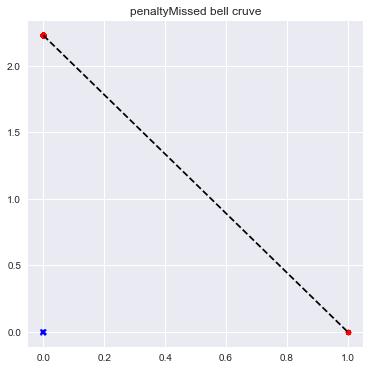

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


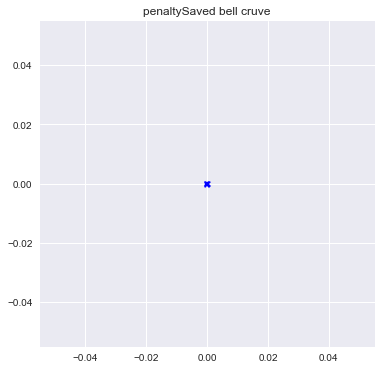

MohamedSalahGhaly
6698     0.0
6429     0.0
6701     0.0
6663     0.0
6660     0.0
        ... 
6530    38.0
6300    42.0
6450    43.0
6533    67.0
6564    76.0
Name: shotsOn, Length: 118, dtype: float64
13.322033898305085
13.73963791737416


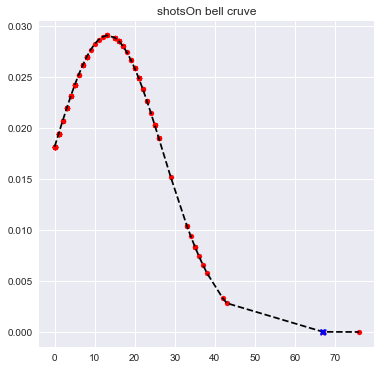

6405     0.0
6366     0.0
6372     0.0
6380     0.0
6699     0.0
        ... 
6520    18.0
6731    20.0
6300    21.0
6564    30.0
6533    32.0
Name: totalGoals, Length: 118, dtype: float64
4.635593220338983
5.8202819755754325


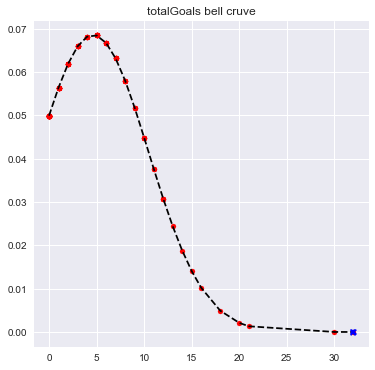

6261    0.0
6654    0.0
6652    0.0
6650    0.0
6649    0.0
       ... 
6419    0.0
6413    0.0
6412    0.0
6441    0.0
6761    0.0
Name: goalsConceded, Length: 118, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


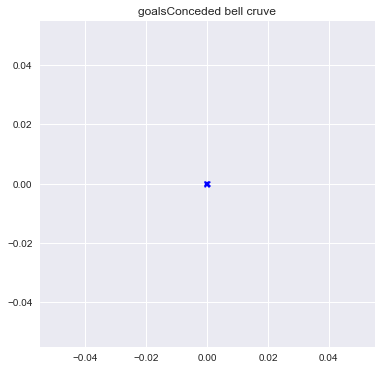

6429     0.0
6426     0.0
6602     0.0
6431     0.0
6440     0.0
        ... 
6531     7.0
6533    10.0
6515    10.0
6520    11.0
6436    15.0
Name: goalAssists, Length: 118, dtype: float64
1.9576271186440677
2.694608766283592


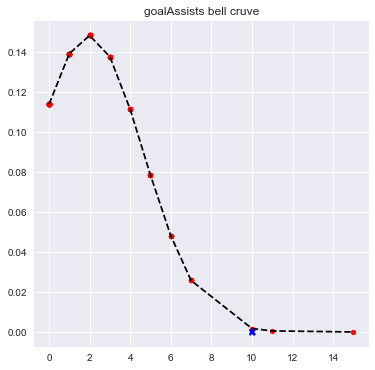

6261    0.0
6654    0.0
6652    0.0
6650    0.0
6649    0.0
       ... 
6419    0.0
6413    0.0
6412    0.0
6441    0.0
6761    0.0
Name: goalSaves, Length: 118, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


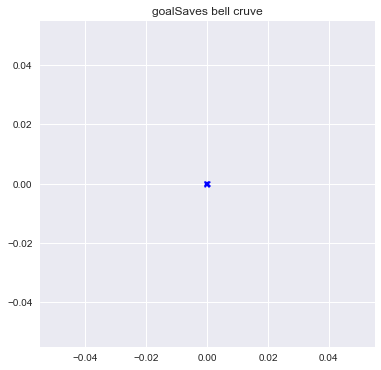

6658       1.0
6532       1.0
6660       3.0
6279       4.0
6701       4.0
         ...  
6436     919.0
6520     983.0
6493     985.0
6515    1013.0
6406    1144.0
Name: totalPasses, Length: 118, dtype: float64
266.41525423728814
263.4021004984001


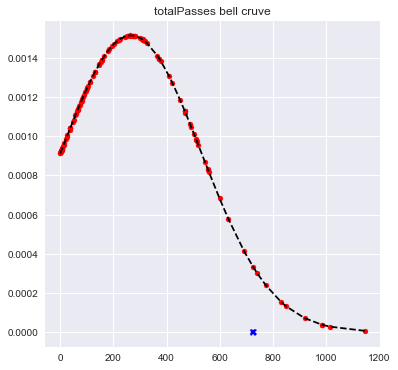

6532     0.0
6650     0.0
6701     0.0
6660     0.0
6429     0.0
        ... 
6436    60.0
6705    60.0
6313    62.0
6533    63.0
6406    84.0
Name: keyPasses, Length: 118, dtype: float64
16.449152542372882
17.9314123852326


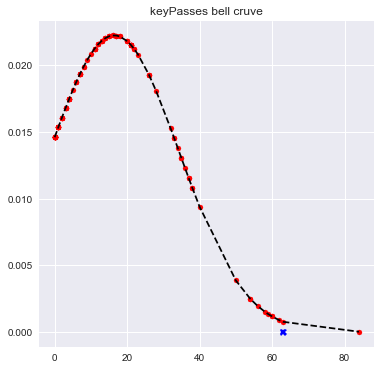

6660     25.0
6701     28.0
6697     41.0
6279     44.0
6532     50.0
        ...  
6615     88.0
6359     93.0
6431    100.0
6429    100.0
6658    100.0
Name: passAccuracy, Length: 118, dtype: float64
69.27966101694915
12.142435458677205


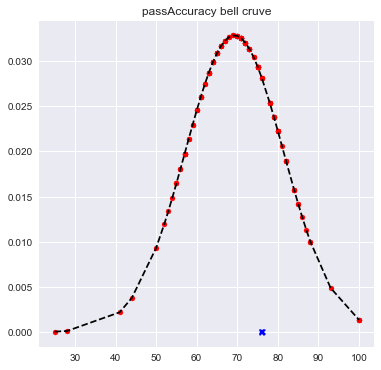

6319     0.0
6456     0.0
6429     0.0
6663     0.0
6660     0.0
        ... 
6705    45.0
6341    48.0
6471    64.0
6530    65.0
6476    82.0
Name: totalTackles, Length: 118, dtype: float64
12.40677966101695
14.304934130462623


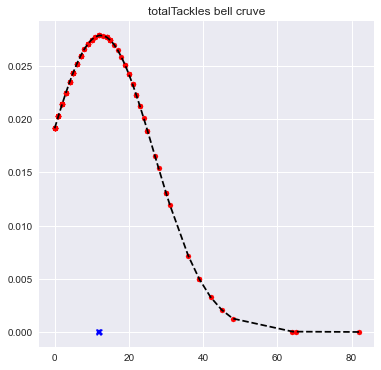

6761    0.0
6427    0.0
6429    0.0
6431    0.0
6690    0.0
       ... 
6645    4.0
6564    4.0
6665    4.0
6471    5.0
6595    5.0
Name: blocks, Length: 118, dtype: float64
1.0169491525423728
1.3465779027824543


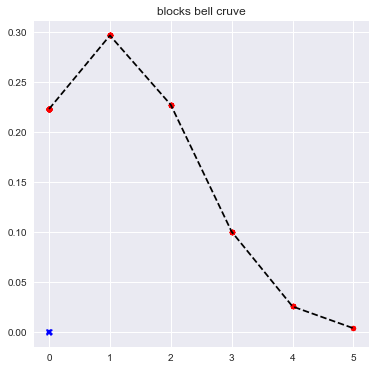

6405     0.0
6412     0.0
6615     0.0
6701     0.0
6429     0.0
        ... 
6705    19.0
6434    23.0
6476    24.0
6471    24.0
6732    24.0
Name: interceptions, Length: 118, dtype: float64
4.983050847457627
5.941784031079455


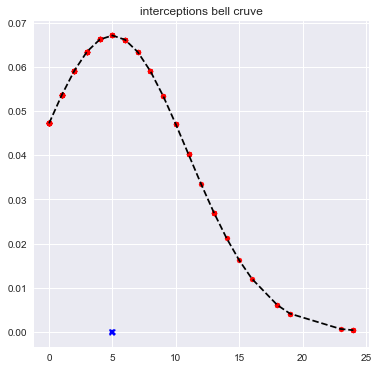

6358      0.0
6663      0.0
6532      1.0
6658      1.0
6431      1.0
        ...  
6628    534.0
6472    568.0
6476    666.0
6495    674.0
6471    681.0
Name: duelsTotal, Length: 118, dtype: float64
197.6271186440678
175.978224606812


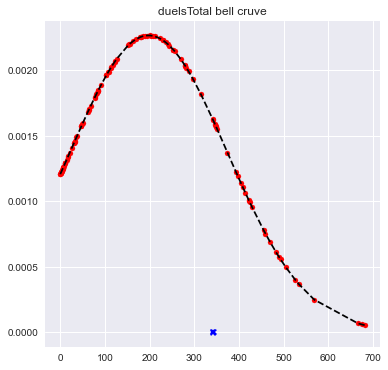

6532      0.0
6358      0.0
6658      0.0
6701      0.0
6663      0.0
        ...  
6406    261.0
6495    277.0
6472    289.0
6476    292.0
6471    325.0
Name: duelsWon, Length: 118, dtype: float64
85.0
79.49128509956083


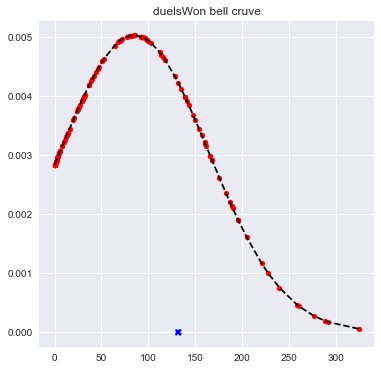

6664      0.0
6663      0.0
6429      0.0
6279      0.0
6431      0.0
        ...  
6436    132.0
6628    145.0
6515    157.0
6475    196.0
6406    200.0
Name: dribbleAttempts, Length: 118, dtype: float64
34.67796610169491
42.310370839890076


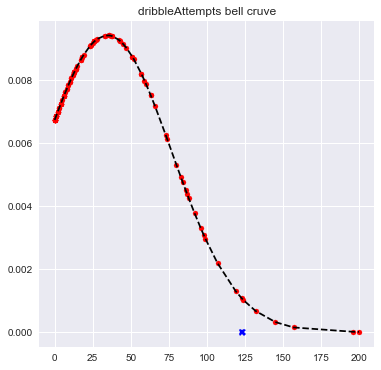

6701      0.0
6427      0.0
6361      0.0
6358      0.0
6429      0.0
        ...  
6533     78.0
6515     80.0
6436     85.0
6475    118.0
6406    165.0
Name: dribblesSuccess, Length: 118, dtype: float64
20.25423728813559
26.46301750754648


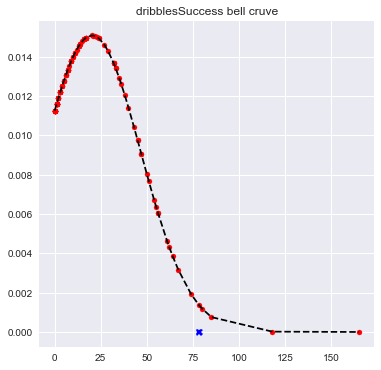

6261    0.0
6654    0.0
6652    0.0
6650    0.0
6649    0.0
       ... 
6419    0.0
6413    0.0
6412    0.0
6441    0.0
6761    0.0
Name: dribblesPast, Length: 118, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


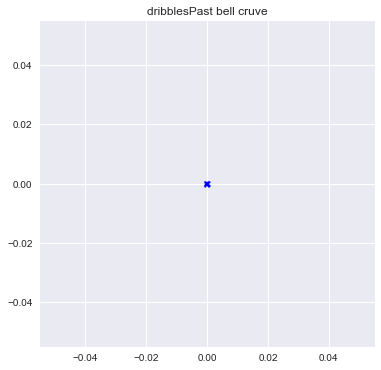

6698     0.0
6361     0.0
6358     0.0
6532     0.0
6701     0.0
        ... 
6595    71.0
6475    76.0
6406    82.0
6476    87.0
6471    95.0
Name: foulsDrawn, Length: 118, dtype: float64
19.06779661016949
20.654842586273016


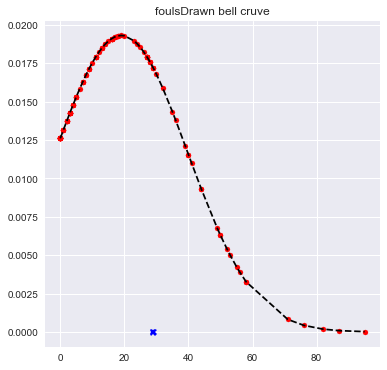

6440     0.0
6557     0.0
6456     0.0
6279     0.0
6532     0.0
        ... 
6472    48.0
6595    53.0
6530    57.0
6262    60.0
6476    63.0
Name: foulsCommitted, Length: 118, dtype: float64
16.559322033898304
15.661429666584688


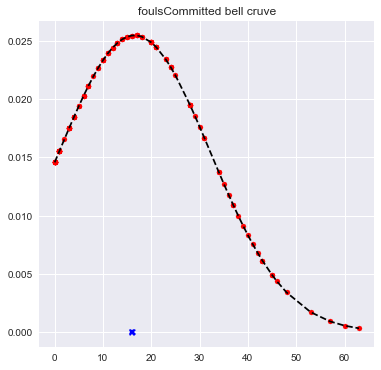

6427     0.0
6422     0.0
6426     0.0
6603     0.0
6429     0.0
        ... 
6519     6.0
6626     6.0
6665     7.0
6262     9.0
6595    10.0
Name: cardsYel, Length: 118, dtype: float64
1.652542372881356
2.0393465164866496


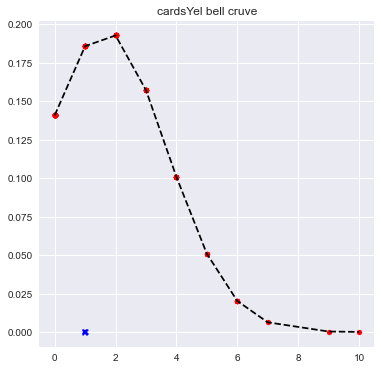

6261    0.0
6655    0.0
6654    0.0
6652    0.0
6650    0.0
       ... 
6412    0.0
6440    0.0
6761    0.0
6626    1.0
6520    1.0
Name: cardsYelRed, Length: 118, dtype: float64
0.01694915254237288
0.12908090009938827


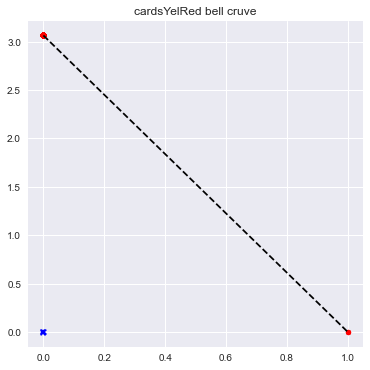

6261    0.0
6652    0.0
6650    0.0
6649    0.0
6645    0.0
       ... 
6531    1.0
6476    1.0
6330    1.0
6655    1.0
6693    1.0
Name: cardsRed, Length: 118, dtype: float64
0.0423728813559322
0.20143837837296122


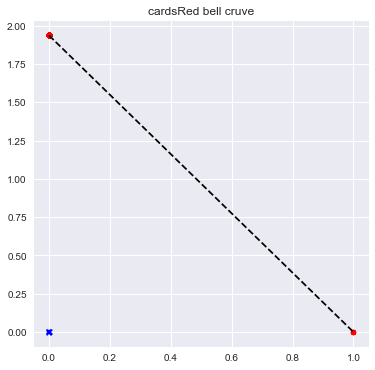

6261    0.0
6650    0.0
6649    0.0
6645    0.0
6633    0.0
       ... 
6731    3.0
6262    3.0
6480    4.0
6475    4.0
6520    6.0
Name: penaltyWon, Length: 118, dtype: float64
0.3813559322033898
0.9198331787351971


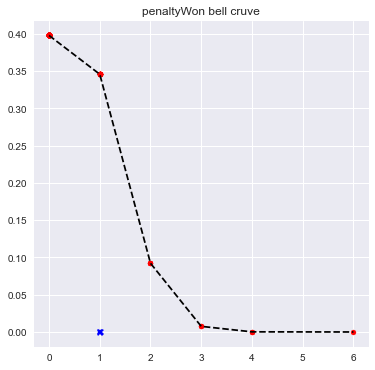

6261    0.0
6654    0.0
6652    0.0
6650    0.0
6649    0.0
       ... 
6413    0.0
6412    0.0
6441    0.0
6761    0.0
6520    1.0
Name: penaltyCommited, Length: 118, dtype: float64
0.00847457627118644
0.09166655785077939


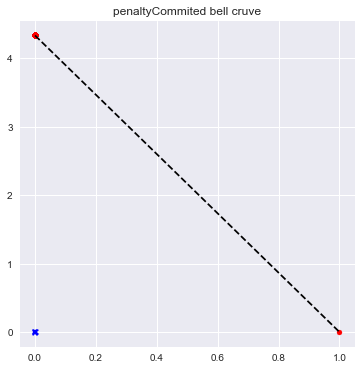

6261    0.0
6649    0.0
6645    0.0
6633    0.0
6626    0.0
       ... 
6406    2.0
6655    3.0
6300    4.0
6262    4.0
6731    5.0
Name: penaltyScored, Length: 118, dtype: float64
0.3135593220338983
0.8406933432163919


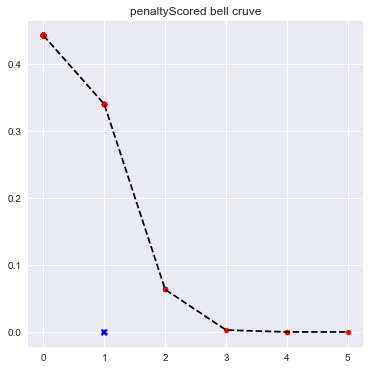

6261    0.0
6652    0.0
6650    0.0
6649    0.0
6645    0.0
       ... 
6564    1.0
6472    1.0
6519    2.0
6262    2.0
6655    2.0
Name: penaltyMissed, Length: 118, dtype: float64
0.11864406779661017
0.3942272321902714


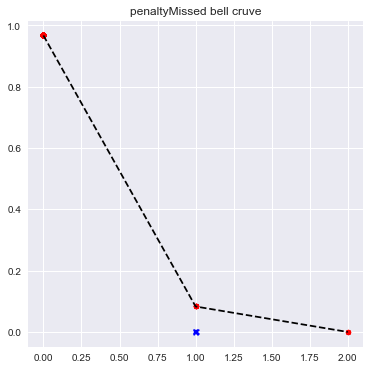

6261    0.0
6654    0.0
6652    0.0
6650    0.0
6649    0.0
       ... 
6419    0.0
6413    0.0
6412    0.0
6441    0.0
6761    0.0
Name: penaltySaved, Length: 118, dtype: float64
0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


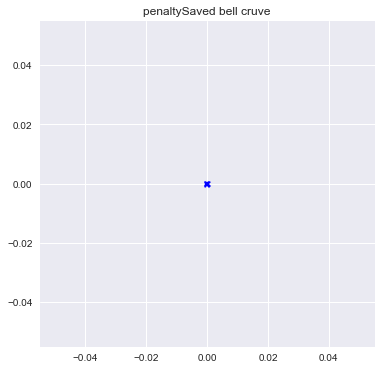

VirgilvanDijk
2.9058823529411764
3.3435575608369232


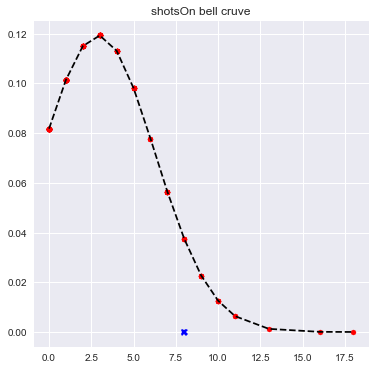

0.7588235294117647
1.1659678249669372


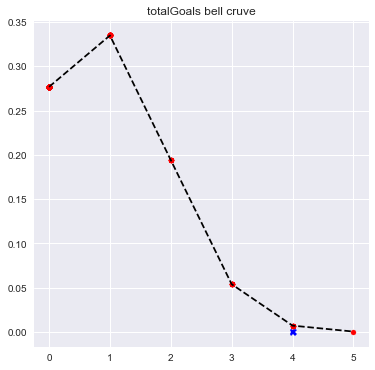

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


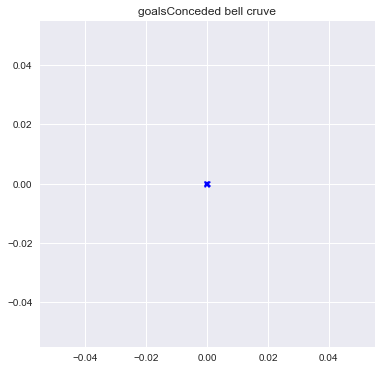

1.0470588235294118
1.7583808217183363


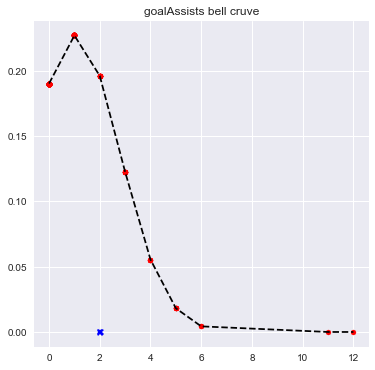

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


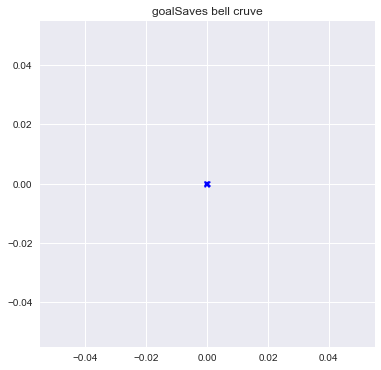

684.9176470588235
553.6864946831046


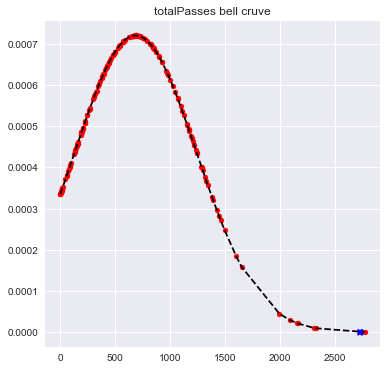

9.852941176470589
11.83447693354706


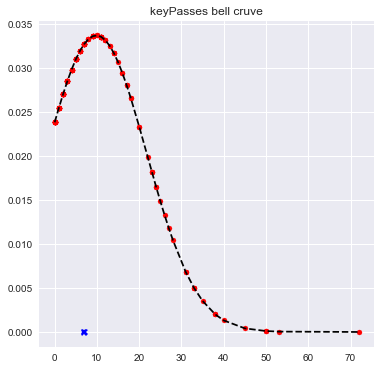

74.27058823529411
12.21897101212519


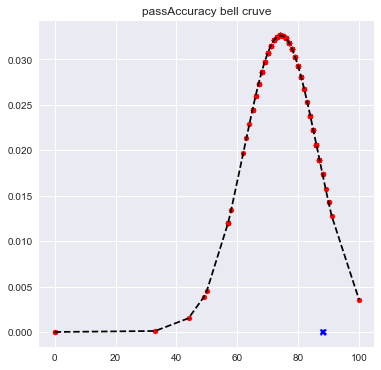

33.252941176470586
23.89931373976739


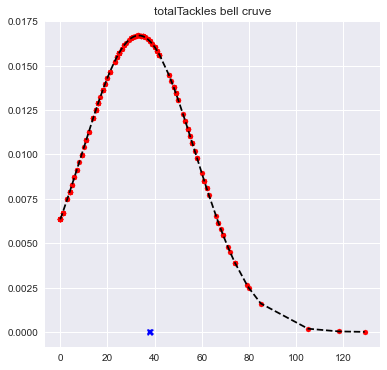

10.211764705882352
10.240742295759913


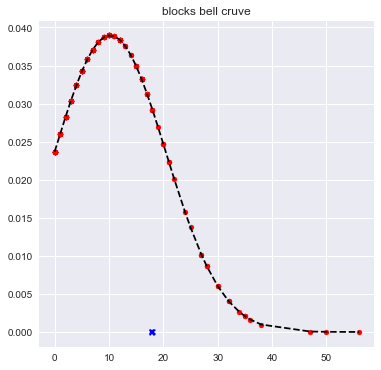

27.064705882352943
19.765133923936407


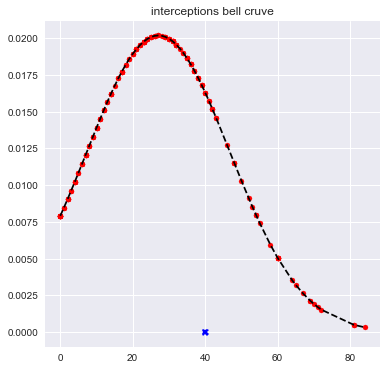

168.59411764705882
117.96996113462022


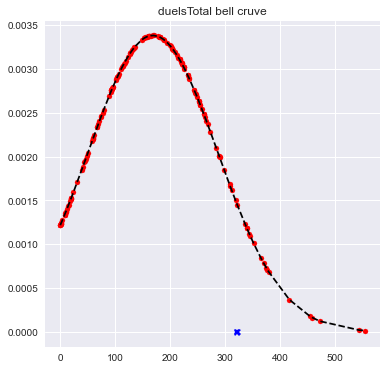

97.5
69.73649985312359


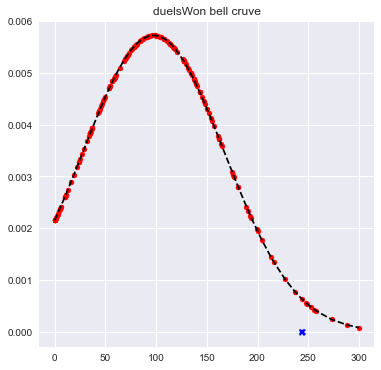

13.782352941176471
17.997213355998056


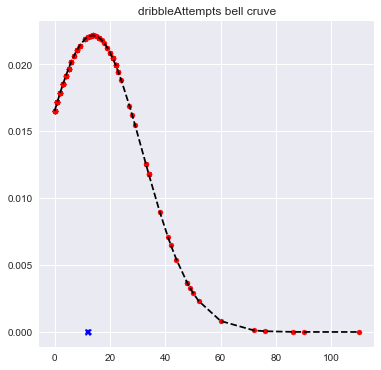

8.24705882352941
10.5299638369894


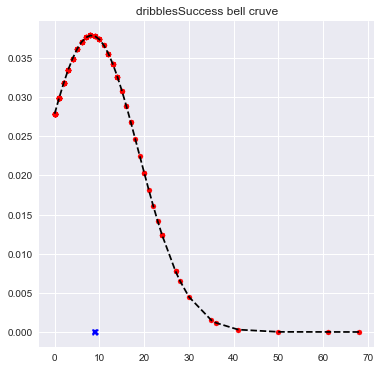

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


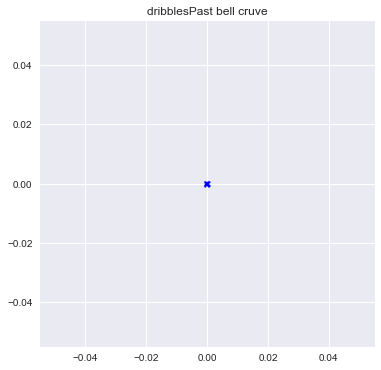

11.670588235294117
10.629468732553478


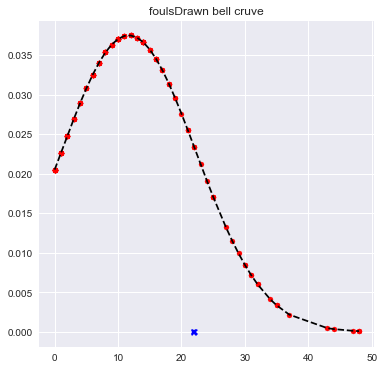

15.25294117647059
11.160361455619137


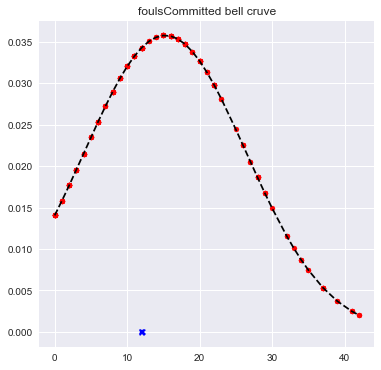

3.0
2.840878074696997


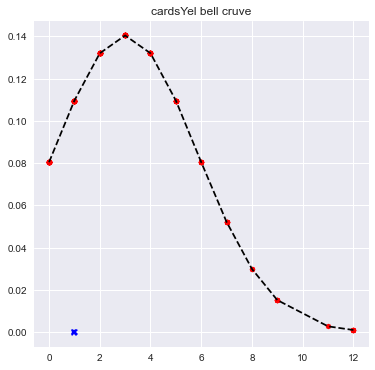

0.052941176470588235
0.2488033645006659


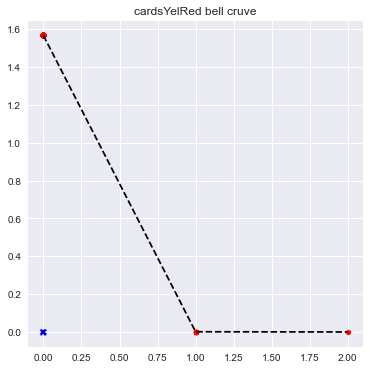

0.07058823529411765
0.2561357771420852


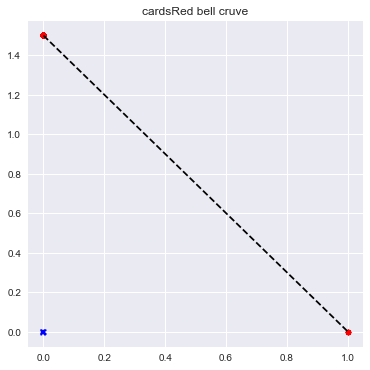

0.07647058823529412
0.3068423848410582


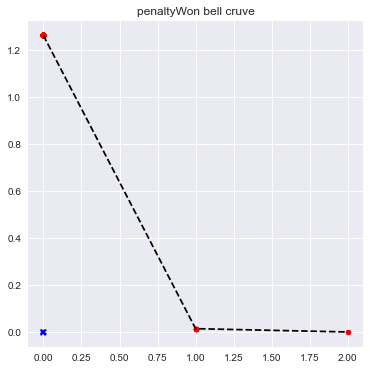

0.3941176470588235
0.6352124130466762


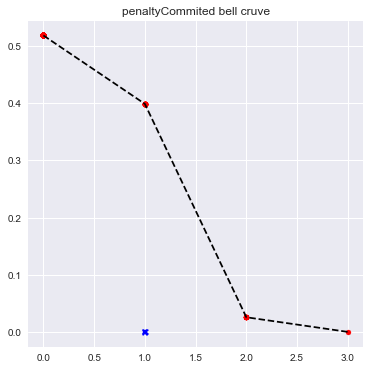

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


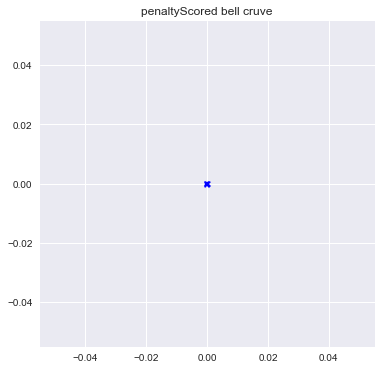

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


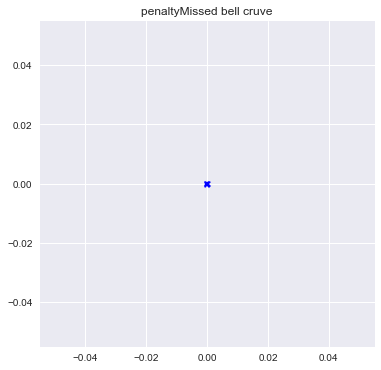

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


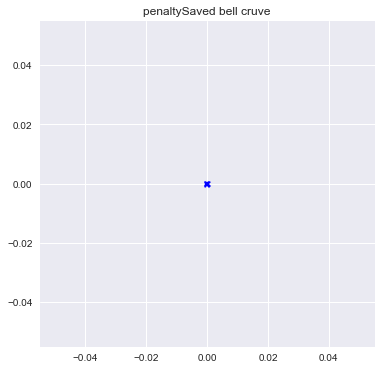

KevinDeBruyne
6.28421052631579
7.048946405624238


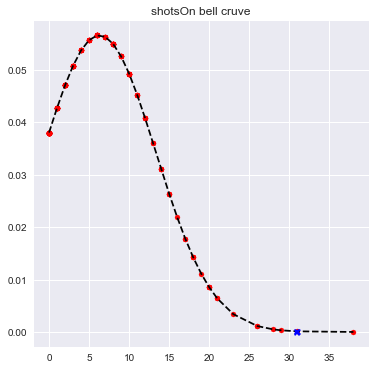

1.6526315789473685
2.2838952001610227


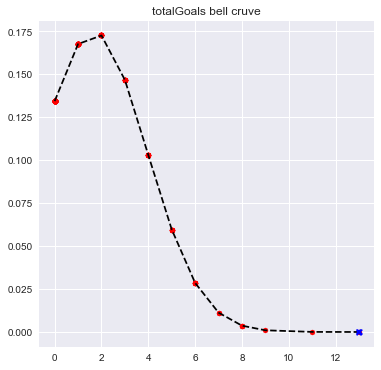

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


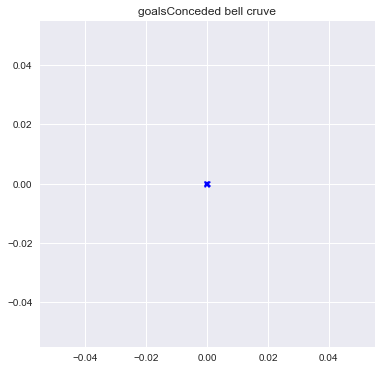

1.6421052631578947
2.345951897356198


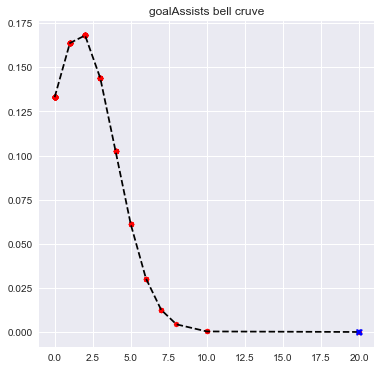

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


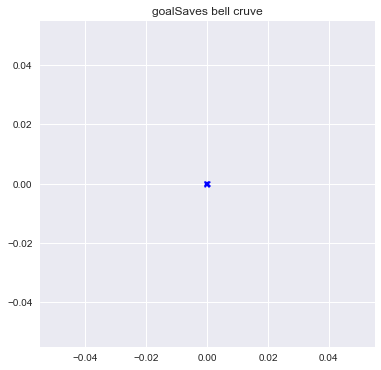

599.4052631578948
515.5365717525813


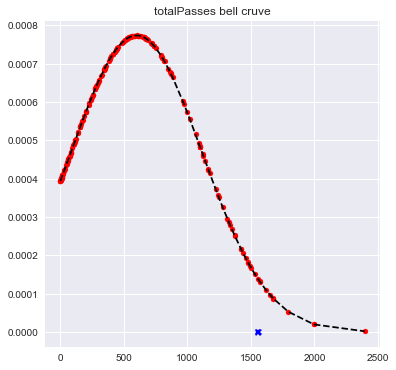

18.621052631578948
19.432029418283093


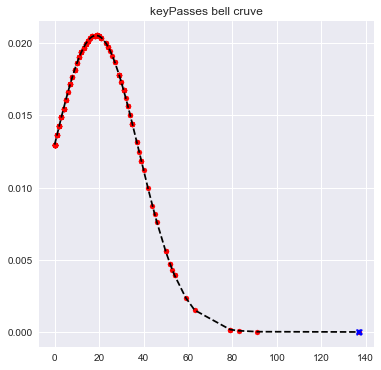

77.6421052631579
12.364989445564413


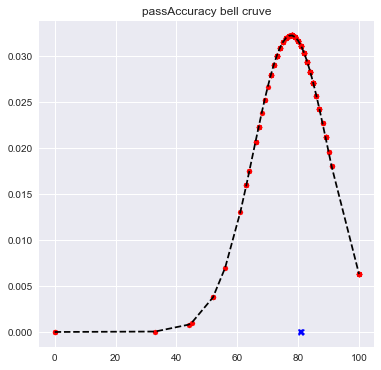

29.13684210526316
24.471298129297594


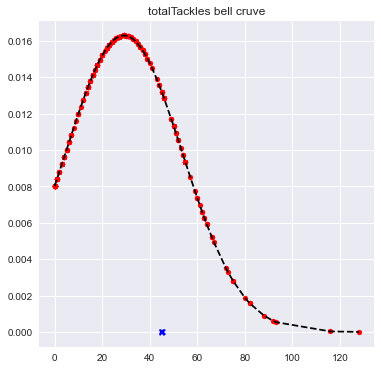

3.4526315789473685
4.12634264223271


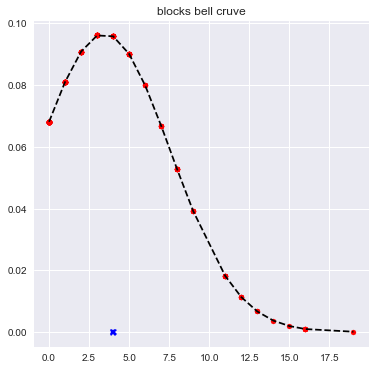

17.473684210526315
16.888078701144973


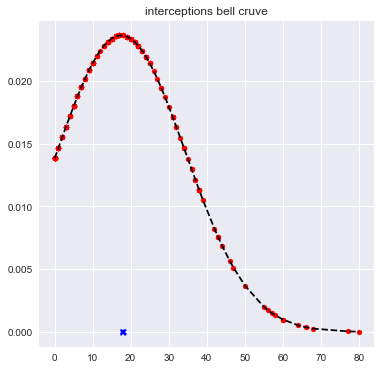

171.13684210526316
126.24184063482996


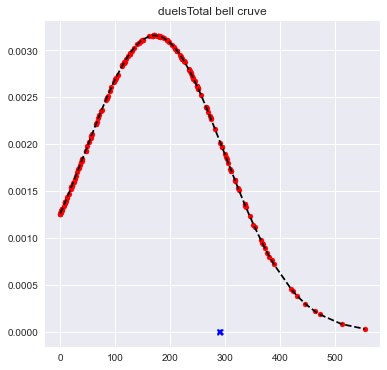

83.3
65.26222006966246


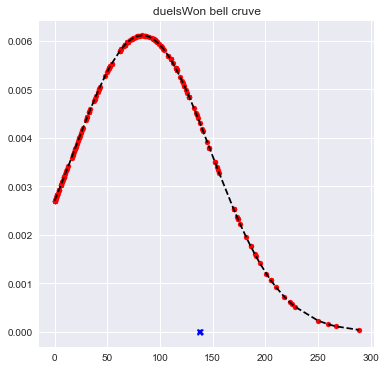

29.5
29.791865721332304


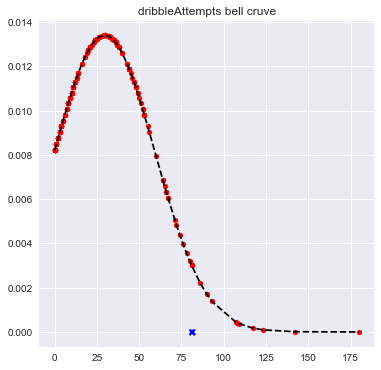

18.78421052631579
19.40240796661711


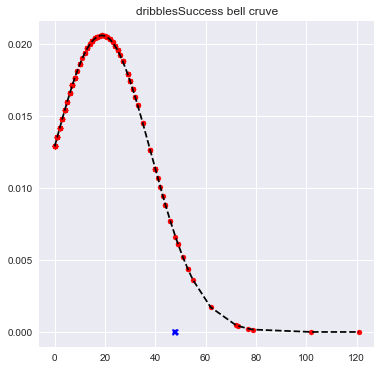

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


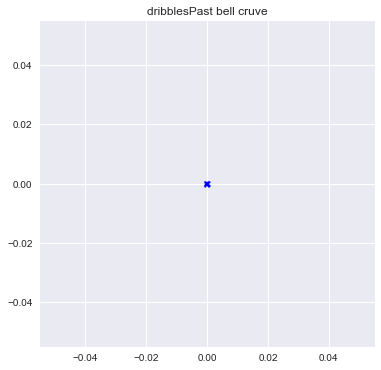

18.16315789473684
19.258346393633452


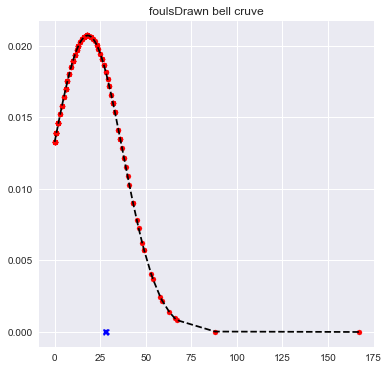

18.526315789473685
14.765423411871941


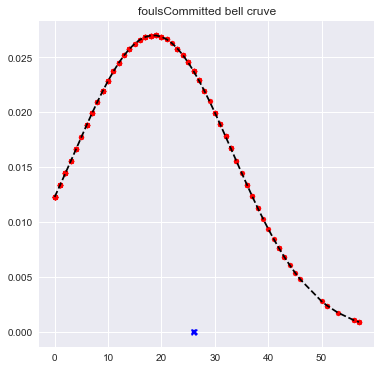

3.0
3.0262013708347473


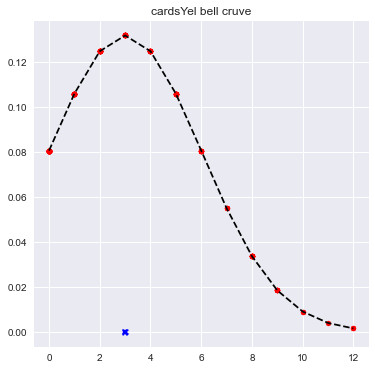

0.04736842105263158
0.21242564284853227


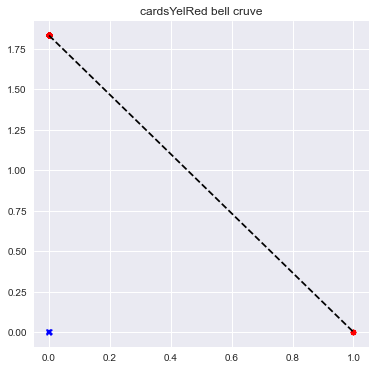

0.042105263157894736
0.22551879248030052


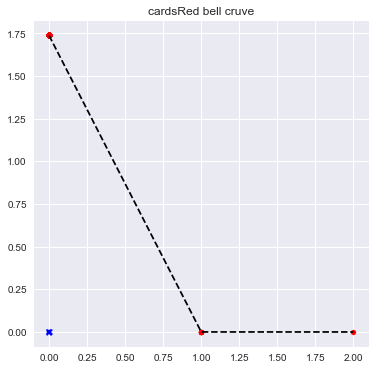

0.11052631578947368
0.36040143822673665


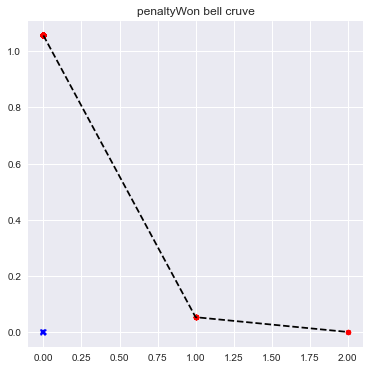

0.1631578947368421
0.4349355987606121


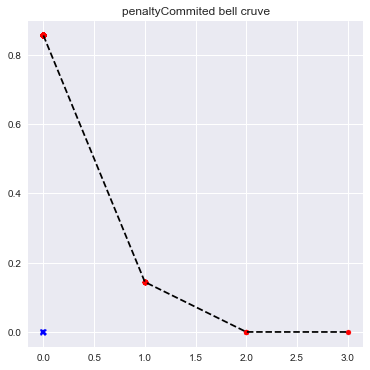

0.12631578947368421
0.5179332463217914


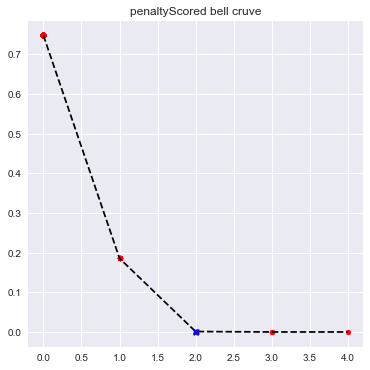

0.042105263157894736
0.22551879248030052


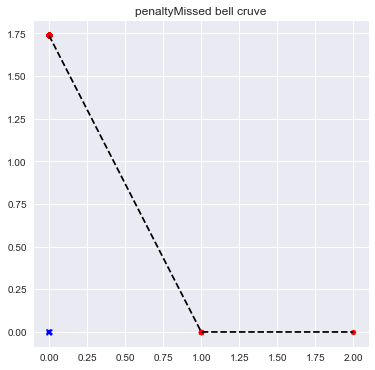

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


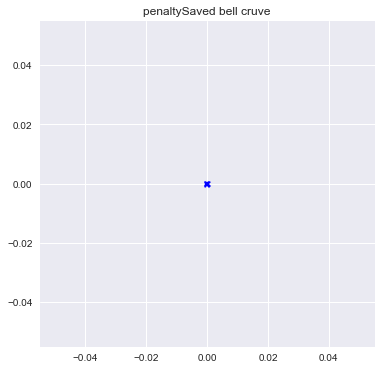

KevinDeBruyne
6.272222222222222
7.7522975487239


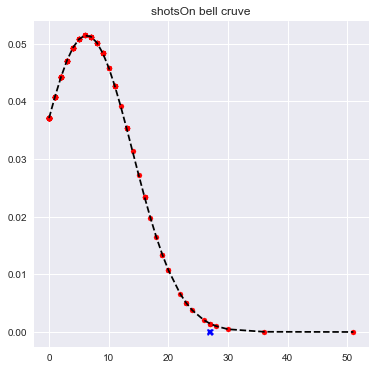

1.8222222222222222
3.0169070908898936


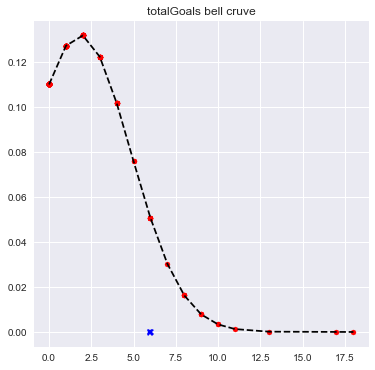

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


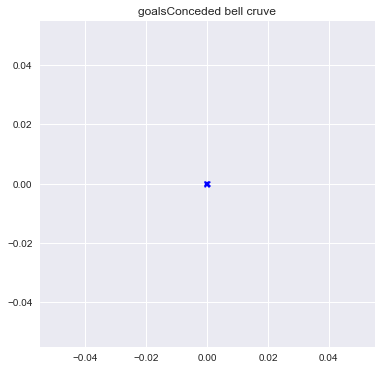

1.6277777777777778
2.253467835126699


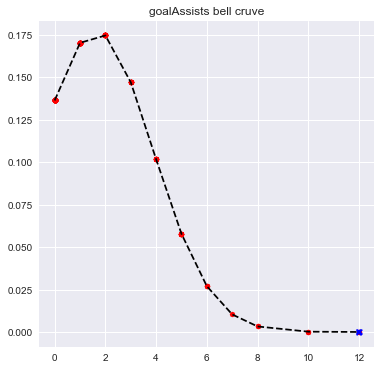

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


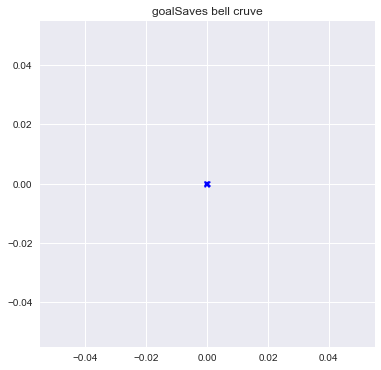

770.8944444444444
632.7087314539169


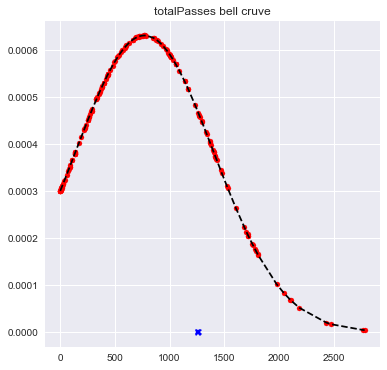

17.961111111111112
18.528765590858658


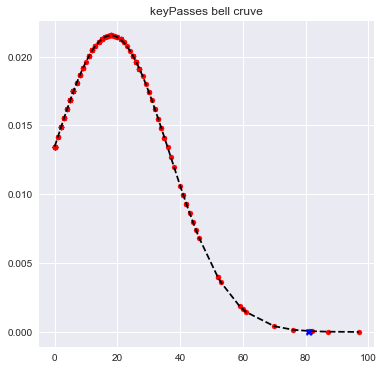

26.122222222222224
15.930632810042258


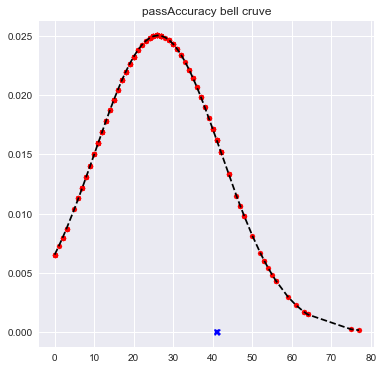

29.5
25.20526840871875


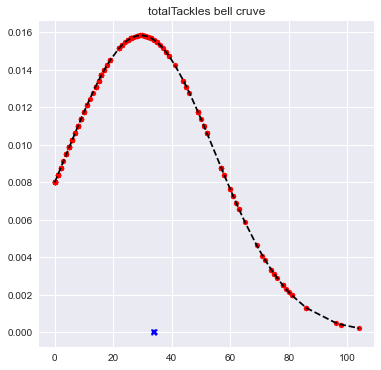

3.566666666666667
4.800578668822705


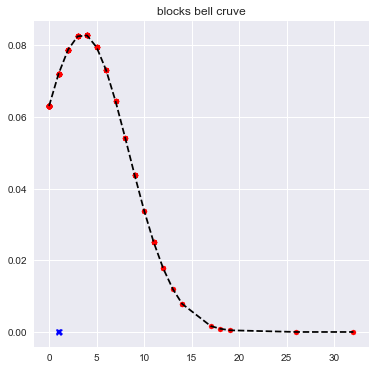

18.072222222222223
17.032006000323673


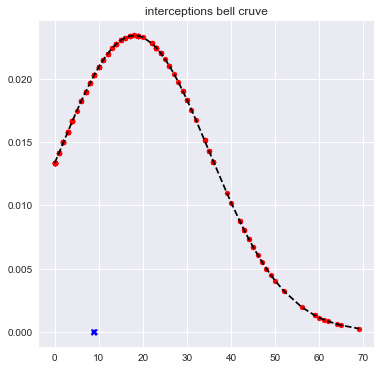

168.57222222222222
123.32103679942018


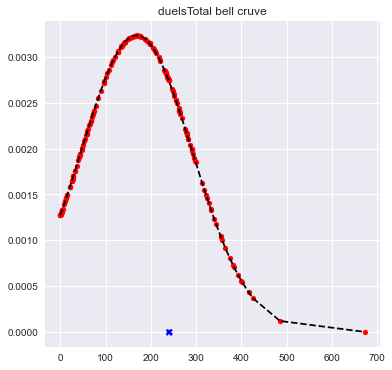

82.97777777777777
64.80680310272265


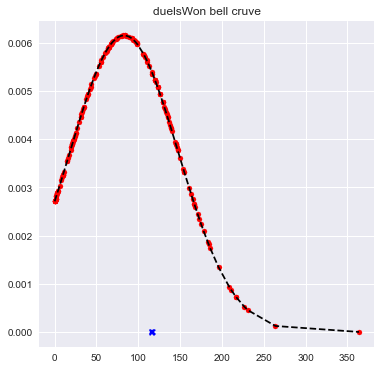

28.86111111111111
28.449324125713012


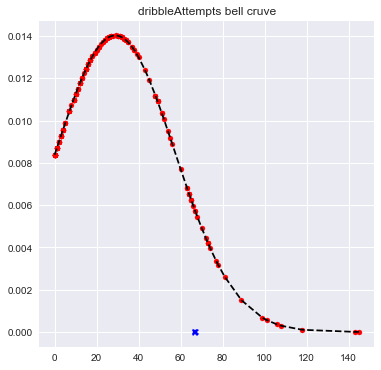

17.644444444444446
17.661830225477207


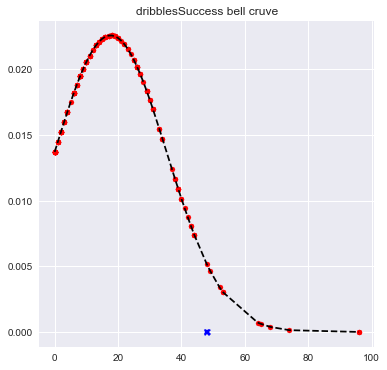

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


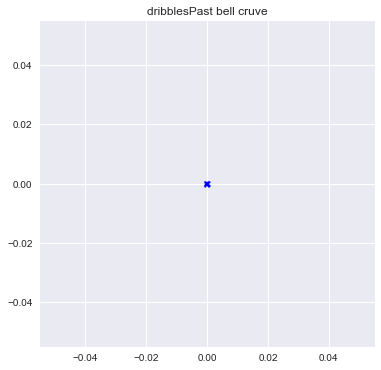

18.633333333333333
17.501396769654953


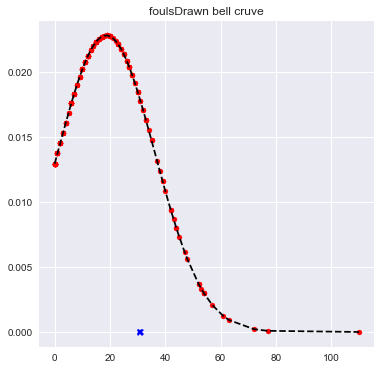

19.477777777777778
15.530777885489028


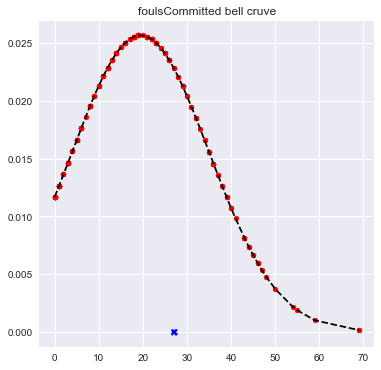

2.661111111111111
2.5994954401210006


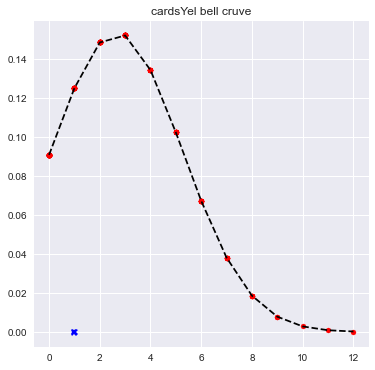

0.03333333333333333
0.17950549357115014


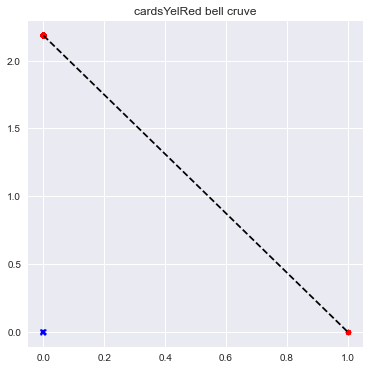

0.044444444444444446
0.20608041101101565


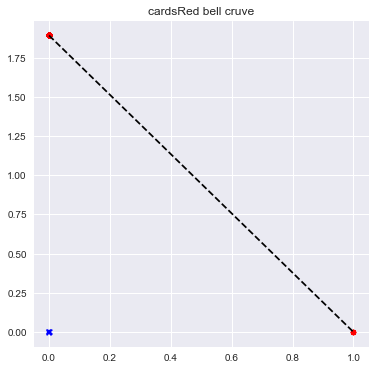

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


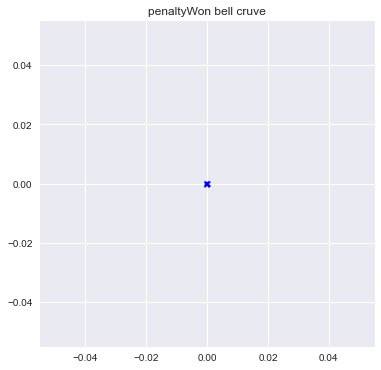

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


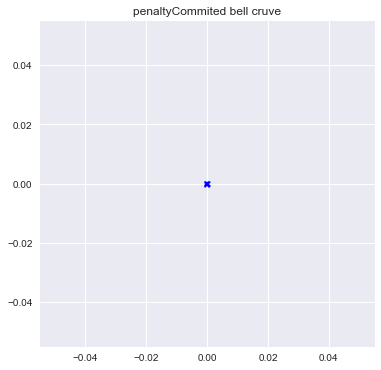

0.2777777777777778
1.0648711740318406


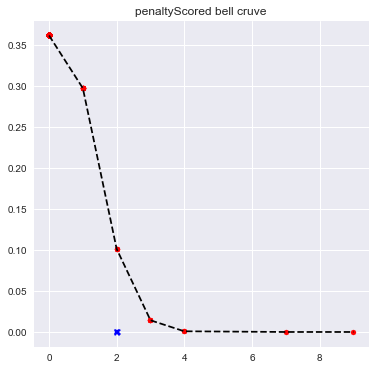

0.06111111111111111
0.26170146029586394


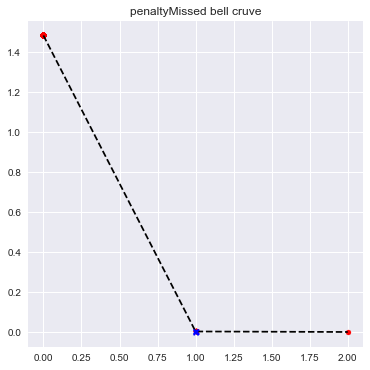

0.0
0.0


<ipython-input-33-5477eca87c50>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))


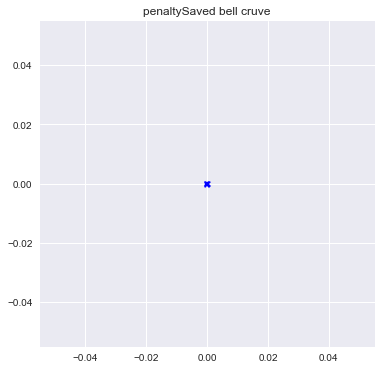

In [64]:
n = 0
for index, row in PFAdf.iterrows():
    print(row['fullname_new'])
    if row['position'] == 'Attacker': 
        for col in to_generate:
            #dfAttacker = dfAttacker[dfAttacker['season']==row['season']]
            #To place data of a given player
            mark = df.iloc[index][col]

            # To generate an array of x-values
            x = dfAttacker[dfAttacker['season']==row['season']][col].sort_values(ascending = True)
            print(dfAttacker[dfAttacker['season']==row['season']][col].sort_values(ascending = True))
            # To generate an array of
            # y-values using corresponding x-values
            y = pdf(dfAttacker[dfAttacker['season']==row['season']][col].sort_values(ascending = True))

            # Plotting the bell-shaped curve
            plt.style.use('seaborn')
            plt.figure(figsize = (6, 6))
            plt.plot(x, y, color = 'black',\
                    linestyle = 'dashed')
            plt.plot(mark,0, marker="X", label="points",color = 'blue')
            plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
            plt.title(str(col)+ ' bell cruve')
            plt.show()
            
    elif row['position'] == 'Midfielder': 
        for col in to_generate:
            #dfMidfielder = dfMidfielder[dfMidfielder['season']==row['season']]
            
            #To place data of a given player
            mark = df.iloc[index][col]

            # To generate an array of x-values
            x = dfMidfielder[dfMidfielder['season']==row['season']][col].sort_values(ascending = True)

            # To generate an array of
            # y-values using corresponding x-values
            y = pdf(dfMidfielder[dfMidfielder['season']==row['season']][col].sort_values(ascending = True))

            # Plotting the bell-shaped curve
            plt.style.use('seaborn')
            plt.figure(figsize = (6, 6))
            plt.plot(x, y, color = 'black',\
                    linestyle = 'dashed')
            plt.plot(mark,0, marker="X", label="points",color = 'blue')
            plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
            plt.title(str(col)+ ' bell cruve')
            plt.show()
    elif row['position'] == 'Defender': 
        for col in to_generate:
            #dfDefender = dfDefender[dfDefender['season']==row['season']]
            
            #To place data of a given player
            mark = df.iloc[index][col]

            # To generate an array of x-values
            x = dfDefender[dfDefender['season']==row['season']][col].sort_values(ascending = True)

            # To generate an array of
            # y-values using corresponding x-values
            y = pdf(dfDefender[dfDefender['season']==row['season']][col].sort_values(ascending = True))

            # Plotting the bell-shaped curve
            plt.style.use('seaborn')
            plt.figure(figsize = (6, 6))
            plt.plot(x, y, color = 'black',\
                    linestyle = 'dashed')
            plt.plot(mark,0, marker="X", label="points",color = 'blue')
            plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
            plt.title(str(col)+ ' bell cruve')
            plt.show()
            
#    for dfs in (dfAttacker,dfMidfield,dfDefender):
#        dfs = dfs[df['season']==row['season']]
#        if n == 0: 
#            print('ATTACKERS BELL CURVE')
#        elif n == 1: 
#            print('MIDFIELDERS BELL CURVE')
#        elif n == 2: 
#            print('DEFENDERS BELL CURVE')
#        for col in to_generate:

            #To place data of a given player
 #           mark = df.iloc[7909][col]

            # To generate an array of x-values
#            x = dfs[col].sort_values(ascending = True)

#            # To generate an array of
#            # y-values using corresponding x-values
#           y = pdf(dfs[col].sort_values(ascending = True))
#
 #           # Plotting the bell-shaped curve
 #           plt.style.use('seaborn')
 #           plt.figure(figsize = (6, 6))
 #          plt.plot(x, y, color = 'black',\
 #                   linestyle = 'dashed')
 #           plt.plot(mark,0, marker="X", label="points",color = 'blue')
 #           plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
 #           plt.title(str(col)+ ' bell cruve')
 #           plt.show()
 #       n += 1

In [39]:
#df[df['rating']>=7.2]#.max()
#df['rating'].max()

In [40]:
df

index     id       firstname           lastname   age  \
0         1  19153          Gareth              Barry  39.0   
1         2  19203          Ashley               Cole  41.0   
2         4  50978          Justin              Hoyte  36.0   
3         5  77110          Thomas  LøvendahlSørensen  45.0   
4         6  83026           Peter        Whittingham  34.0   
...     ...    ...             ...                ...   ...   
8286  10761  50828            Zack            Steffen  27.0   
8287  10764     17       Christian            Pulisic  24.0   
8288  10766   2294         Willian      BorgesdaSilva  34.0   
8289  10767  18897  DeAndreRoselle             Yedlin  29.0   
8290  10768  19549         Antonee           Robinson  25.0   

            nationality height weight  injured  teamID         teamname  \
0               England  183cm   78kg    False      66       AstonVilla   
1               England  176cm   66kg    False      42          Arsenal   
2     TrinidadandTobago  180cm   68kg    False      42          Arsenal   
3               Denmark  196cm   89kg    False     746       Sunderland   
4               England  178cm   63kg    False      66       AstonVilla   
...                 ...    ...    ...      ...     ...              ...   
8286                USA  191cm   86kg    False      50   ManchesterCity   
8287                USA  172cm   69kg    False      49          Chelsea   
8288             Brazil  175cm   77kg    False      42          Arsenal   
8289                USA  172cm   75kg    False      34  NewcastleUnited   
8290                USA  176cm   70kg    False      36           Fulham   

      appearences  lineups  minutes    position    rating  captain  subIn  \
0             1.0      1.0     90.0  Midfielder  0.000000    False    0.0   
1             2.0      2.0    180.0    Defender  0.000000    False    0.0   
2             1.0      0.0      1.0    Defender  0.000000    False    1.0   
3             1.0      1.0     90.0  Goalkeeper  0.000000    False    0.0   
4             2.0      1.0    123.0  Midfielder  0.000000    False    1.0   
...           ...      ...      ...         ...       ...      ...    ...   
8286          1.0      1.0     90.0  Goalkeeper  6.300000    False    0.0   
8287         27.0     18.0   1735.0  Midfielder  6.842307    False    9.0   
8288         25.0     16.0   1406.0    Attacker  7.004000    False    9.0   
8289          6.0      5.0    437.0    Defender  6.516666    False    1.0   
8290         28.0     24.0   2161.0    Defender  6.882142    False    4.0   

      subOut  bench  totalShots  shotsOn  totalGoals  goalsConceded  \
0        0.0    0.0         0.0      0.0         0.0            0.0   
1        0.0    0.0         0.0      0.0         0.0            0.0   
2        0.0    1.0         0.0      0.0         0.0            0.0   
3        0.0    1.0         0.0      0.0         0.0            0.0   
4        0.0    1.0         0.0      0.0         0.0            0.0   
...      ...    ...         ...      ...         ...            ...   
8286     0.0   34.0         0.0      0.0         0.0            1.0   
8287     6.0   11.0        32.0     16.0         4.0            0.0   
8288    10.0   17.0        13.0      3.0         1.0            0.0   
8289     2.0    4.0         1.0      0.0         0.0            0.0   
8290     2.0    7.0         6.0      4.0         0.0            0.0   

      goalAssists  goalSaves  totalPasses  keyPasses  passAccuracy  \
0             0.0        0.0          0.0        0.0           0.0   
1             0.0        0.0          0.0        0.0           0.0   
2             0.0        0.0          0.0        0.0           0.0   
3             0.0        0.0          0.0        0.0           0.0   
4             0.0        0.0          0.0        0.0           0.0   
...           ...        ...          ...        ...           ...   
8286          0.0        1.0         26.0        0.0          21.0   
8287      